# **Telecom Churn Case Study**


*  Authors: Harinika Pulloori, Megha Das 
*  Email-ID: harinikaffe@gmail.com, megha_das03@yahoo.in  

**Machine Learnng 2 >> Group Case Study 1 - Telecom Churn Case Study**

## **Problem Statement**
* In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another and thus this industry experiences an average of 15-25% annual churn rate. Since, it costs 5-10 times more to acquire a new customer than to retain an existing one,retaining high profitable customers is the number one business goal

* To reduce customer churn, telecom companies need to predict which customers are at high risk of churn

* We'll analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the *main indicators of churn*

### Understanding and Defining Churn
* This case study is focussed on retaining _*high value prepaid*_ customers since they're the most critical lot who, if they discontinue the services of the incumbent operator, it would be difficult to predict whether they've actually churned and switched to a different operator or have temporarily stopped using the services due to some other circumstances

* The project is based on the Indian and Southeast Asian market

* There can be two broad definitions of churn: <br>
> * Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time
> * Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time

### Business Rules
* We'll be using the *Usage Based* definition for this project
* Since, high value customers are the focus here, the business rule is: _Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)_
* Tag customers with 1/0, i.e whether they've churned or not based on the attributes of the 9th month. Drop the columns of the 9th month post this. <br>
The business rule for tagging whether a person has churned : Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase


### Business Objective
* Build a robust classification model to identify the high value customers who might churn in the near future given a certain set of attributes
* Identify the most important features that might indicate whether the customer will churn and why they do so

## Content:
1. [Loading the data](#Load)

> * [Importing the required libraries & data](#Import)
> * [Peeking the data](#Peek)
> * [Tagging the customers as churn/non-churn](#Tag)

2. [Data Pre-processing](#preprocess)

> * [Missing Value Treatment](#MVT)
> * [Filtering High Value Customers](#HVC)
> * [Deriving new features](#Derive)

3. [Univariate Analysis](#Univariate)
4. [Bivariate Analysis](#Bivariate)
> * [Outlier Treatment](#Outlier)
5. [Train Test Split](#TTSplit)
6. [Standardization of the data](#Scaling)
7. [Principal Component Analysis](#PCA)
8. [Training Classification models](#Model)
> * [Logistic Regression](#LR)
> * [Decision Tree](#DT)
> * [Random Forest](#RF)
> * [Ada Boost Algorithm](#AB)
9. [Performance of the models on test data](#Test)
> * [Logistic Regression](#LRtest)
> * [Decision Tree](#DTTest)
> * [Random Forest](#RFTest)
> * [Ada Boost Algorithm](#ABTest)
10. [Final Results](#FR)
11. [Important predictors to look out for!](#SIP)
> * [Feature Importance using Random Forest](#FIRF)
> * [Assessing top features using step-wise Logistic Regression](#FILR)
> * [Final Insights and recommendations](#final)

<a id='Load'></a>

## Loading the data

<a id='Import'></a>
### Importing the required libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

### Importing the dataset

In [123]:
churn = pd.read_csv("telecom_churn_data.csv")

<a id='Peek'></a>

### Taking a peek at the data
* Observe the shape
* Info on the data-types and number of missing values
* Filtering the data based on business rules

In [124]:
churn.shape

(99999, 226)

There are 99.9k rows and 226 columns. Let us take a look at the columns and the info the data provides

In [125]:
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

<a id='Tag'></a>

### Tagging customers as churn/non-churned

Let us now tag the customers as 1/0 based on the business rule and also remove the columns corressponding to the 4th month

In [126]:
# no calls in the 9th month and no data usage in the 9th month are churned customers
churn['Churn'] = np.where(((churn['total_ic_mou_9']+churn['total_og_mou_9']+churn['vol_2g_mb_9']+churn['vol_3g_mb_9'])==0),1,0)


Let us now drop all the columns associated with the 4th month, i.e. suffix as _9




In [127]:
columns = churn.columns
columns = [i for i in columns if (i[-2:]=='_9')]
# dropping the above columns
columns.append("sep_vbc_3g") # September is 4th month
churn.drop(columns,axis=1,inplace=True)

In [128]:
churn.shape

(99999, 172)

<a id='preprocess'></a>

## Data pre-processing

<a id='MVT'></a>

### Missing Value Treatment
* Observe the number of missing values in each column

In [129]:
churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2f_mou

Based on the above resuts, there are a few columns that we can drop as they don't contribute to the analysis. This variables are:
* last_date_of_month
* circle_id

In [130]:
churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','circle_id'],axis=1,inplace=True)

Let us check for the columns that have only one unique value, ie. no variance and drop those columns

In [131]:
for i in churn.columns:
    if churn[i].nunique()==1:
        print(i)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


The above columns can be dropped since they have just one value and hence no variance and will not contribute to the analysis

In [132]:
churn.drop([i for i in churn.columns if churn[i].nunique()==1],axis=1,inplace=True)

In [133]:
churn.shape

(99999, 159)

* Considering only those columns having null values and finding the percentage of null values in the data

In [134]:
round((churn.isnull().sum()[churn.isnull().sum()>0]/len(churn.index))*100,2).sort_values()

date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
std_ic_t2f_mou_7             3.86
loc_og_t2c_mou_7             3.86
isd_ic_mou_7                 3.86
loc_ic_t2t_mou_7             3.86
loc_og_mou_7                 3.86
og_others_7                  3.86
std_og_t2m_mou_7             3.86
std_og_mou_7                 3.86
std_ic_t2t_mou_7             3.86
spl_ic_mou_7                 3.86
spl_og_mou_7                 3.86
std_og_t2f_mou_7             3.86
std_ic_mou_7                 3.86
std_og_t2t_mou_7             3.86
loc_ic_t2m_mou_7             3.86
loc_og_t2f_mou_7             3.86
loc_og_t2m_mou_7             3.86
onnet_mou_7                  3.86
offnet_mou_7                 3.86
std_ic_t2m_mou_7             3.86
roam_ic_mou_7                3.86
roam_og_mou_7                3.86
loc_ic_mou_7                 3.86
loc_ic_t2f_mou_7             3.86
loc_og_t2t_mou_7             3.86
ic_others_7                  3.86
isd_og_mou_7  

We can observe that all of the columns containing more than 70% missing values are data usage columns and missing values are for users who haven't subscribed to a data plan. <br>
Thus, we can impute the missing values in all of these columns with 0, to signify no data usage & also create a new column signifying whether a user is a data user or not based on last date of data recharge in that particular month


In [135]:
# creating a new feature for data user or not for that month
churn['rech_data_6'] = np.where(churn['date_of_last_rech_data_6'].isnull(),0,1)
churn['rech_data_7'] = np.where(churn['date_of_last_rech_data_7'].isnull(),0,1)
churn['rech_data_8'] = np.where(churn['date_of_last_rech_data_8'].isnull(),0,1)

In [136]:
# creating a new feature for a user who has recharged or not
churn['rech_6'] = np.where(churn['date_of_last_rech_6'].isnull(),0,1)
churn['rech_7'] = np.where(churn['date_of_last_rech_7'].isnull(),0,1)
churn['rech_8'] = np.where(churn['date_of_last_rech_8'].isnull(),0,1)

We can now drop the above columns

In [137]:
churn.drop(['date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

We can now impute NAs with 0 for the columns which provide info regarding a data user

In [138]:
null_values=round((churn.isnull().sum()[churn.isnull().sum()>0]/len(churn.index))*100,2).sort_values()
null_values

std_og_mou_7           3.86
std_og_t2t_mou_7       3.86
spl_ic_mou_7           3.86
loc_og_t2c_mou_7       3.86
std_ic_t2f_mou_7       3.86
og_others_7            3.86
loc_og_t2f_mou_7       3.86
std_ic_t2t_mou_7       3.86
loc_ic_t2t_mou_7       3.86
loc_og_t2m_mou_7       3.86
std_ic_t2m_mou_7       3.86
isd_ic_mou_7           3.86
loc_og_mou_7           3.86
loc_og_t2t_mou_7       3.86
loc_ic_t2m_mou_7       3.86
roam_og_mou_7          3.86
std_ic_mou_7           3.86
isd_og_mou_7           3.86
roam_ic_mou_7          3.86
loc_ic_t2f_mou_7       3.86
ic_others_7            3.86
offnet_mou_7           3.86
std_og_t2f_mou_7       3.86
loc_ic_mou_7           3.86
onnet_mou_7            3.86
std_og_t2m_mou_7       3.86
spl_og_mou_7           3.86
onnet_mou_6            3.94
std_ic_t2f_mou_6       3.94
og_others_6            3.94
isd_og_mou_6           3.94
loc_ic_t2m_mou_6       3.94
std_ic_t2m_mou_6       3.94
loc_ic_t2f_mou_6       3.94
loc_ic_mou_6           3.94
spl_og_mou_6        

In [139]:
for i in (null_values[null_values>60].index):
    churn[i]=churn[i].fillna(0)

In [140]:
# assigning the remaining columns that contain null values
null_values =round((churn.isnull().sum()[churn.isnull().sum()>0]/len(churn.index))*100,2).sort_values()
null_values

isd_og_mou_7        3.86
std_og_mou_7        3.86
spl_og_mou_7        3.86
std_og_t2f_mou_7    3.86
og_others_7         3.86
std_og_t2m_mou_7    3.86
loc_ic_t2t_mou_7    3.86
std_og_t2t_mou_7    3.86
loc_ic_t2m_mou_7    3.86
loc_og_mou_7        3.86
loc_ic_t2f_mou_7    3.86
loc_og_t2c_mou_7    3.86
loc_ic_mou_7        3.86
std_ic_t2t_mou_7    3.86
loc_og_t2m_mou_7    3.86
loc_og_t2f_mou_7    3.86
ic_others_7         3.86
onnet_mou_7         3.86
loc_og_t2t_mou_7    3.86
std_ic_t2f_mou_7    3.86
isd_ic_mou_7        3.86
offnet_mou_7        3.86
roam_og_mou_7       3.86
std_ic_mou_7        3.86
std_ic_t2m_mou_7    3.86
roam_ic_mou_7       3.86
spl_ic_mou_7        3.86
ic_others_6         3.94
og_others_6         3.94
loc_ic_t2t_mou_6    3.94
isd_ic_mou_6        3.94
std_ic_t2f_mou_6    3.94
loc_ic_t2f_mou_6    3.94
loc_ic_mou_6        3.94
std_ic_mou_6        3.94
std_ic_t2t_mou_6    3.94
spl_og_mou_6        3.94
std_ic_t2m_mou_6    3.94
loc_ic_t2m_mou_6    3.94
spl_ic_mou_6        3.94


Since, the above null values belong to columns that are all about minutes of usage, we can impute the NAs with zero. We are not deleting the rows since they might be high value customers whose churn status is vital to building the model

In [141]:
for i in list(null_values.index):
    churn[i]=churn[i].fillna(0)

In [142]:
# check for null value
round((churn.isnull().sum()[churn.isnull().sum()>0]/len(churn.index))*100,2).sort_values()

Series([], dtype: float64)

Thus, we've successfully treated all the null values. Let us now apply the business rules to filter the data for only high value customers.We'll derive a feature for total recharge amount in a month inclusive of data recharge amount and then define a column for the average recharge amount during the good phase

<a id='HVC'></a>

### Filtering High-Value customers

In [143]:
# total data recharge is the product of avg data recharge and total recharges done for data
churn['total_rech_amt_6'] = (churn['av_rech_amt_data_6']*churn['total_rech_data_6'])+churn['total_rech_amt_6']
churn['total_rech_amt_7'] = (churn['av_rech_amt_data_7']*churn['total_rech_data_7'])+churn['total_rech_amt_7']
churn['total_rech_amt_8'] = (churn['av_rech_amt_data_8']*churn['total_rech_data_8'])+churn['total_rech_amt_8']

In [144]:
# defining a column for the average recharge amount during the good phase
churn['Av_rech_amt_good_phase'] = (churn['total_rech_amt_6']+churn['total_rech_amt_7'])/2

churn = churn[churn['Av_rech_amt_good_phase']>=np.quantile(churn['Av_rech_amt_good_phase'],0.7)]

In [145]:
# drop the column created above
churn.drop('Av_rech_amt_good_phase',axis=1,inplace=True)

In [146]:
churn.shape

(30001, 159)

In [147]:
churn.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

There are about 30k high-value customers.

<a id='Derive'></a>

### Deriving new features
We have seen that there are about 160 columns all of which are important to our analysis. But retaining too many features would severely affect the performance of our model. Hence, let us derive new features based on the following: <br>

* Aggregate all of the types of calls into separate buckets and sum them. For e.g. create new feature for minutes of usage for local calls by adding the MOUs of all the type of local call variables
* Similarly, perform the same derivation for Local, STD, ISD, Roaming, Special etc. calls

Let us first create a function that takes in the type of call and month as input and aggregates it at that level

In [148]:
churn_2 = churn.copy()

In [149]:
def new_features(types,month):
    cols=[]
    for i in churn.columns:
        if (i.rfind(types)!=-1) & (i.rfind(month)!=-1):
            cols.append(i)
    churn[types+"_mou_"+month] = churn[cols].sum(axis=1)
    churn.drop(cols,axis=1,inplace=True)

In [150]:
# since the below columns might lead to double count let us drop those before implementing the function
churn.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
            'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8'],inplace=True,axis=1)

In [151]:
new_features("loc","6")
new_features("std","6")
new_features("isd","6")
new_features("loc","7")
new_features("std","7")
new_features("isd","7")
new_features("loc","8")
new_features("std","8")
new_features("isd","8")
new_features("roam","6")
new_features("roam","7")
new_features("roam","8")
new_features("spl","6")
new_features("spl","7")
new_features("spl","8")

Let us now concat the above columns that were removed with the original dataset

In [152]:
churn = pd.concat([churn,churn_2[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
            'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']]],axis=1)

In [153]:
churn.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  og_others_6  \
0          0.00          0.00          0.00          0.00          0.0   
7         52.29        453.43        567.16        325.91          0.0   
8         35.08         94.66         80.63        136.48          0.0   
21        85.14        757.93        896.68        983.39          0.0   
23        33.58         85.41         89.36        205.89          0.0   

    og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0           0.0          0.0            0.00            0.00            0.00   
7           0.0          0.0          487.53          609.24          350.16   
8           0.0          0.0          508.36          431.66          171.56   
21          0.0          0.0          860.34         1028.79         1068.54   
23          0.0          0.0          134.38          140.04          239.48   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  ic_others_6  ic_others_7  \
0             0.00            0.00            5.44         0.00         0.00   
7           626.46          558.04          428.74        15.74        15.19   
8           103.86           28.49           16.54         0.00         0.00   
21          207.09          131.89          261.04         0.00         0.00   
23          119.58          222.89          298.33         0.00         5.35   

    ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0          0.00                 4                 3                 2   
7         15.14                 5                 5                 7   
8          0.00                19                21                14   
21         0.00                22                26                27   
23        13.06                 3                 5                 4   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0              614.0             504.0             504.0             252   
7             1580.0             790.0            3638.0            1580   
8              437.0             955.0             327.0              90   
21             600.0             680.0             718.0              50   
23               0.0            1166.0             979.0               0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0              252             252                 252                 252   
7              790            1580                   0                   0   
8              154              30                  50                   0   
21              50              50                  30                  20   
23             179             179                   0                 179   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                  252                1.0                1.0   
7                  779                0.0                0.0   
8                   10                0.0                2.0   
21                  50                0.0                0.0   
23                   0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23  

We can derive an additional feature for average recharge amount by dividing the total recharge amount in a month by the total number of recharges in a month

In [154]:
churn['Av_rech_amt_6'] = churn['total_rech_amt_6']/churn['total_rech_num_6']
churn['Av_rech_amt_7'] = churn['total_rech_amt_7']/churn['total_rech_num_7']
churn['Av_rech_amt_8'] = churn['total_rech_amt_8']/churn['total_rech_num_8']

In [155]:
churn.fillna(0,inplace=True)

In [156]:
churn.replace([np.inf, -np.inf], 0, inplace=True)

In [157]:
# drop the above 3 columns for total number of times the number was recharged
churn.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8'],inplace=True,axis=1)

Let us check if the sum of count of recharges done for 2g and 3g is same as total recharges done for data in that month

In [158]:
churn[churn['count_rech_2g_7']+churn['count_rech_3g_7']==churn['total_rech_data_7']]

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0         7000842753   197.385   214.816   213.803         0.00         0.00   
7         7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
21        7002124215   514.453   597.753   637.760       102.41       132.11   
23        7000887461    74.350   193.897   366.966        48.96        50.66   
...              ...       ...       ...       ...          ...          ...   
99981     7000630859   384.316   255.405   393.474        78.68        29.04   
99984     7000661676   328.594   202.966   118.707       423.99       181.83   
99986     7001729035   644.973   455.228   564.334       806.73       549.36   
99988     7002111859   312.558   512.932   402.080       199.89       174.46   
99997     7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  og_others_6  \
0             0.00          0.00          0.00          0.00         0.00   
7            52.29        453.43        567.16        325.91         0.00   
8            35.08         94.66         80.63        136.48         0.00   
21           85.14        757.93        896.68        983.39         0.00   
23           33.58         85.41         89.36        205.89         0.00   
...            ...           ...           ...           ...          ...   
99981       103.24         56.13         28.09         61.44         0.00   
99984         5.71         39.51         39.81         18.26         1.06   
99986       775.41        784.76        617.13        595.44         0.00   
99988         2.46        175.88        277.01        248.33         0.00   
99997         0.00          0.00          0.00          0.00         0.00   

       og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0              0.0          0.0            0.00            0.00   
7              0.0          0.0          487.53          609.24   
8              0.0          0.0          508.36          431.66   
21             0.0          0.0          860.34         1028.79   
23             0.0          0.0          134.38          140.04   
...            ...          ...             ...             ...   
99981          0.0          0.0          134.81           57.14   
99984          0.0          0.0          464.58          221.64   
99986          0.0          0.0         1600.79         1183.21   
99988          0.0          0.0          375.78          451.48   
99997          0.0          0.0            0.00            0.00   

       total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0                0.00            0.00            0.00            5.44   
7              350.16          626.46          558.04          428.74   
8              171.56          103.86           28.49           16.54   
21            1068.54          207.09          131.89          261.04   
23             239.48          119.58          222.89          298.33   
...               ...             ...             ...             ...   
99981          164.69          478.48          344.78          420.46   
99984           23.98           89.48          123.71          102.81   
99986         1380.01          580.73          622.28          660.01   
99988          250.79          998.96          374.98         1233.83   
99997            0.00            0.81           11.09            2.29   

       ic_others_6  ic_others_7  ic_others_8  total_rech_amt_6  \
0             0.00         0.00         0.00             614.0   
7            15.74        15.19        15.14            1580.0   
8             0.00         0.00         0.00             437.0   
21            0.00         0.00         0.00             600.0   
23            0.00         5.35        13.06               0.0   
...            ...          ...          ..

Thus the two columns for count of recharges sum up to the total recharges done and hence can be dropped and total recharges for data can be used instead

In [159]:
churn.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'],inplace=True,axis=1)

Since we've derived a feature for total recharge amount for each month we can drop the redundant columns not required for the analysis

In [160]:
# dropping the redundant columns
churn.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

We can also create new features for total number of sachet and monthly packs in a month, by adding the 2g sachet and monthly packs. Similarly for 3g packs 

In [161]:
churn['Total_monthly_6'] = churn['monthly_2g_6']+churn['monthly_3g_6']
churn['Total_monthly_7'] = churn['monthly_2g_7']+churn['monthly_3g_7']
churn['Total_monthly_8'] = churn['monthly_2g_8']+churn['monthly_3g_8']
churn['Total_sachet_6'] = churn['sachet_2g_6']+churn['sachet_3g_6']
churn['Total_sachet_7'] = churn['sachet_2g_7']+churn['sachet_3g_7']
churn['Total_sachet_8'] = churn['sachet_2g_8']+churn['sachet_3g_8']

# drop the above columns

churn.drop(['monthly_2g_6','monthly_3g_6','monthly_2g_7','monthly_3g_7','monthly_2g_8','monthly_3g_8',
            'sachet_2g_6','sachet_3g_6','sachet_2g_7','sachet_3g_7','sachet_2g_8','sachet_3g_8'],inplace=True,axis=1)


Checking volume of data is same for 2g and 3g for non zero records. If not we can add both the columns to obtain a new feature for total data volume usage

In [162]:
churn[(churn['vol_2g_mb_6']==churn['vol_3g_mb_6']) & (churn['vol_2g_mb_6']!=0)]

Empty DataFrame
Columns: [mobile_number, arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, last_day_rch_amt_6, last_day_rch_amt_7, last_day_rch_amt_8, max_rech_data_6, max_rech_data_7, max_rech_data_8, vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8, vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, arpu_3g_6, arpu_3g_7, arpu_3g_8, arpu_2g_6, arpu_2g_7, arpu_2g_8, night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7, fb_user_8, aon, aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, Churn, rech_data_6, rech_data_7, rech_data_8, rech_6, rech_7, rech_8, loc_mou_6, std_mou_6, isd_mou_6, loc_mou_7, std_mou_7, isd_mou_7, loc_mou_8, std_mou_8, isd_mou_8, roam_mou_6, roam_mou_7, roam_mou_8, spl_mou_6, spl_mou_7, spl_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, Av_rech_amt_6, Av_rech_amt_7, Av_rech_amt_8, Total_monthly_6, Total_monthly_7, Total_monthly_8, Total_sachet_6, Total_sachet_7, Total_sachet_8]
Index: []

In [163]:
churn['vol_mb_6'] = churn['vol_2g_mb_6']+churn['vol_3g_mb_6']
churn['vol_mb_7'] = churn['vol_2g_mb_7']+churn['vol_3g_mb_7']
churn['vol_mb_7'] = churn['vol_2g_mb_8']+churn['vol_3g_mb_8']

churn.drop(['vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8'],axis=1,inplace=True)

In [164]:
churn.shape

(30001, 95)

<a id='Univariate'></a>

## Univariate Analysis

Let us now perform the univariate analysis of each of the variables present in the data and check the distribution. <br>

Analyse the distribution of churned vs. non-churned customers. Before any univariate analysis let us remove the mobile number column

In [165]:
churn.drop("mobile_number",axis=1,inplace=True)

In [166]:
# retaining only the discrete/categorical variables
cols = ['Total_monthly_6','Total_monthly_7', 'Total_monthly_8', 'Total_sachet_6','Total_sachet_7', 
        'Total_sachet_8','Churn', 'rech_data_6', 'rech_data_7', 'rech_data_8','fb_user_6','fb_user_7', 'fb_user_8','rech_6',	'rech_7',	'rech_8',
        'night_pck_user_6','night_pck_user_7','night_pck_user_8']

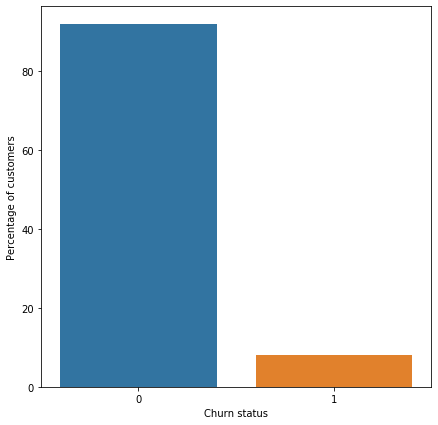

In [167]:
fig = plt.figure(figsize=(7,7))
ax = sns.barplot("Churn", "Churn", data=churn, estimator=lambda x: len(x) / len(churn) * 100)
ax.set(ylabel="Percentage of customers")
ax.set(xlabel="Churn status")
plt.show()

The classes are heavily imbalanced with almost 90% of the records belonging to Non-churn status. We will need to perform oversampling/undersampling to avoid any bias. Let us now check the distribution of variables and see how their distribution looks like

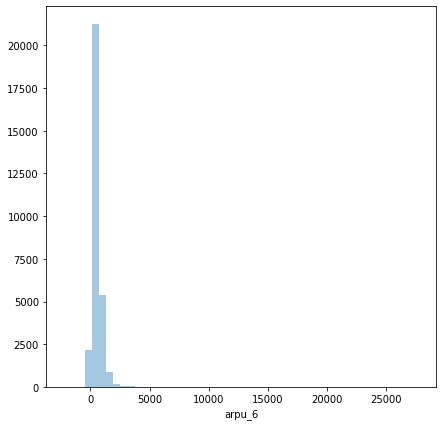

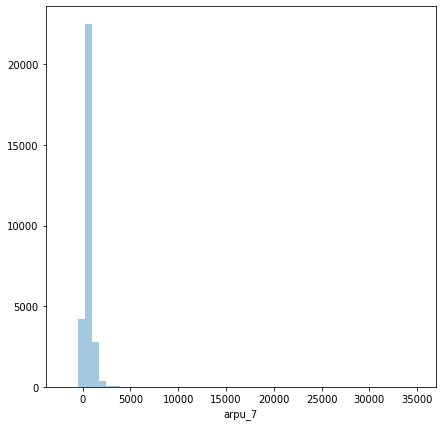

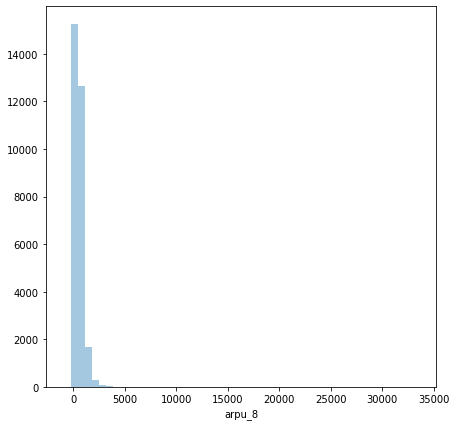

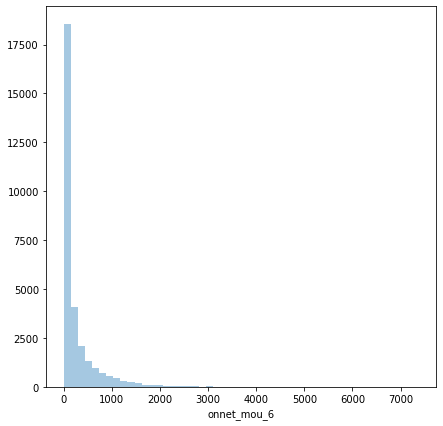

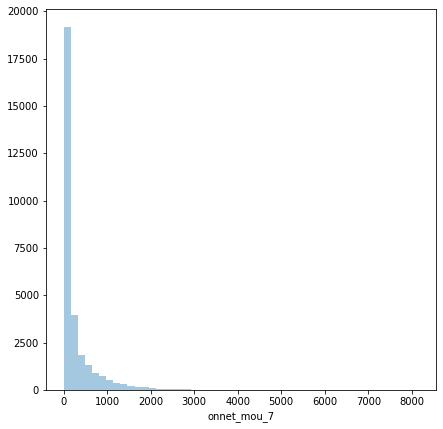

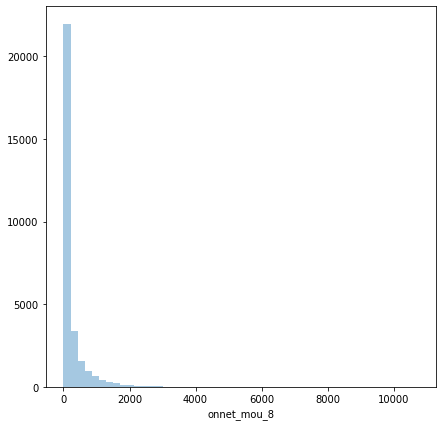

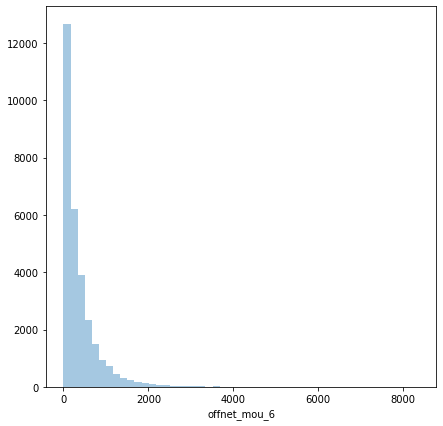

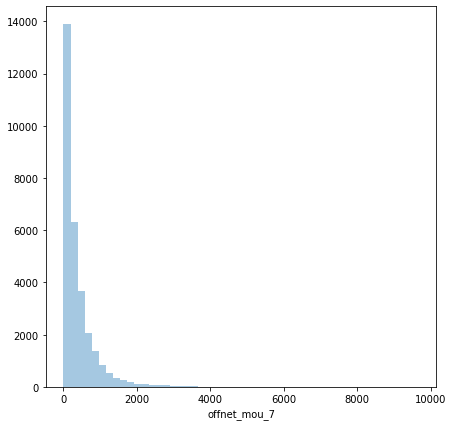

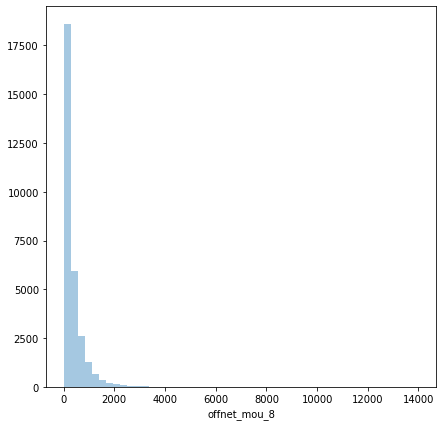

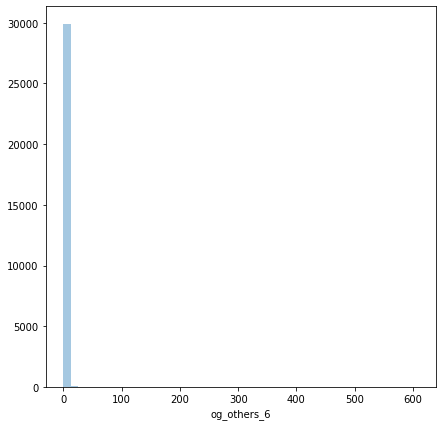

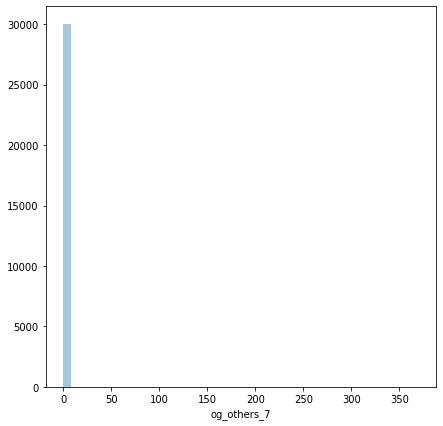

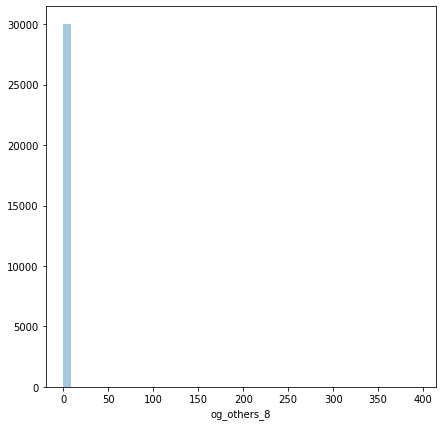

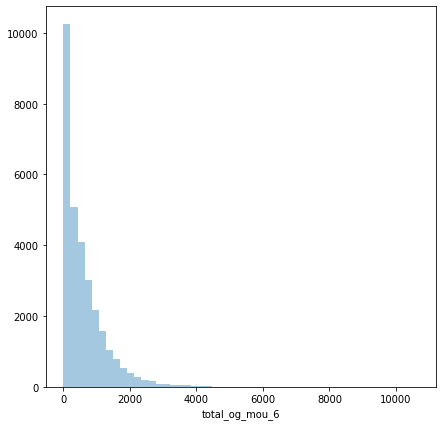

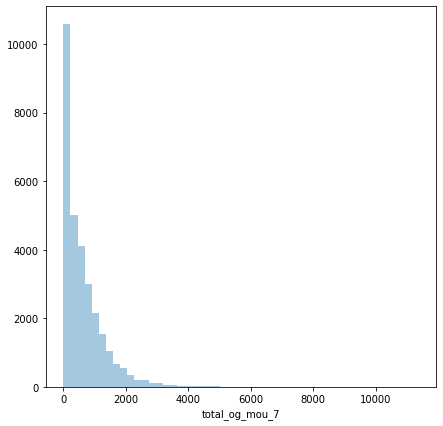

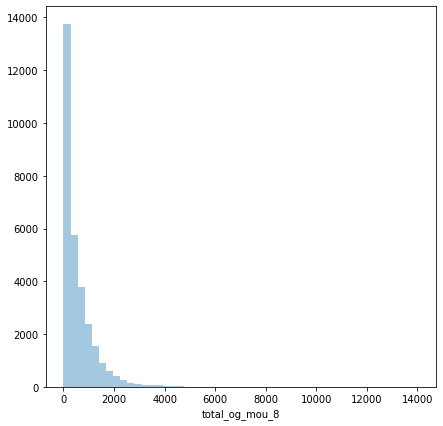

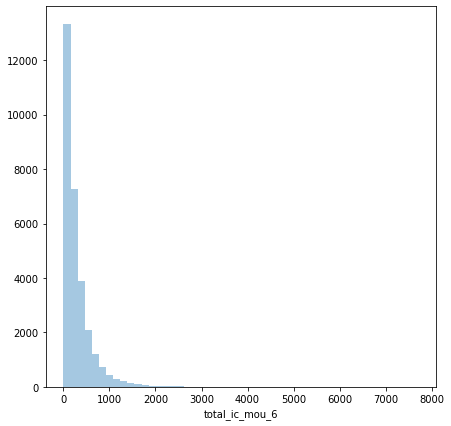

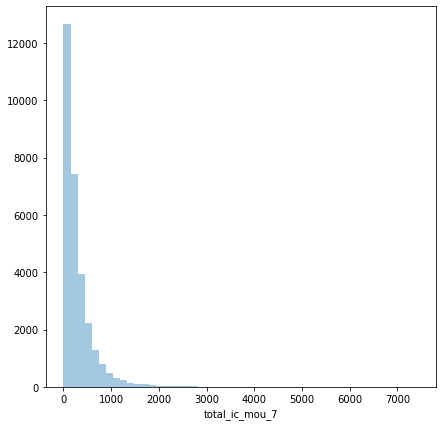

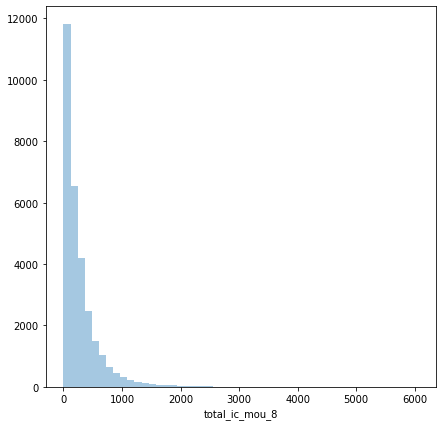

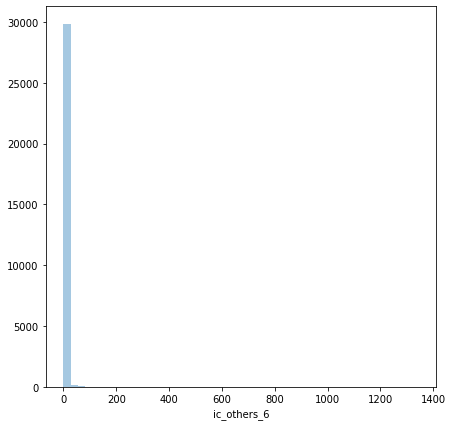

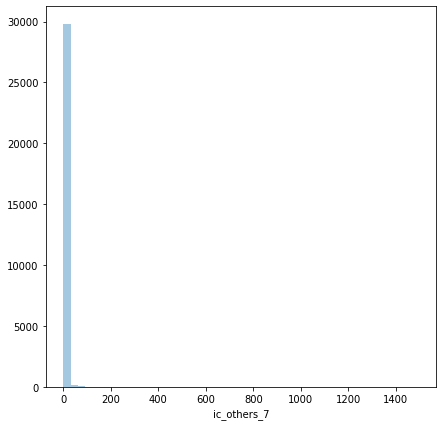

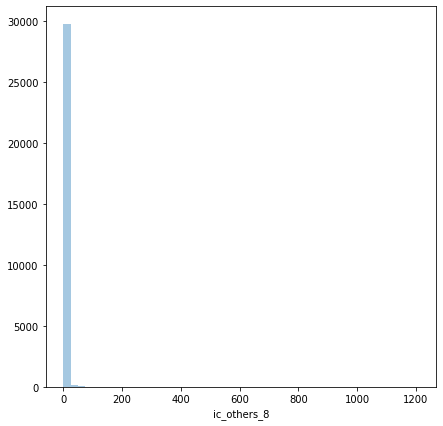

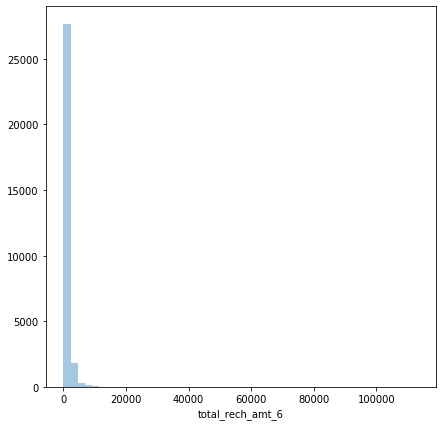

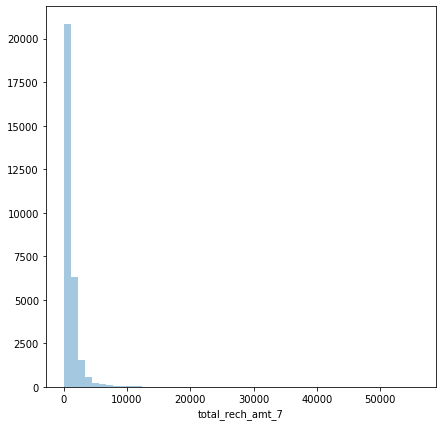

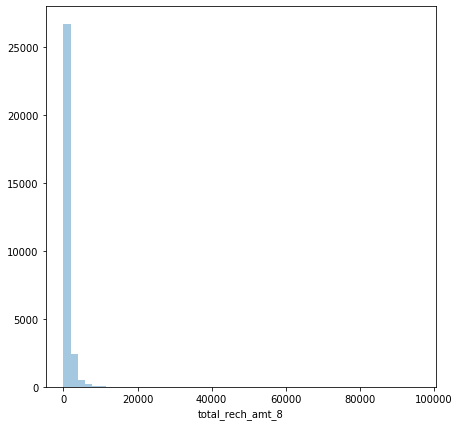

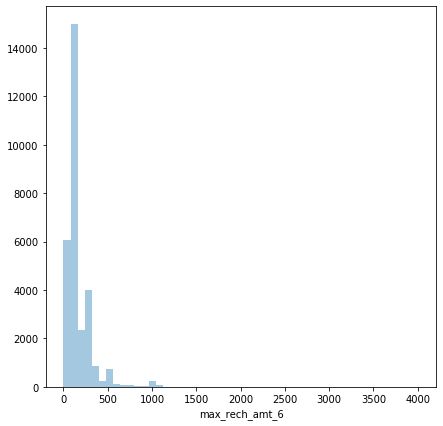

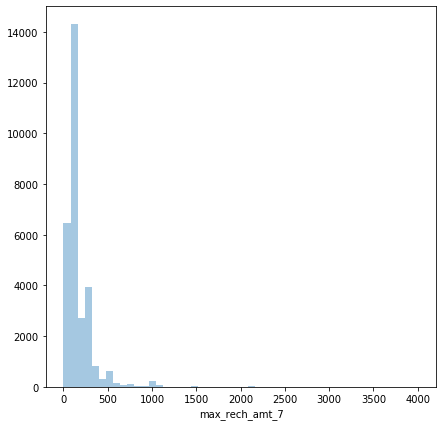

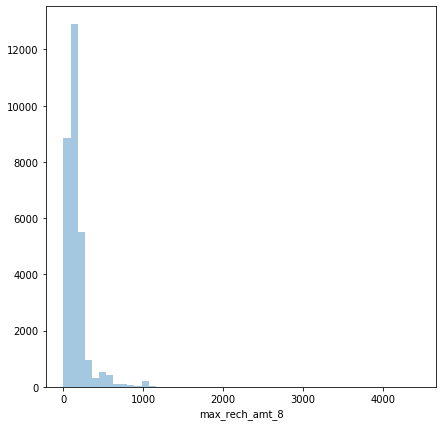

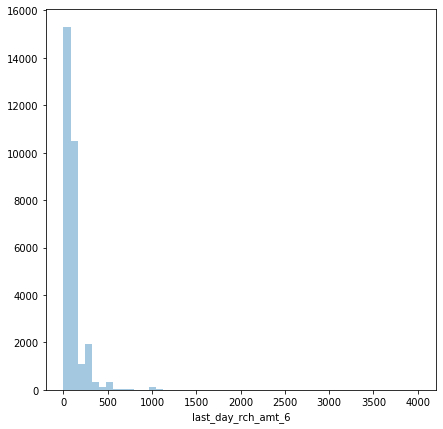

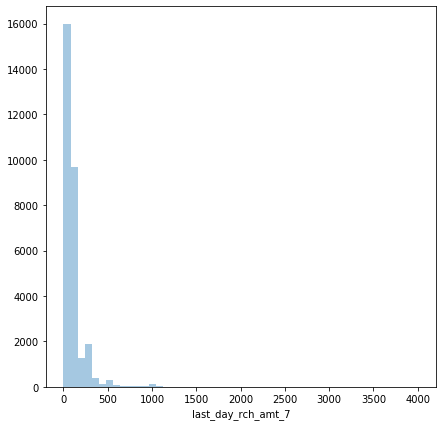

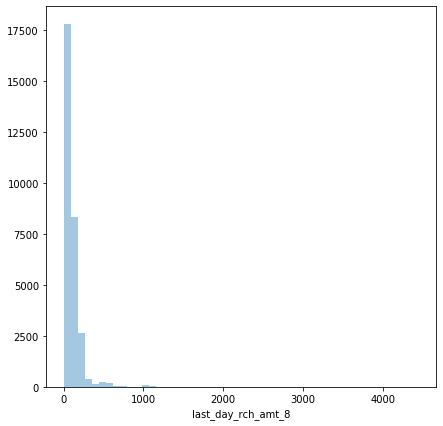

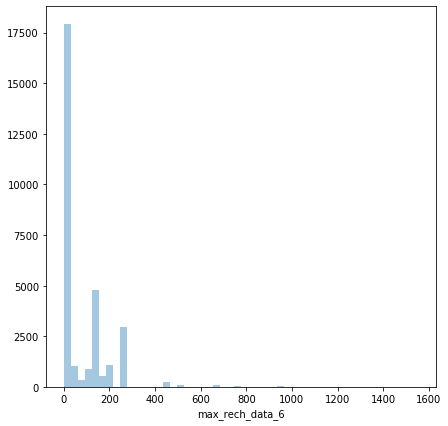

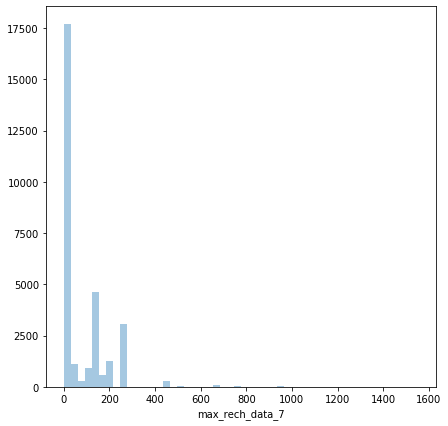

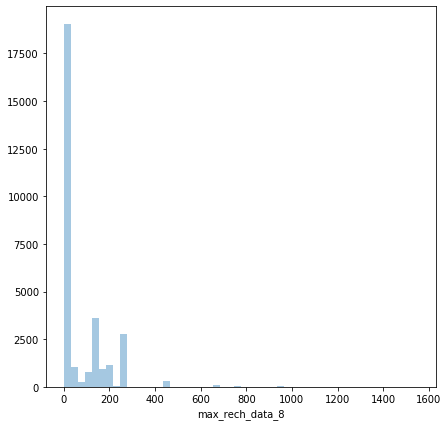

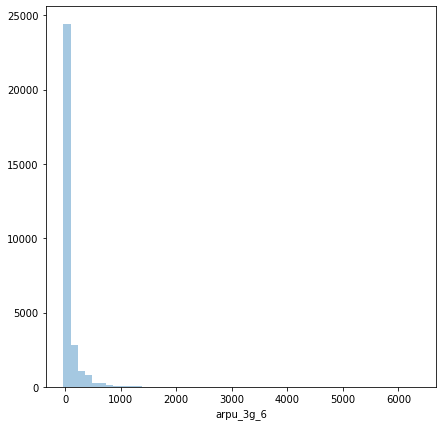

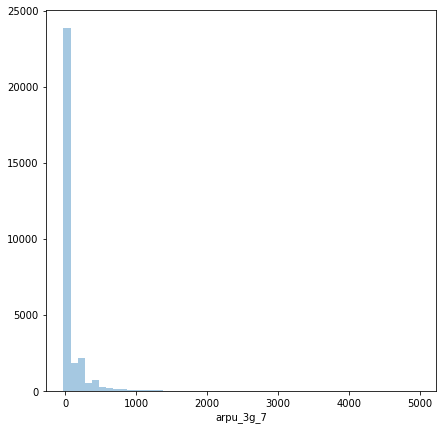

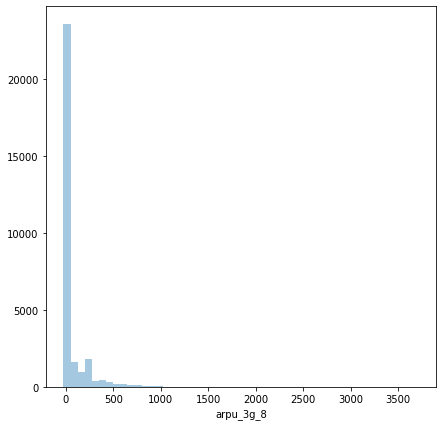

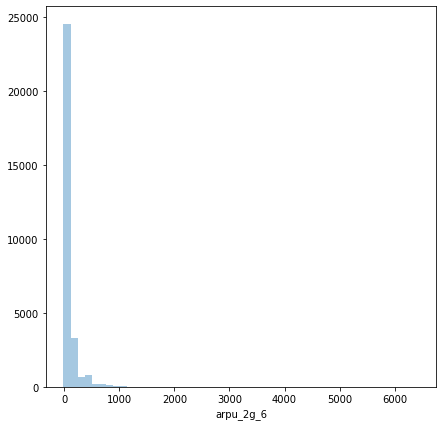

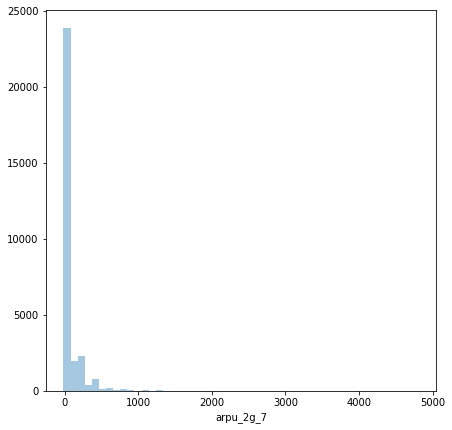

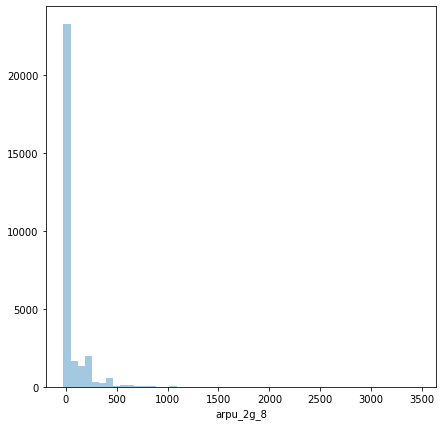

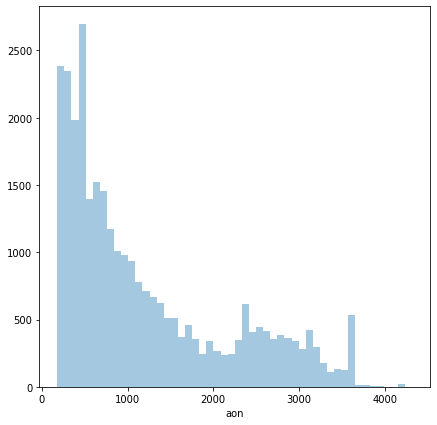

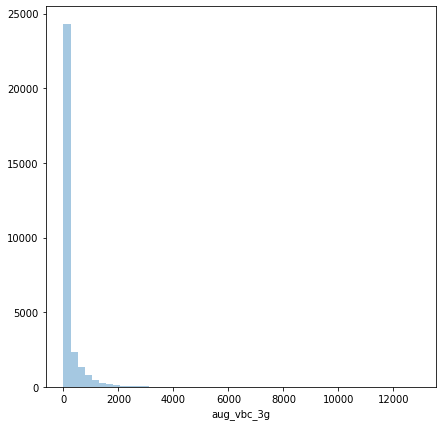

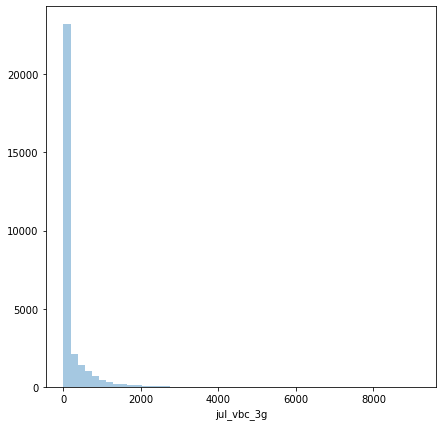

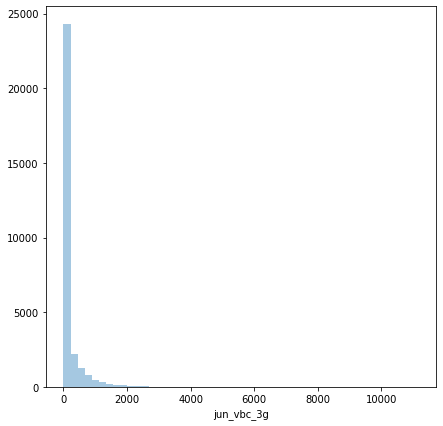

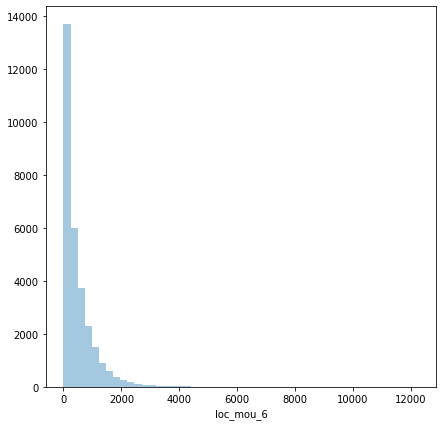

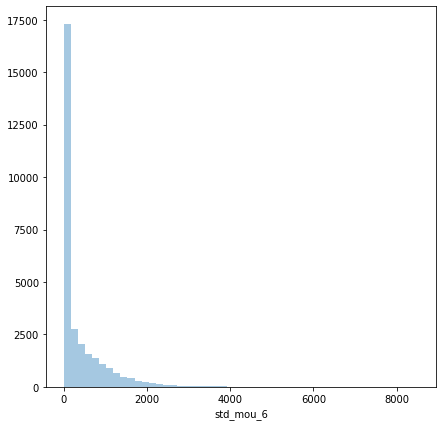

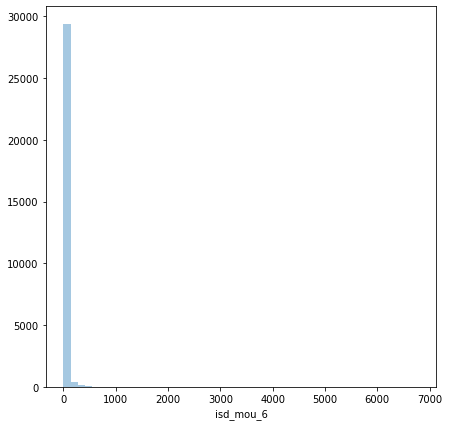

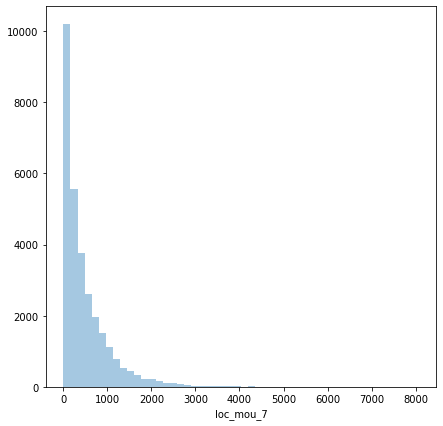

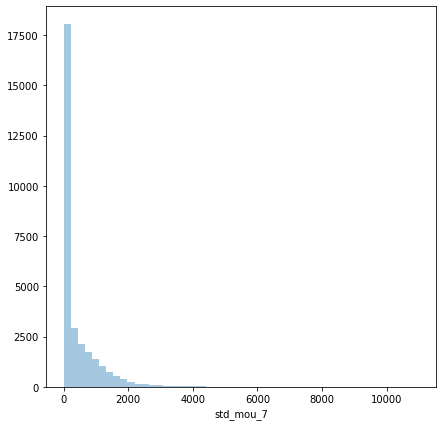

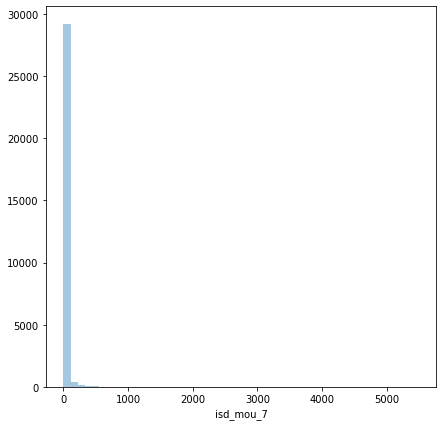

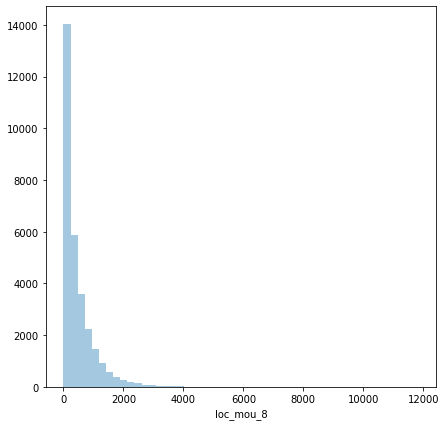

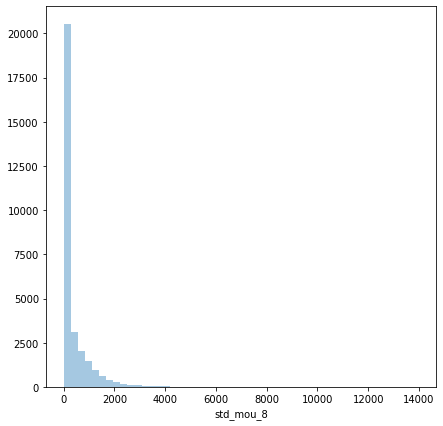

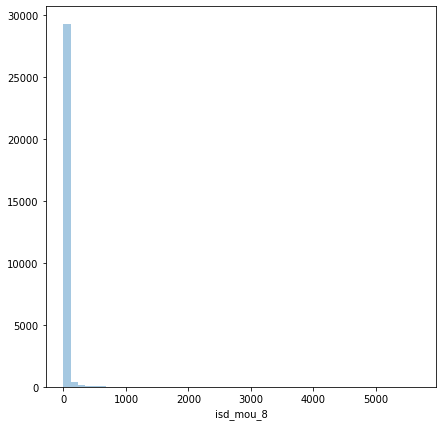

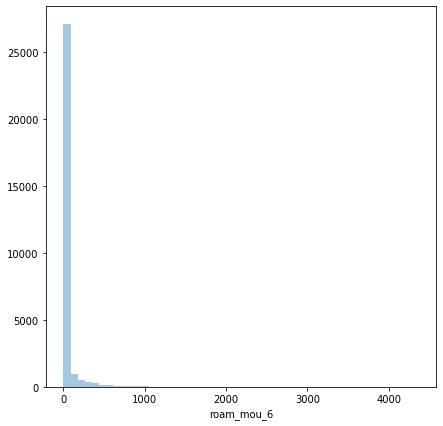

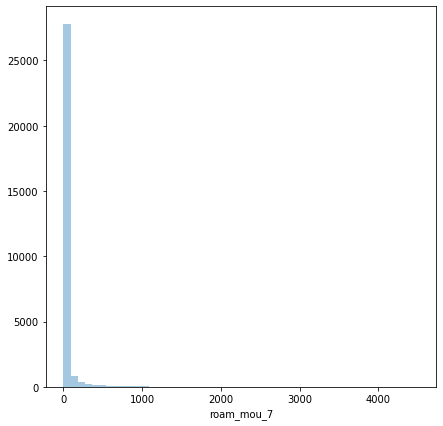

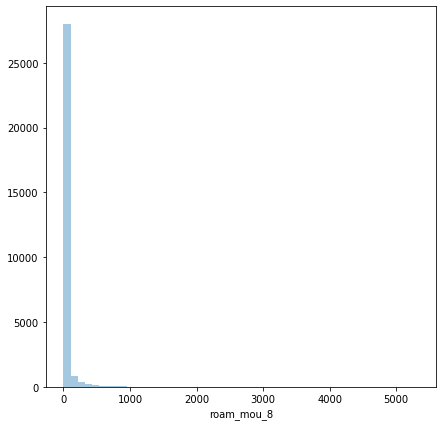

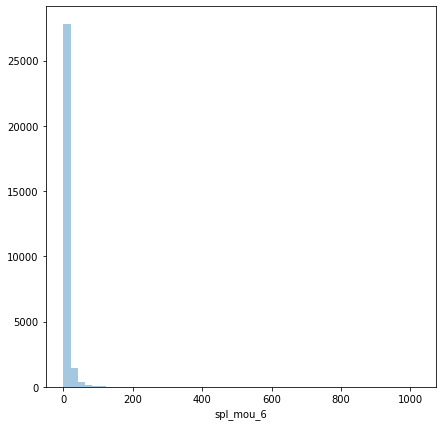

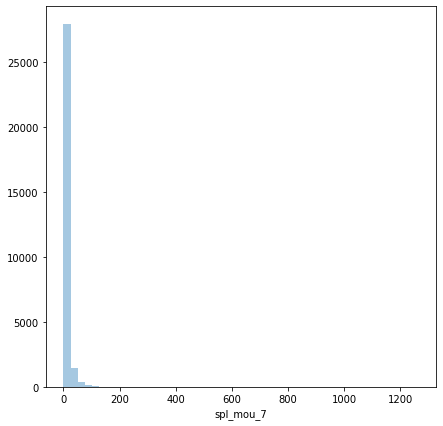

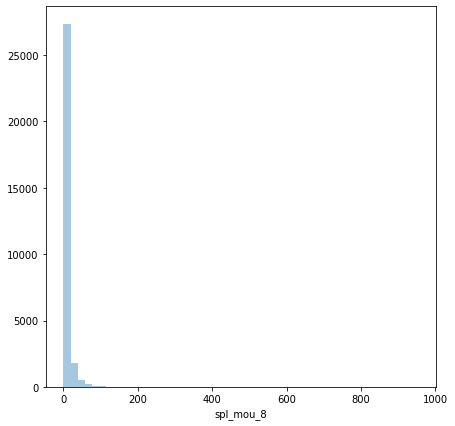

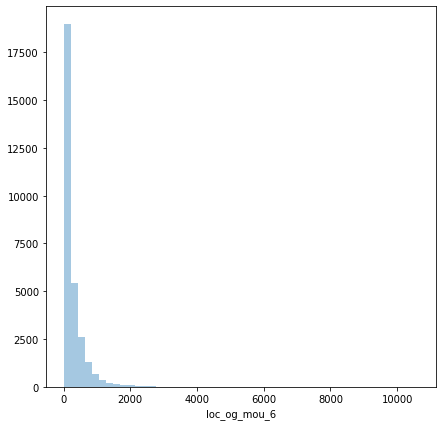

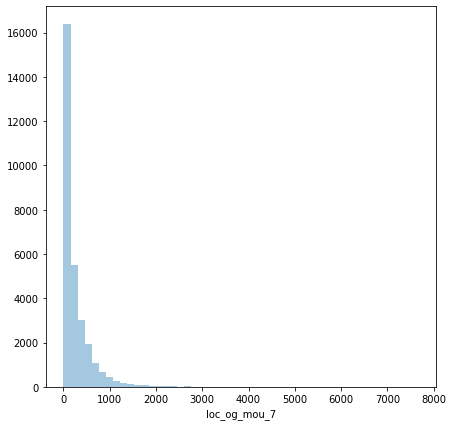

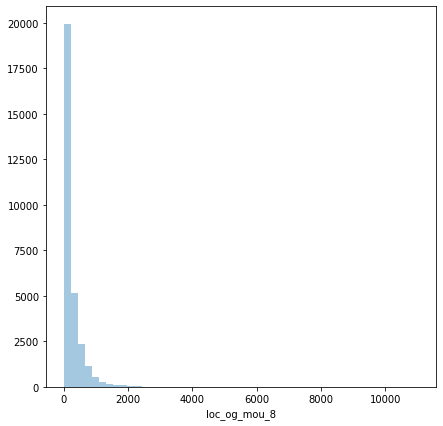

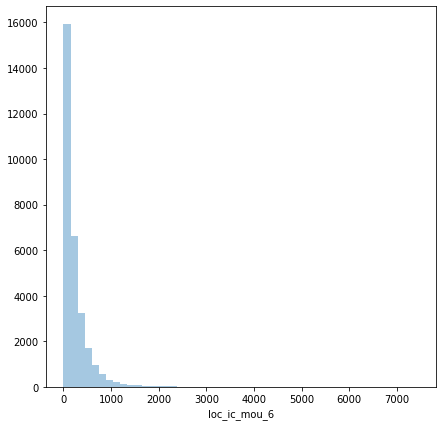

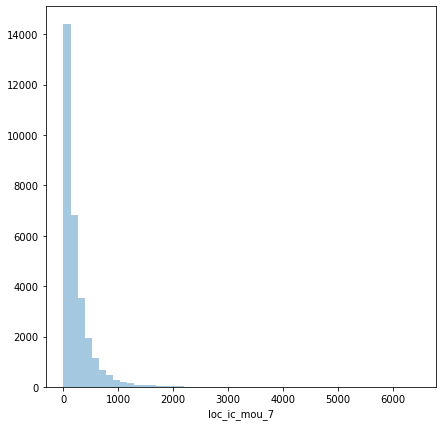

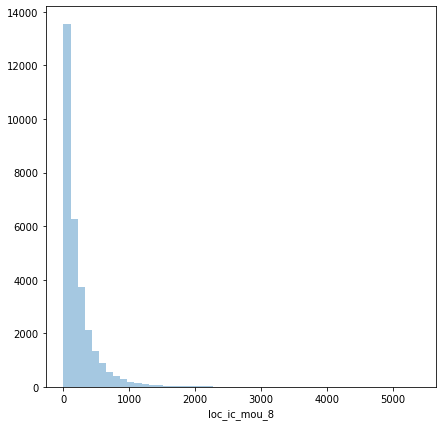

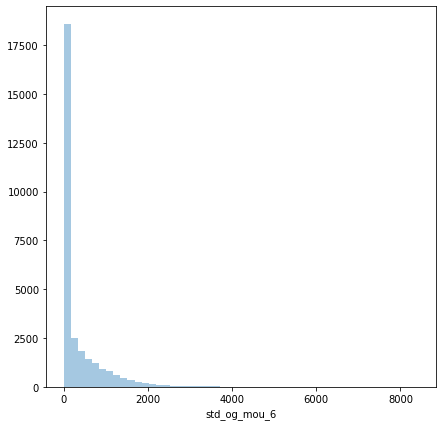

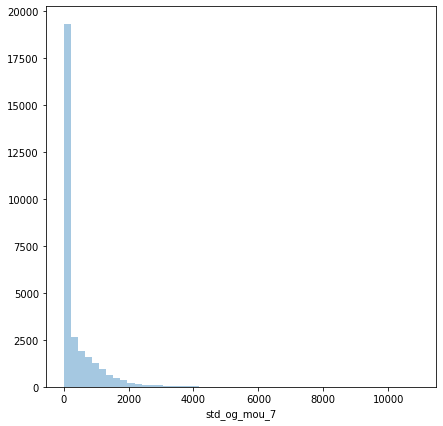

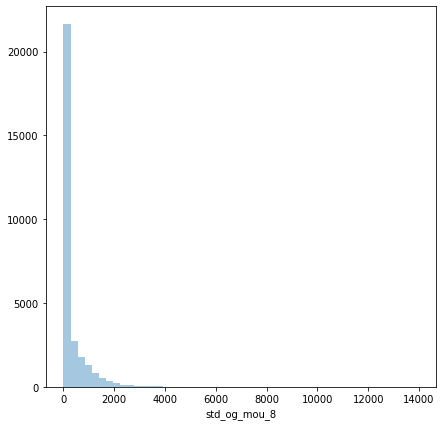

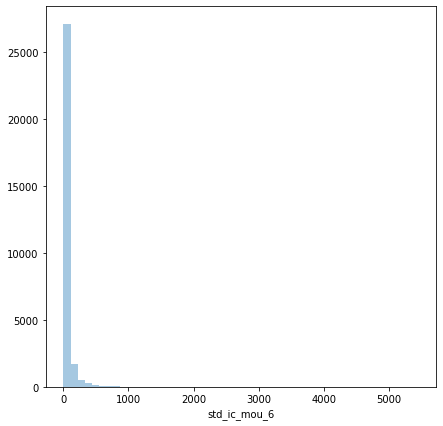

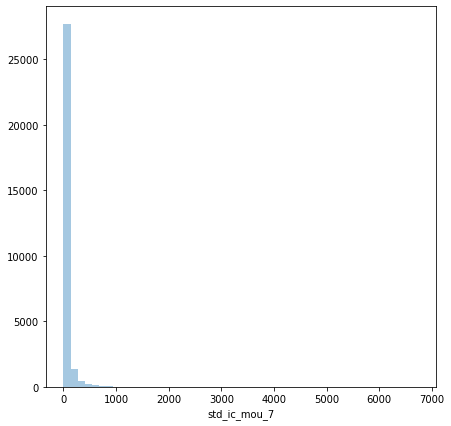

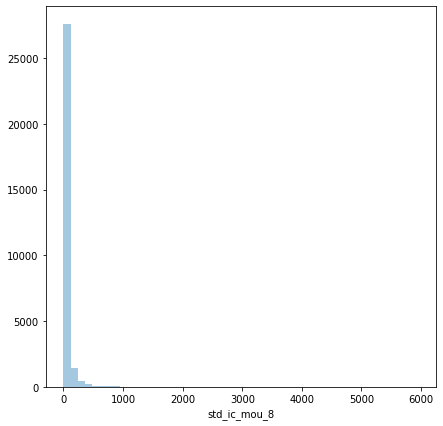

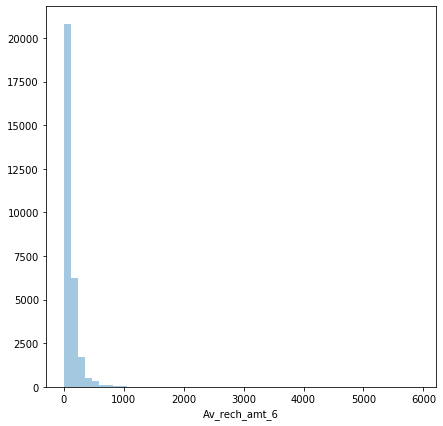

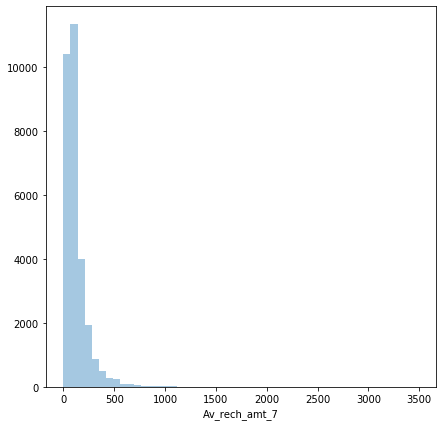

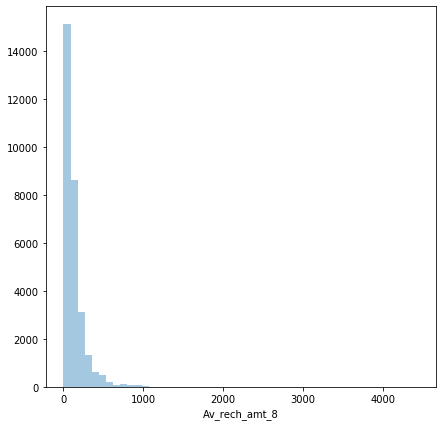

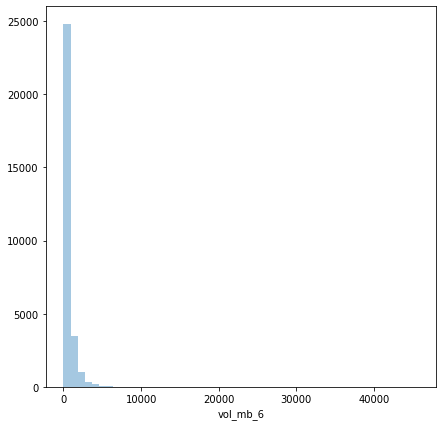

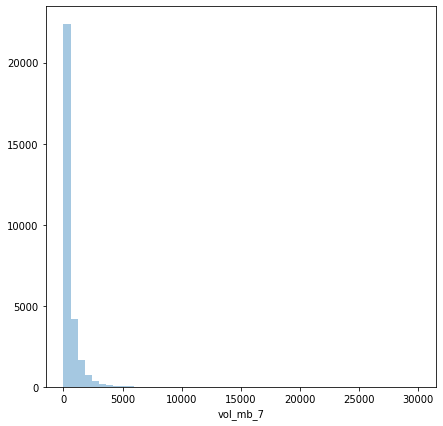

In [168]:
for i in churn.columns:
    if i not in cols:
        figure = plt.figure(figsize=(7,7))
        sns.distplot(churn[i],kde=False)
        plt.show()

Almost all the variables have a significant outliers present so we will need to either drop or cap those records. Additionally, there are variables where the distribution has little to no variance, so let us determine those variables with more than 95% records belonging to one category/value and drop them

In [169]:
# dropping columns that have more than 95% records belonging to one category/value
print('The variables that have more than 95% records belonging to one category are:' )
for i in churn.columns:
    if ((churn[i].value_counts(normalize=True)>=0.95).any())==True:
        if i!='Churn':
            print(i)
            churn.drop(i,inplace=True,axis=1)

The variables that have more than 95% records belonging to one category are:
og_others_7
og_others_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
rech_6
rech_7
rech_8


In [170]:
churn.shape

(30001, 86)

<a id='Bivariate'></a>

## Bivariate Analysis

In [171]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              30001 non-null  float64
 1   arpu_7              30001 non-null  float64
 2   arpu_8              30001 non-null  float64
 3   onnet_mou_6         30001 non-null  float64
 4   onnet_mou_7         30001 non-null  float64
 5   onnet_mou_8         30001 non-null  float64
 6   offnet_mou_6        30001 non-null  float64
 7   offnet_mou_7        30001 non-null  float64
 8   offnet_mou_8        30001 non-null  float64
 9   og_others_6         30001 non-null  float64
 10  total_og_mou_6      30001 non-null  float64
 11  total_og_mou_7      30001 non-null  float64
 12  total_og_mou_8      30001 non-null  float64
 13  total_ic_mou_6      30001 non-null  float64
 14  total_ic_mou_7      30001 non-null  float64
 15  total_ic_mou_8      30001 non-null  float64
 16  ic_o

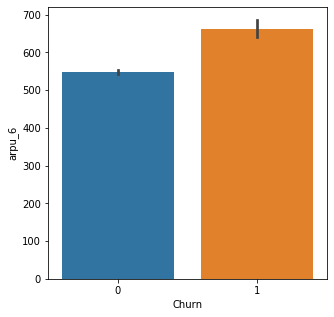

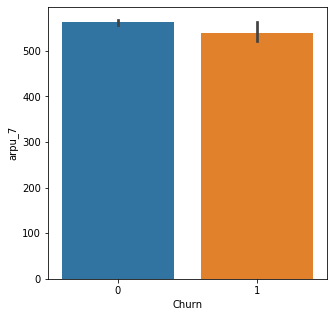

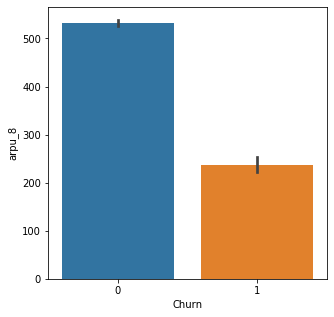

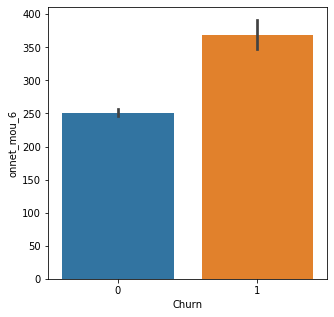

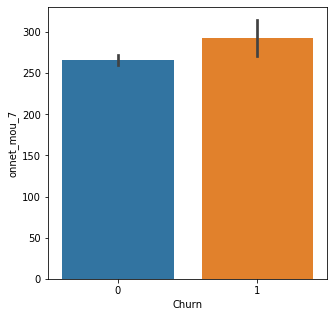

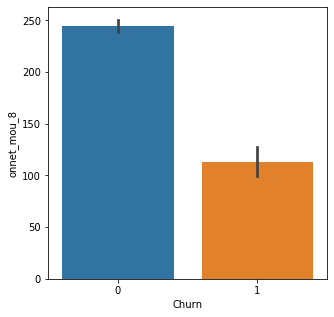

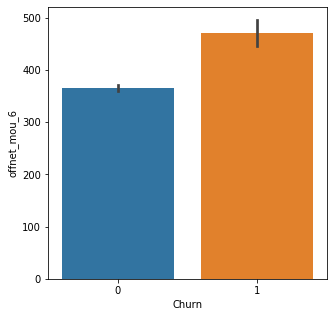

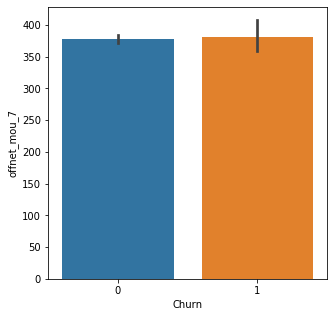

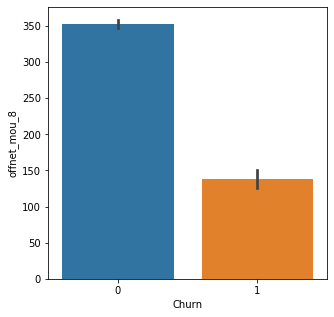

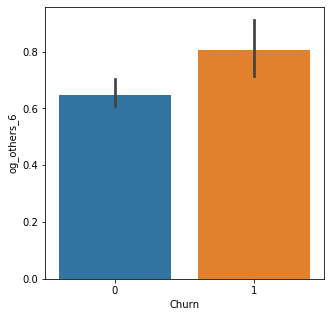

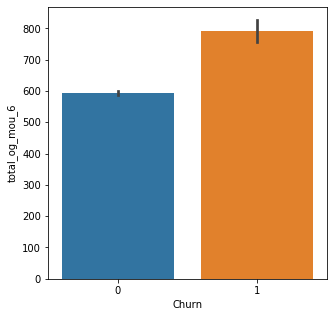

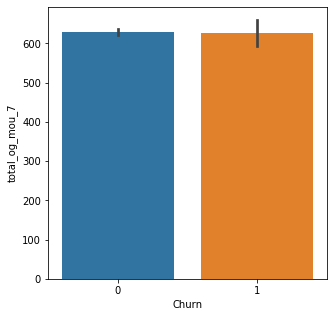

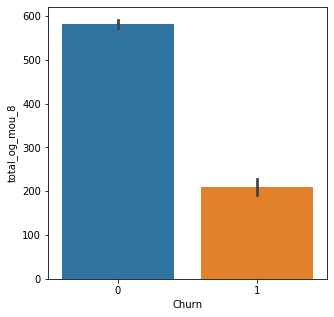

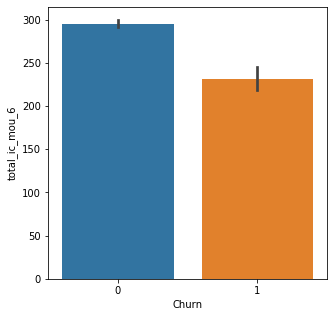

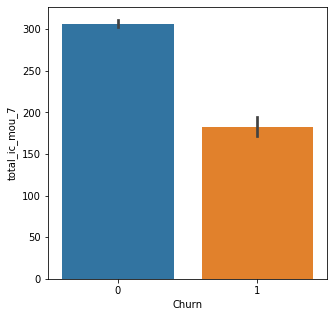

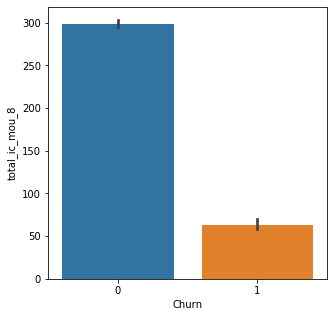

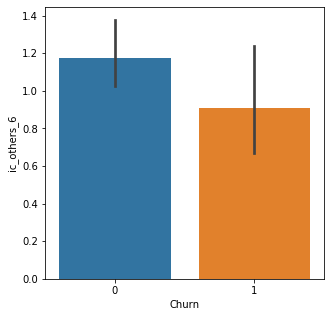

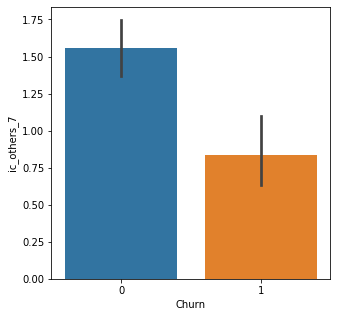

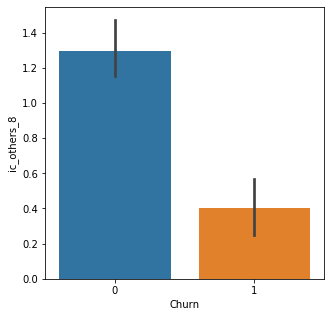

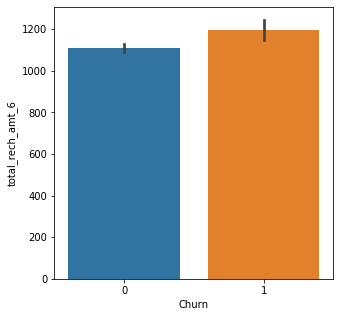

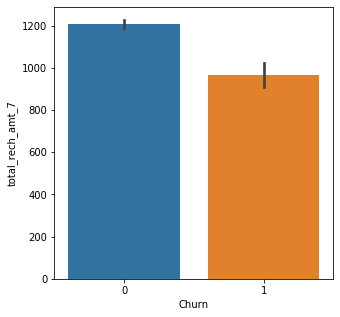

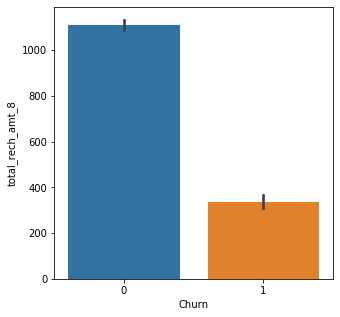

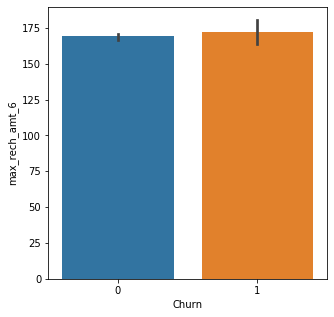

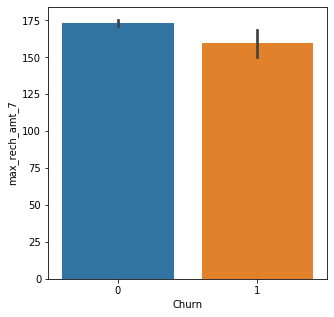

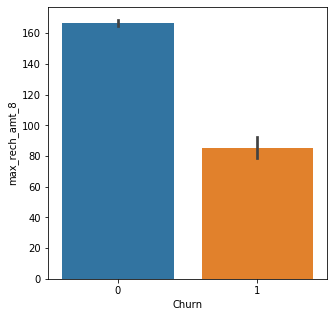

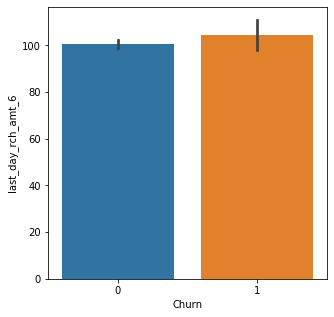

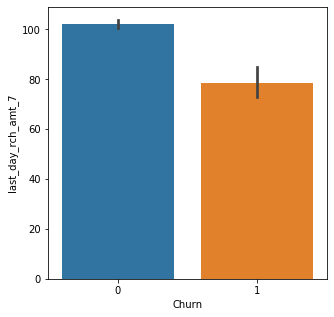

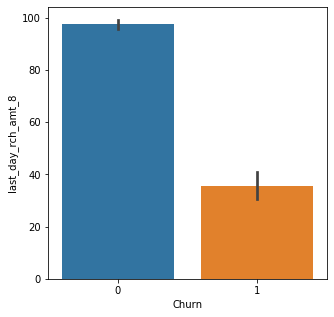

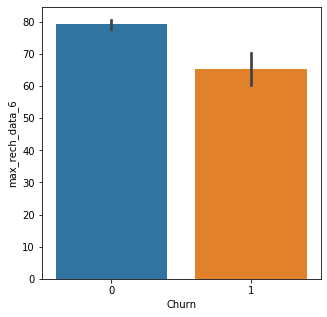

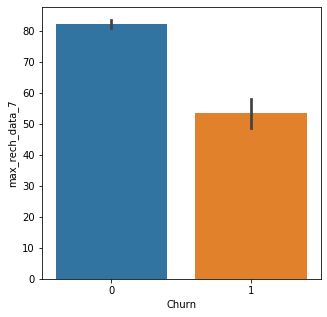

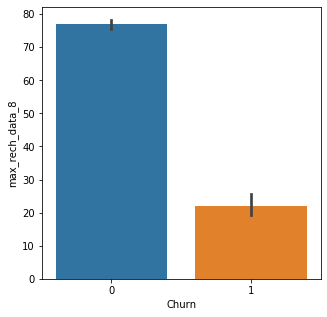

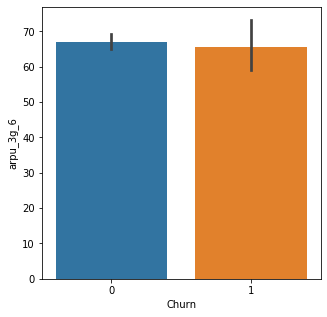

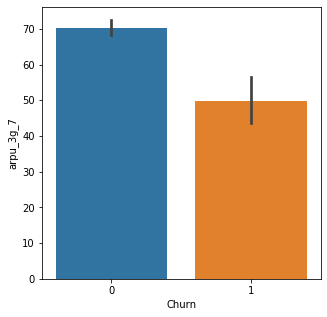

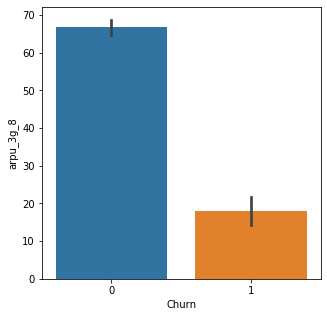

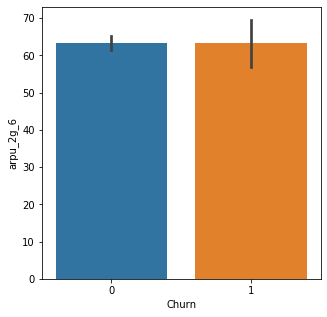

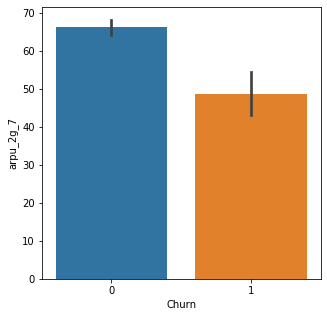

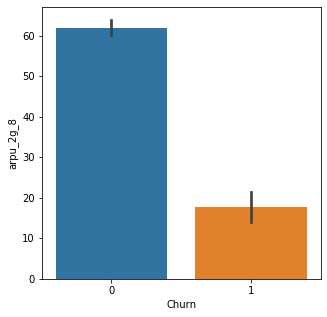

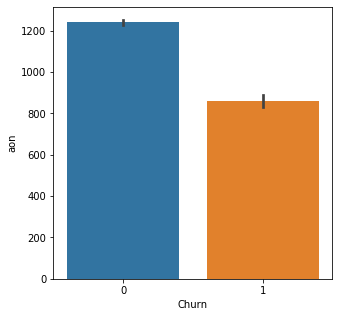

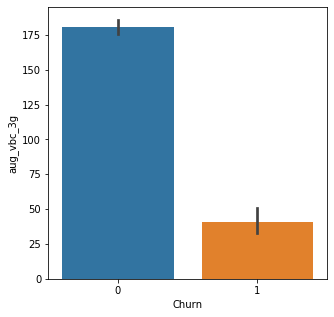

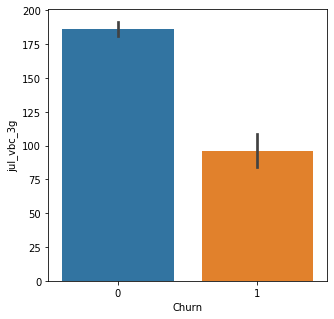

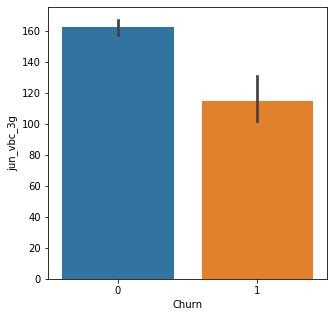

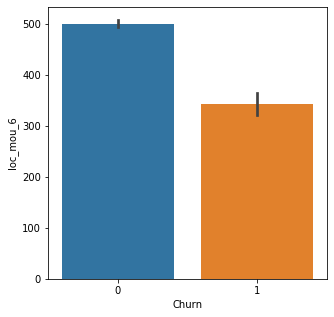

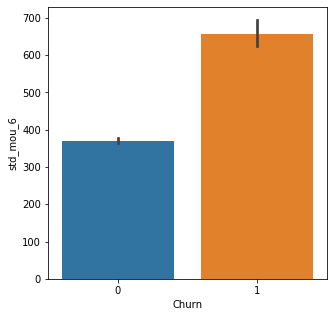

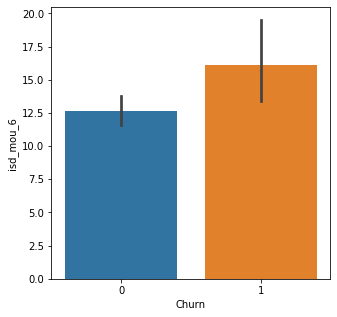

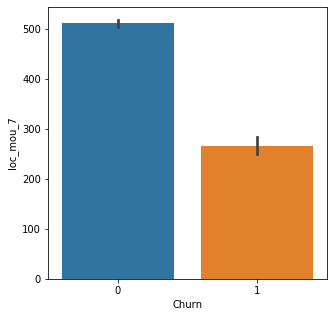

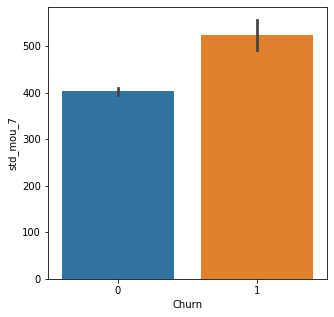

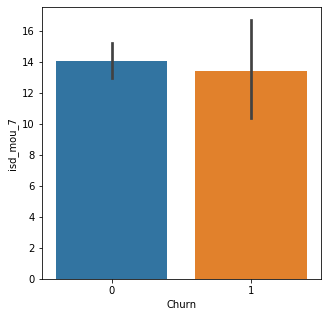

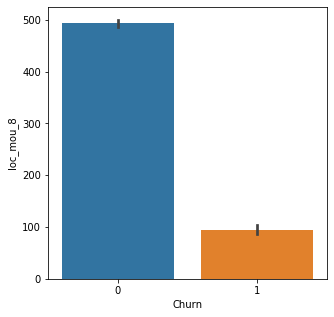

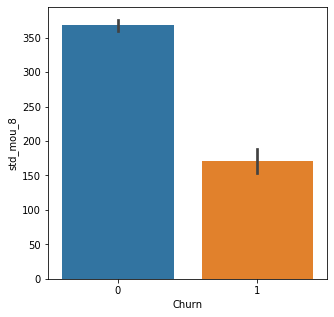

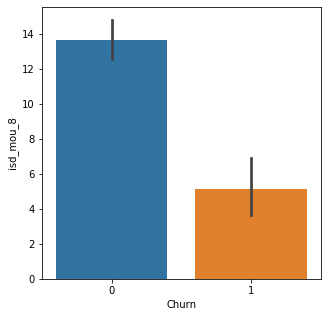

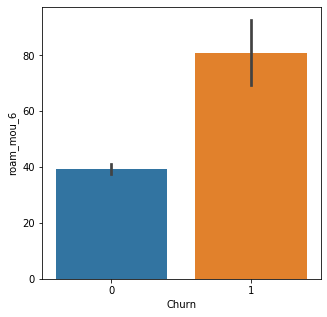

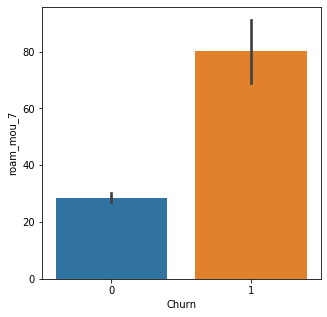

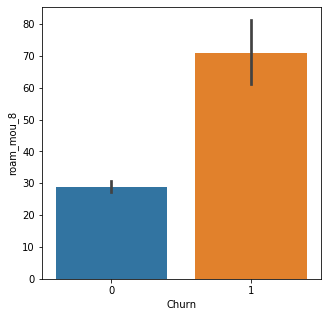

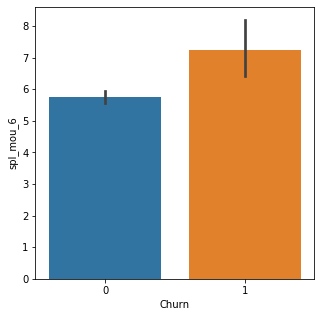

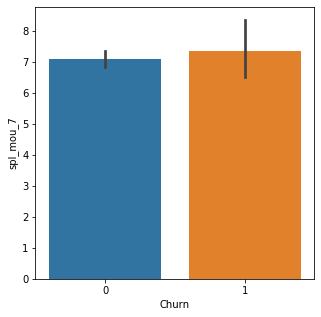

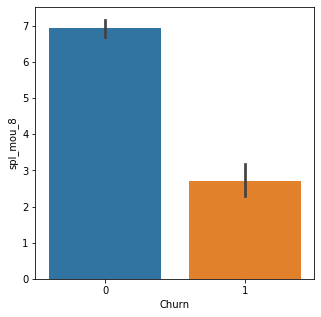

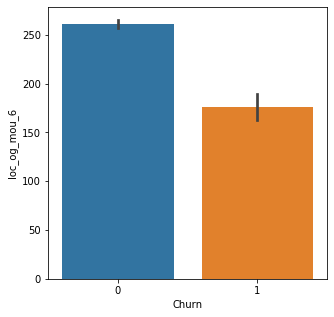

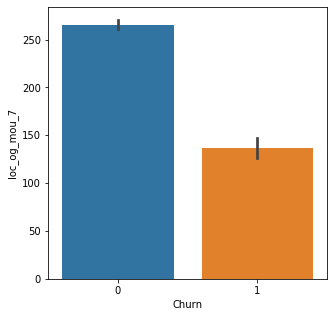

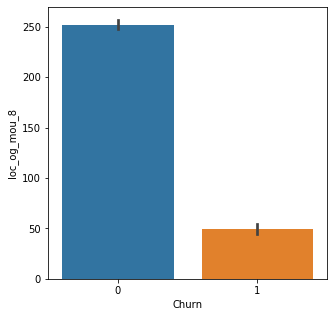

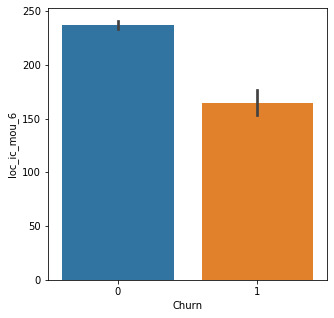

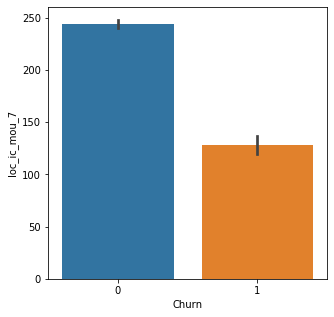

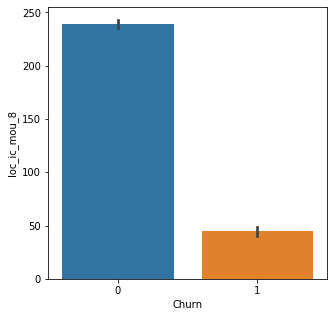

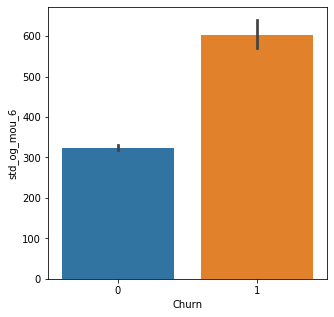

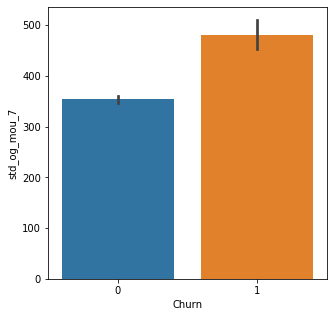

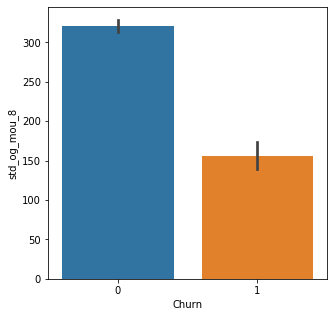

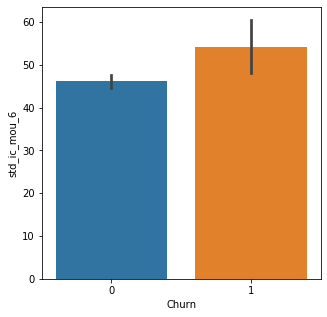

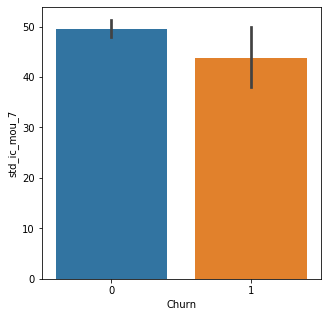

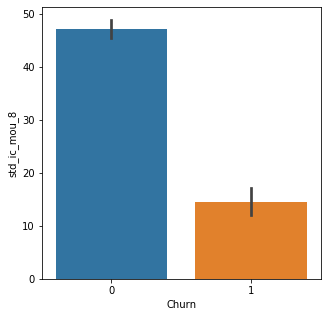

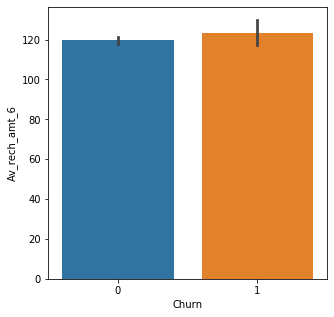

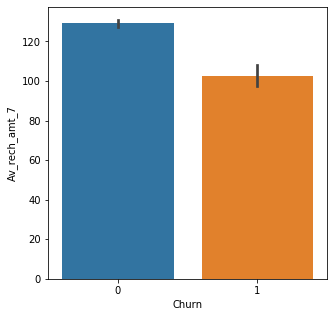

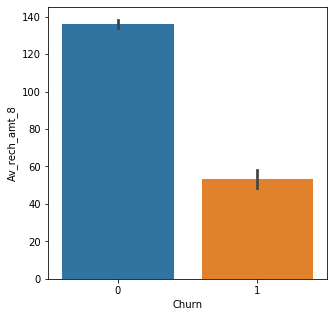

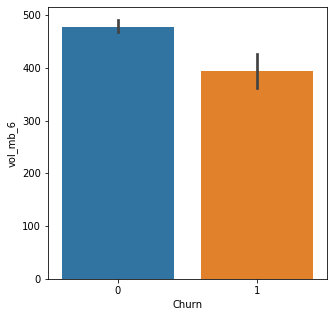

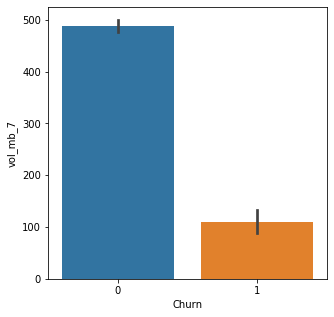

In [172]:
cols = ['Total_monthly_6','Total_monthly_7', 'Total_monthly_8', 'Total_sachet_6','Total_sachet_7', 
        'Total_sachet_8','Churn', 'rech_data_6', 'rech_data_7', 'rech_data_8','fb_user_6','fb_user_7', 'fb_user_8']
for i in churn.columns:
    if i not in cols:
        figure = plt.figure(figsize=(5,5))
        sns.barplot(y = i, x = 'Churn',data=churn,estimator=np.mean)
        plt.show()

Bivariate analysis for the categorical columns

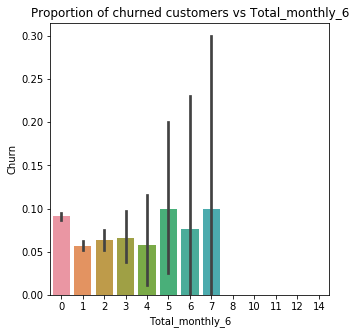

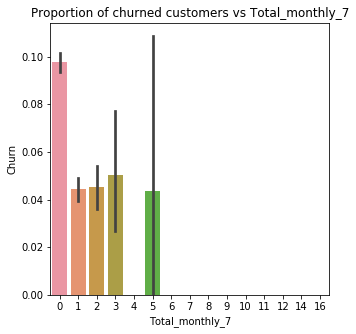

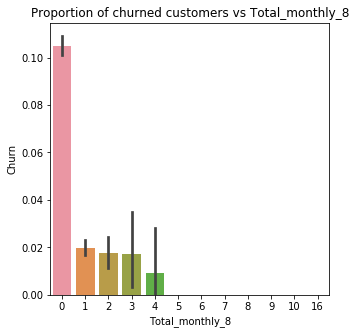

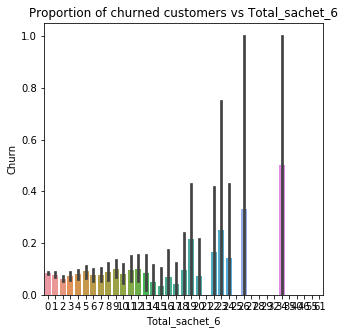

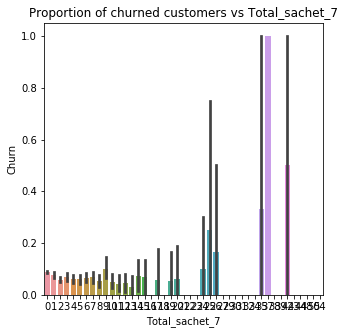

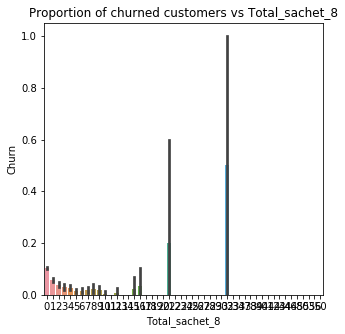

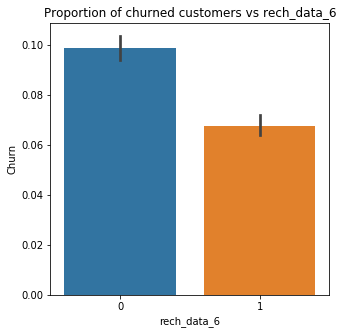

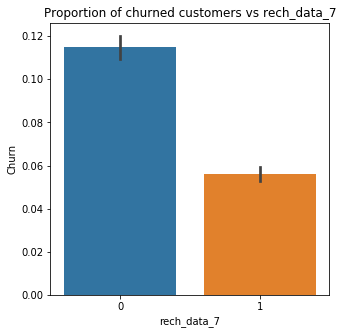

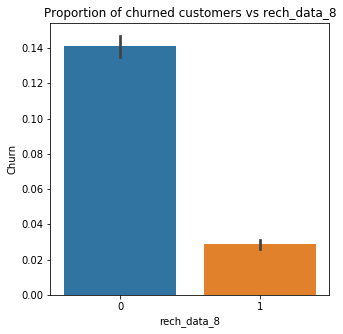

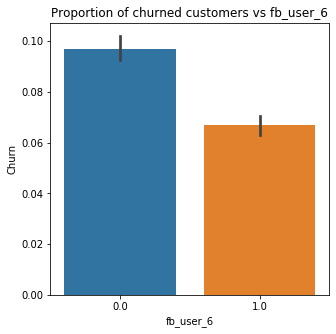

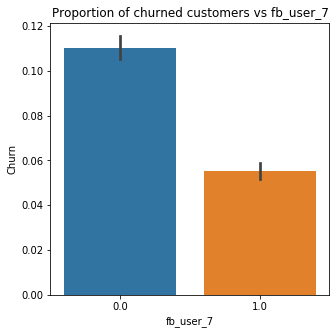

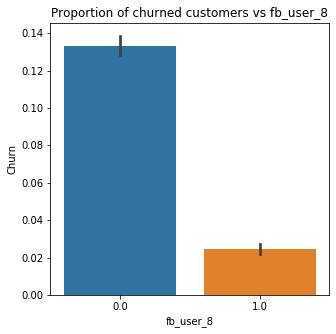

In [173]:
cols = ['Total_monthly_6','Total_monthly_7', 'Total_monthly_8', 'Total_sachet_6','Total_sachet_7', 
        'Total_sachet_8', 'rech_data_6', 'rech_data_7', 'rech_data_8','fb_user_6','fb_user_7', 'fb_user_8']
for i in cols:
    figure = plt.figure(figsize=(5,5))
    sns.barplot(y = 'Churn', x = i,data=churn)
    plt.title("Proportion of churned customers vs "+i)
    plt.show()

We can observe from the above bivariate analysis for continuous variables that, the average of the metric doesn't vary significantly during the two months in the good phase. These metrics for the months 6 and 7 can be combined together to obtain the aggregated value for the good phase. The following process details the same

In [174]:
columns=['Churn','aon','aug_vbc_3g', 'jul_vbc_3g','jun_vbc_3g']
# Getting the unique variables in the dataset by excluding the month value
cols=list(set([i[:-2] for i in churn.columns if i not in columns])) 
cols.remove('og_others')
cols

['Total_sachet',
 'arpu_3g',
 'max_rech_amt',
 'loc_og_mou',
 'offnet_mou',
 'max_rech_data',
 'isd_mou',
 'rech_data',
 'std_ic_mou',
 'Av_rech_amt',
 'total_ic_mou',
 'total_rech_amt',
 'std_og_mou',
 'total_og_mou',
 'onnet_mou',
 'loc_mou',
 'Total_monthly',
 'last_day_rch_amt',
 'std_mou',
 'fb_user',
 'arpu',
 'arpu_2g',
 'ic_others',
 'spl_mou',
 'vol_mb',
 'loc_ic_mou',
 'roam_mou']

In [175]:
cols2=['rech_data','fb_user'] # Categorical columns

# finding the average of all the continuous variables for the first two months
drop_=[]
for i in cols:
    if i not in cols2:
        churn[i+'_good_phase']=(churn[i+'_6']+churn[i+'_7'])/2
        drop_.extend([i+'_6',i+'_7'])

churn['vbc_3g_good_phase']=(churn['jun_vbc_3g']+churn['jul_vbc_3g'])/2
drop_.extend(['jun_vbc_3g','jul_vbc_3g'])

# aggregate for the categorical columns
for i in cols2:
    churn[i+'_good_phase']=0
    churn.loc[churn[i+'_6']+churn[i+'_7']>=1,i+'_good_phase']=1  
    drop_.extend([i+'_6',i+'_7'])

churn.drop(drop_,axis=1,inplace=True)
churn.rename(columns={'og_others_6':'og_others_good_phase'},inplace=True)

In [176]:
churn.head()

arpu_8  onnet_mou_8  offnet_mou_8  og_others_good_phase  total_og_mou_8  \
0    213.803         0.00          0.00                   0.0            0.00   
7   3171.480        52.29        325.91                   0.0          350.16   
8    137.362        35.08        136.48                   0.0          171.56   
21   637.760        85.14        983.39                   0.0         1068.54   
23   366.966        33.58        205.89                   0.0          239.48   

    total_ic_mou_8  ic_others_8  total_rech_amt_8  max_rech_amt_8  \
0             5.44         0.00             504.0             252   
7           428.74        15.14            3638.0            1580   
8            16.54         0.00             327.0              30   
21          261.04         0.00             718.0              50   
23          298.33        13.06             979.0             179   

    last_day_rch_amt_8  max_rech_data_8  arpu_3g_8  arpu_2g_8  fb_user_8  aon  \
0                  252            252.0     212.17     212.17        1.0  968   
7                  779              0.0       0.00       0.00        0.0  802   
8                   10             23.0      19.83       0.00        1.0  315   
21                  50              0.0       0.00       0.00        0.0  720   
23                   0            179.0     197.27     150.67        1.0  604   

    aug_vbc_3g  Churn  rech_data_8  loc_mou_8  std_mou_8  isd_mou_8  \
0        30.40      1            1       5.44       0.00       0.00   
7        57.74      1            0     443.82     271.76      41.60   
8        21.03      0            1      85.97      99.02       0.00   
21        0.00      0            0     288.82    1040.70       0.00   
23       40.45      0            1     424.04      96.90       3.74   

    roam_mou_8  spl_mou_8  loc_og_mou_8  loc_ic_mou_8  std_og_mou_8  \
0          0.0       0.00          0.00          5.44          0.00   
7         69.7       6.50        255.79        188.04         77.84   
8          0.0      10.23         63.04         15.79         98.28   
21         0.0       0.00        129.74        159.11        938.79   
23         0.0      17.71        182.14        224.21         39.61   

    std_ic_mou_8  Av_rech_amt_8  Total_monthly_8  Total_sachet_8  \
0           0.00     252.000000                1               0   
7         193.94     519.714286                0               0   
8           0.75      23.357143                0               3   
21        101.93      26.592593                0               0   
23         57.29     244.750000                1               1   

    Total_sachet_good_phase  arpu_3g_good_phase  max_rech_amt_good_phase  \
0                       0.0             212.170                    252.0   
7                       0.0               0.000                   1185.0   
8                       0.5               0.000                    122.0   
21                      0.0               0.000                     50.0   
23                      0.0             153.285                     89.5   

    loc_og_mou_good_phase  offnet_mou_good_phase  max_rech_data_good_phase  \
0                   0.000                  0.000                     252.0   
7                 478.035                510.295                       0.0   
8                 333.135                 87.645                      77.0   
21                 95.565                827.305                       0.0   
23                132.795                 87.385                      89.5   

    isd_mou_good_phase  std_ic_mou_good_phase  Av_rech_amt_good_phase  \
0                0.000                  0.000              160.750000   
7                8.385                176.810              237.000000   
8                0.000                 13.545               34.238095   
21               0.000                 62.985               26.713287   
23              14.120                  8.915              116.

In [177]:
churn.shape

(30001, 58)

Thus we have aggregated the metrics of the first two months into a single metric that signifies the customers' good phase. There are now 58 columns for the analysis 

<a id='Outlier'></a>

### Outlier Treatment
We can observe that there are a huge number of outliers present in almost every variable. Let us either cap the variables or remove the records that contain very few albeit significant outliers. <br>

Let us plot the percentile vs. values plot for each of the variable and check the exact percentile at which the values see a steep rise. We can then cap or remove the rows accordingly


In [178]:
cols = ['Total_monthly_good_phase','Total_monthly_8', 'Total_sachet_good_phase', 
        'Total_sachet_8', 'rech_data_good_phase', 'rech_data_8','fb_user_good_phase', 'fb_user_8']

Let us plot the values vs. percentiles graph to check where the values see a steep rise 

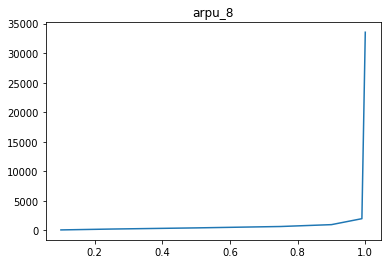

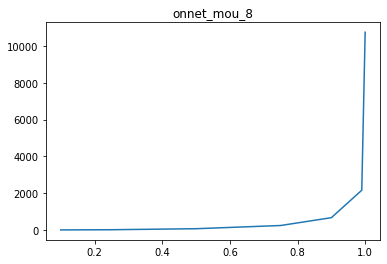

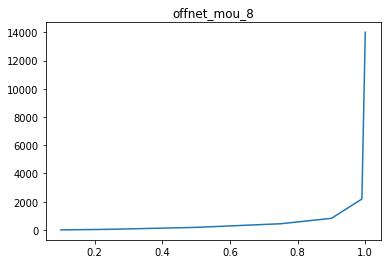

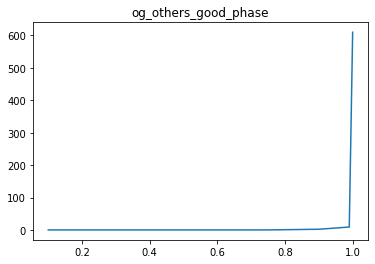

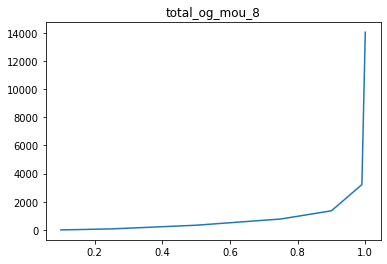

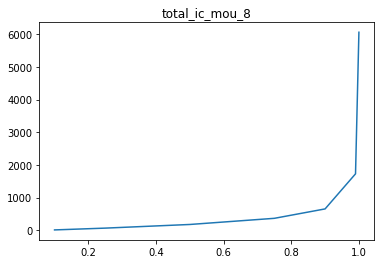

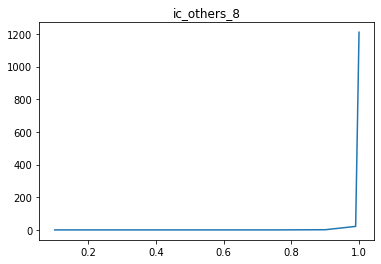

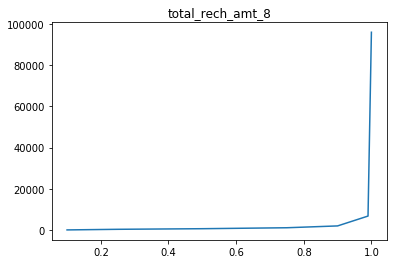

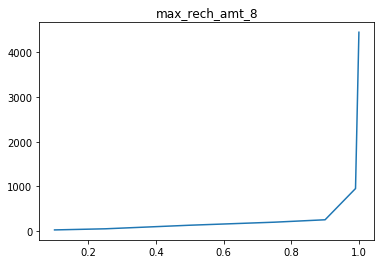

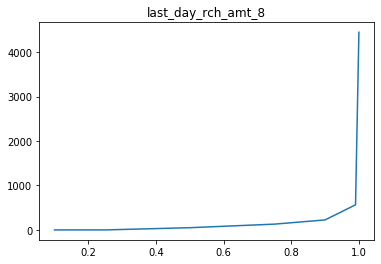

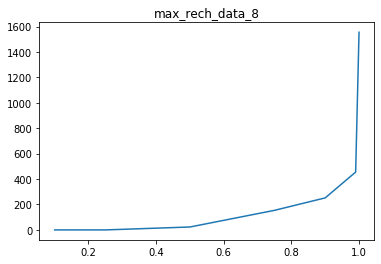

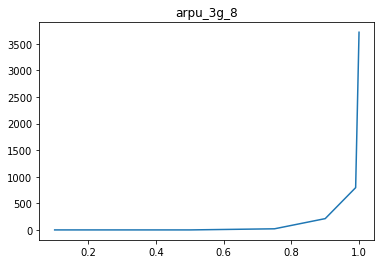

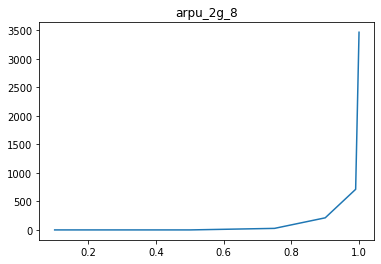

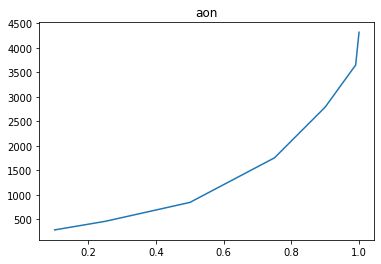

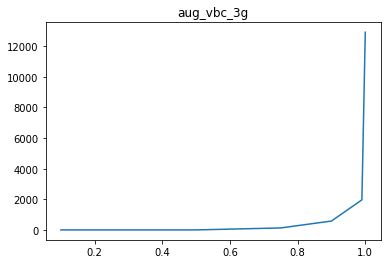

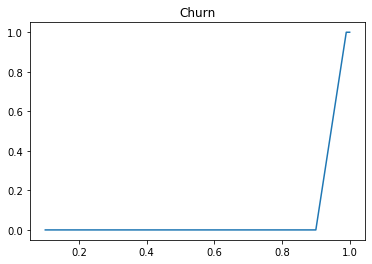

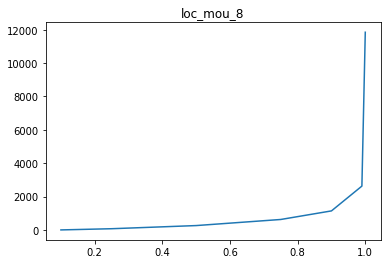

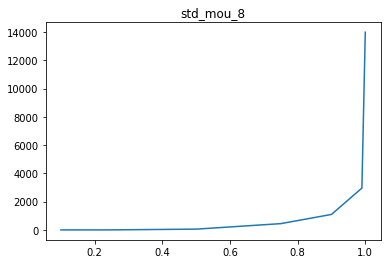

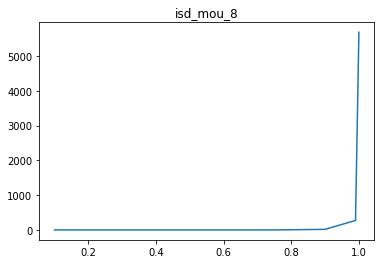

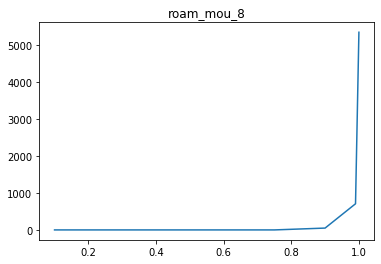

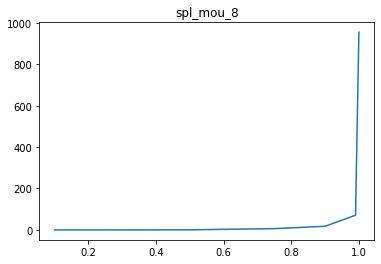

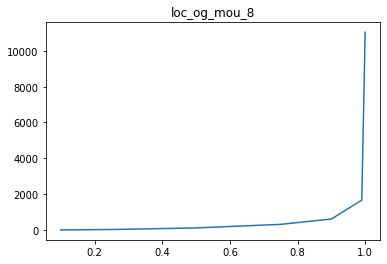

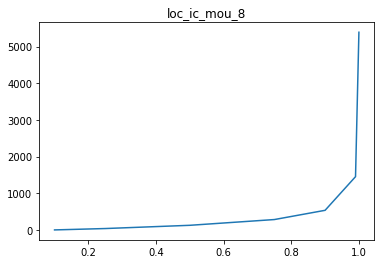

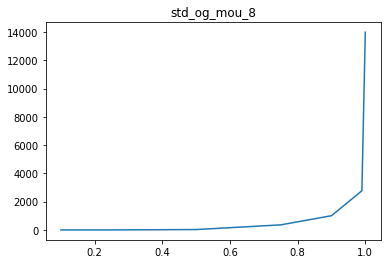

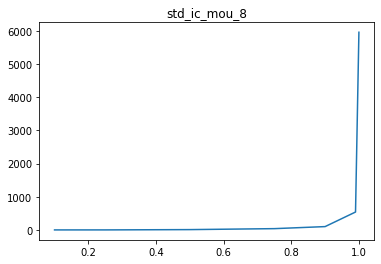

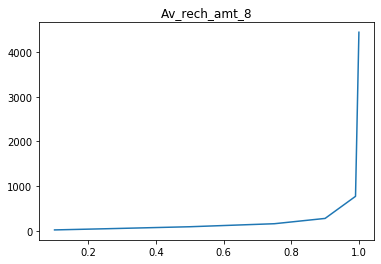

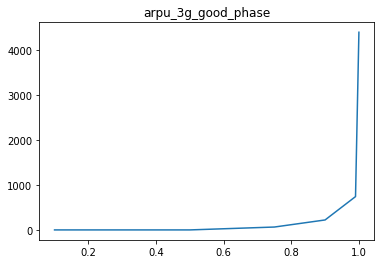

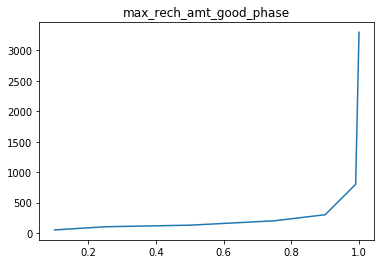

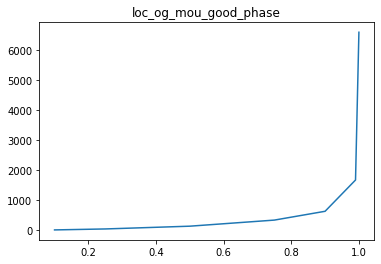

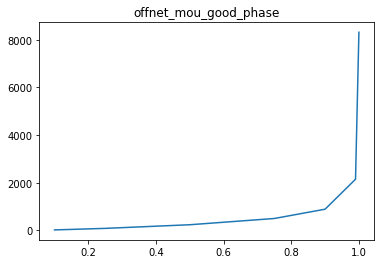

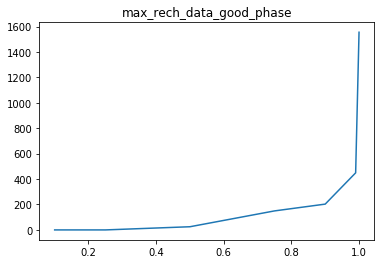

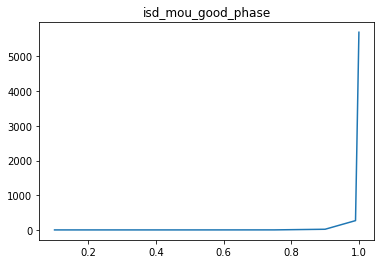

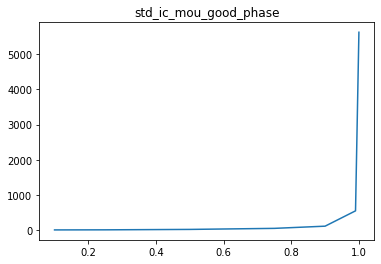

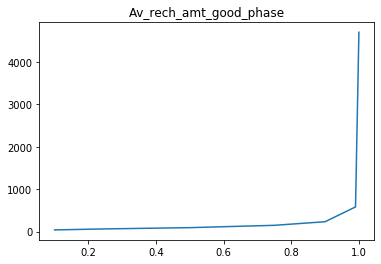

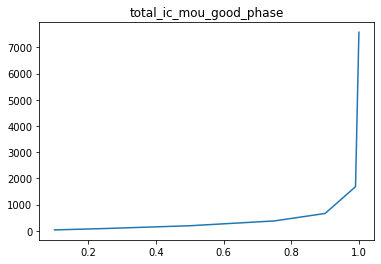

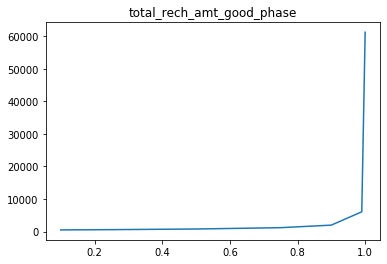

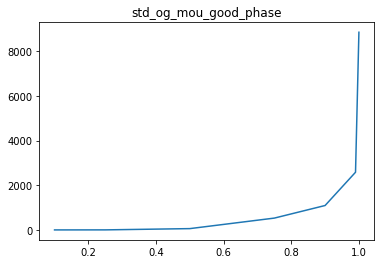

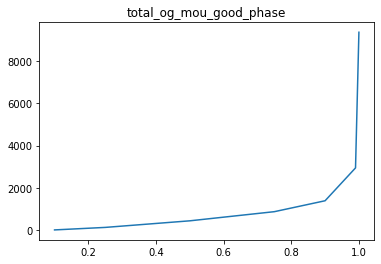

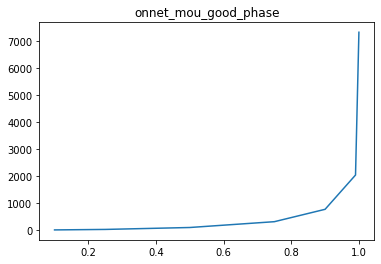

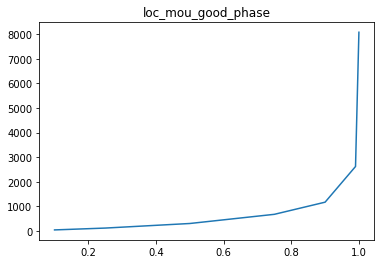

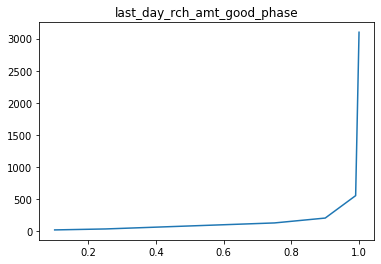

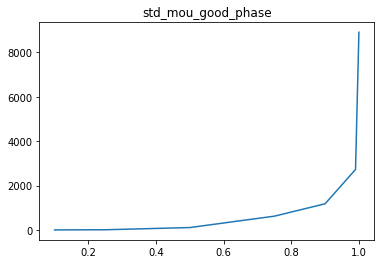

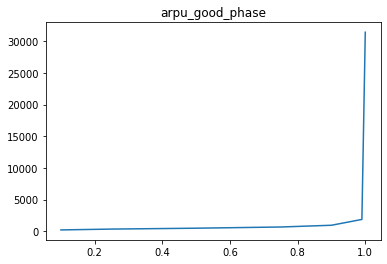

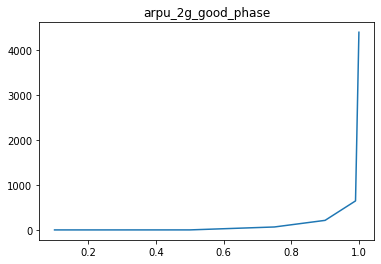

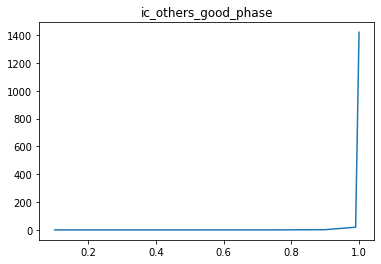

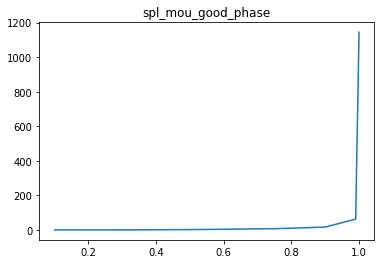

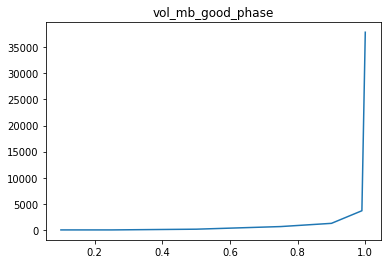

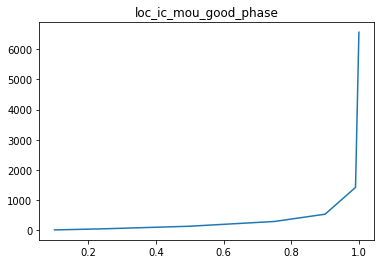

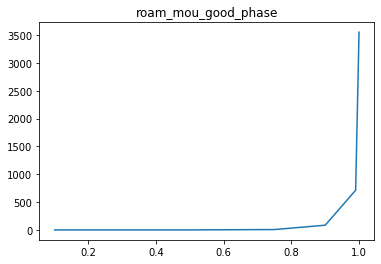

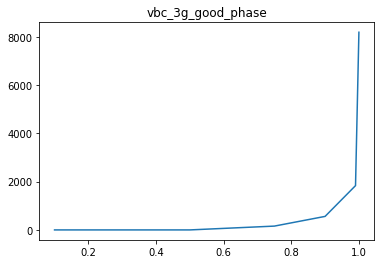

In [179]:
y  = np.array([.1, .25, .5, .75,0.9,0.99,1])
c = churn.quantile([.1, .25, .5, .75,0.9,0.99,1], axis = 0) 
for i in c.columns:
    if i not in cols:
        plt.plot(y,c[i])
        plt.title(i)
        plt.show()

In [180]:
churn.describe(percentiles=[0.9,0.95,0.98,0.99,0.999,0.9999])

arpu_8   onnet_mou_8  offnet_mou_8  og_others_good_phase  \
count   30001.000000  30001.000000  30001.000000          30001.000000   
mean      508.597957    234.112539    335.077044              0.661092   
std       501.961981    458.448598    482.062509              4.107960   
min      -945.808000      0.000000      0.000000              0.000000   
50%       427.585000     65.610000    182.790000              0.000000   
90%       977.345000    665.080000    823.680000              2.060000   
95%      1255.019000   1074.590000   1167.540000              3.890000   
98%      1659.130000   1654.730000   1729.830000              6.480000   
99%      1986.622000   2159.110000   2193.130000              8.890000   
99.9%    3976.261000   4165.710000   4472.460000             23.530000   
99.99%  13505.996000   7470.360000   7460.210000             67.690000   
max     33543.624000  10752.560000  14007.340000            609.810000   

        total_og_mou_8  total_ic_mou_8   ic_others_8  total_rech_amt_8  \
count     30001.000000    30001.000000  30001.000000      30001.000000   
mean        551.678812      279.922931      1.224455       1047.618398   
std         700.478180      361.175175     12.783238       1804.608844   
min           0.000000        0.000000      0.000000          0.000000   
50%         333.540000      173.110000      0.000000        688.000000   
90%        1359.590000      650.230000      1.130000       2038.000000   
95%        1857.080000      915.690000      3.730000       3043.000000   
98%        2547.340000     1337.560000     11.550000       5045.000000   
99%        3219.810000     1725.940000     21.510000       6816.000000   
99.9%      5762.480000     3531.980000    126.930000      20527.360000   
99.99%    10882.860000     5116.480000    543.990000      50113.000000   
max       14043.060000     6066.630000   1209.860000      95884.500000   

        max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8     arpu_3g_8  \
count     30001.000000        30001.000000     30001.000000  30001.000000   
mean        160.144462           92.393654        72.492917     62.773480   
std         173.207799          145.182324       110.567519    170.173104   
min           0.000000            0.000000         0.000000    -24.490000   
50%         130.000000           50.000000        23.000000      0.000000   
90%         252.000000          225.000000       252.000000    212.380000   
95%         440.000000          252.000000       252.000000    389.000000   
98%         619.000000          479.000000       252.000000    601.170000   
99%         951.000000          565.000000       455.000000    794.930000   
99.9%      2000.000000         1098.000000       951.000000   1649.160000   
99.99%     3299.000000         3299.000000      1555.000000   2938.780000   
max        4449.000000         4449.000000      1555.000000   3716.900000   

           arpu_2g_8     fb_user_8           aon    aug_vbc_3g         Churn  \
count   30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       58.395301      0.477084   1209.368754    169.138860      0.081364   
std       152.625125      0.499483    957.677989    420.974354      0.273398   
min       -24.430000      0.000000    180.000000      0.000000      0.000000   
50%         0.000000      0.000000    846.000000      0.000000      0.000000   
90%       212.170000      1.000000   2793.000000    580.680000      0.000000   
95%       334.240000      1.000000   3140.000000    938.560000      1.000000   
98%       525.540000      1.000000   3573.000000   1461.040000      1.000000   
99%       712.280000      1.000000   3651.000000   1965.000000      1.000000   
99.9%    1485.190000      1.000000   3954.000000   3812.730000      1.000000   
99.99%   2655.240000      1.000000   4197.000000   6757.970000      1.000000   
max      3467.170000      1.000000   4321.000000  12916.220000      1.000000   

         rech_data_8     loc_mou_8     std_mo

There is a steep rise in the values of all the continuous columns barring _aon_ from 99.9th percentile, so let us check for the number of records which lie above 99.9th percentile

In [182]:
c=0
index = []
churn_1 = churn.copy()
for i in churn.columns:
    if (i not in cols) & (i!='aon'):
        churn_1 = churn_1[~(churn_1[i]>churn_1[i].quantile(0.999))]
c=churn.shape[0]-churn_1.shape[0]

print("Number of rows that will be removed at 99.9th percentile: ", c)

Number of rows that will be removed at 99.9th percentile:  1410


In [183]:
print(churn['Churn'].value_counts())
print(churn_1['Churn'].value_counts())

0    27560
1     2441
Name: Churn, dtype: int64
0    26274
1     2317
Name: Churn, dtype: int64


In [184]:
churn=churn_1.copy()
churn.describe(percentiles=[0.9,0.95,0.98,0.99,0.999])

arpu_8   onnet_mou_8  offnet_mou_8  og_others_good_phase  \
count  28591.000000  28591.000000  28591.000000          28591.000000   
mean     474.205213    214.431951    313.429722              0.594140   
std      355.057590    376.645054    399.217874              1.710309   
min     -345.129000      0.000000      0.000000              0.000000   
50%      417.843000     63.890000    179.260000              0.000000   
90%      912.699000    632.990000    785.180000              2.000000   
95%     1141.868500   1000.285000   1098.905000              3.740000   
98%     1426.557800   1497.816000   1550.424000              6.190000   
99%     1662.547900   1863.858000   1907.534000              8.392000   
99.9%   2447.242720   2859.493000   3084.294700             17.163300   
max     3976.261000   3763.430000   3904.030000             21.340000   

       total_og_mou_8  total_ic_mou_8   ic_others_8  total_rech_amt_8  \
count    28591.000000    28591.000000  28591.000000      28591.000000   
mean       512.716210      261.055659      0.864605        940.563674   
std        582.612653      295.760936      4.879814       1113.345994   
min          0.000000        0.000000      0.000000          0.000000   
50%        326.990000      170.330000      0.000000        670.000000   
90%       1286.180000      620.930000      1.090000       1888.000000   
95%       1703.945000      853.945000      3.455000       2736.000000   
98%       2227.620000     1170.454000     10.214000       4145.200000   
99%       2624.528000     1417.358000     18.560000       5746.300000   
99.9%     3573.254700     2129.770600     74.415800      11228.505000   
max       4261.930000     2602.590000    118.510000      19676.000000   

       max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8     arpu_3g_8  \
count    28591.000000        28591.000000      28591.00000  28591.000000   
mean       151.647966           87.127068         68.83180     53.503377   
std        136.340642          114.471471         98.60385    132.161428   
min          0.000000            0.000000          0.00000    -24.490000   
50%        130.000000           48.000000         23.00000      0.000000   
90%        252.000000          200.000000        252.00000    212.170000   
95%        398.000000          252.000000        252.00000    310.090000   
98%        550.000000          440.000000        252.00000    492.384000   
99%        750.000000          550.000000        449.00000    640.104000   
99.9%     1050.000000         1000.000000        655.00000   1073.140700   
max       1580.000000         1050.000000        855.00000   1390.620000   

          arpu_2g_8     fb_user_8           aon    aug_vbc_3g         Churn  \
count  28591.000000  28591.000000  28591.000000  28591.000000  28591.000000   
mean      50.082147      0.474870   1214.539505    153.296651      0.081039   
std      118.174900      0.499377    960.433157    352.064936      0.272901   
min      -24.430000      0.000000    180.000000      0.000000      0.000000   
50%        0.000000      0.000000    852.000000      0.000000      0.000000   
90%      212.170000      1.000000   2800.000000    547.370000      0.000000   
95%      270.120000      1.000000   3146.000000    880.320000      1.000000   
98%      427.974000      1.000000   3591.600000   1320.206000      1.000000   
99%      575.010000      1.000000   3651.000000   1686.116000      1.000000   
99.9%    926.656700      1.000000   3954.410000   2870.502500      1.000000   
max     1131.790000      1.000000   4321.000000   3493.540000      1.000000   

        rech_data_8     loc_mou_8     std_mou_8     isd_mou_8    roam_mou_8  \
count  28591.000000  28591.000000  28591.000000  28591.000000  28591.000000   
mean       0.529782    437.523789    321.538589      9.466760     27.755230   
std        0.499121    500.758187    534.715425     46.903464    119.467586   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50

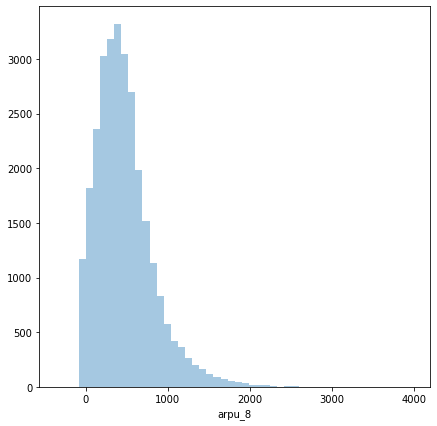

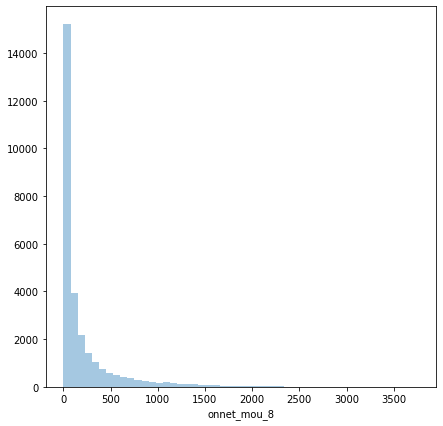

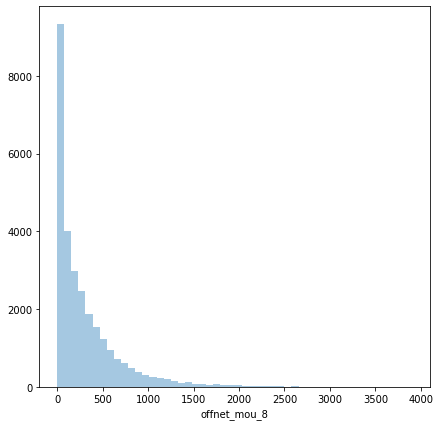

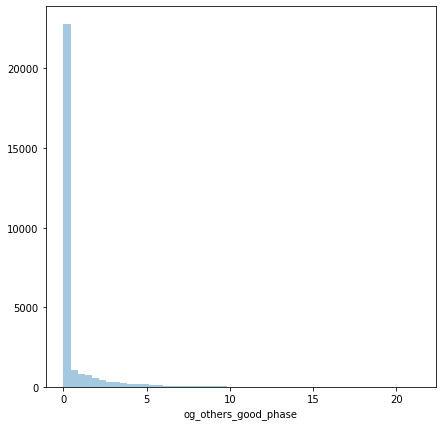

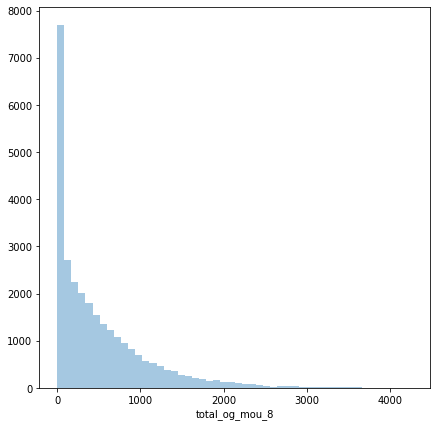

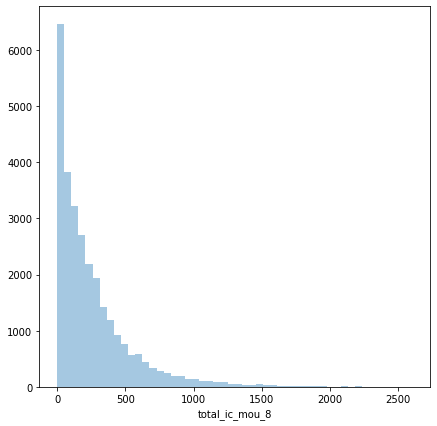

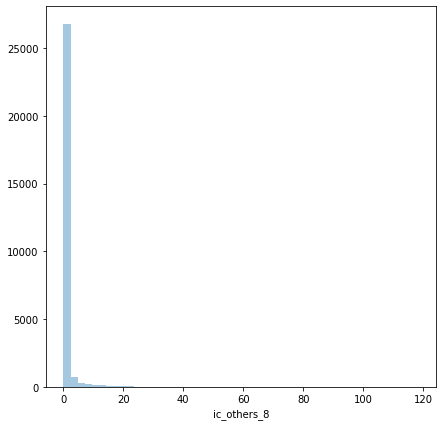

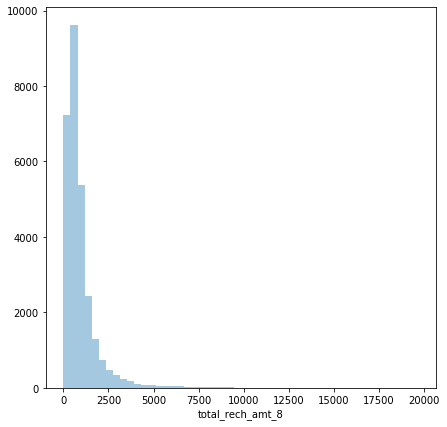

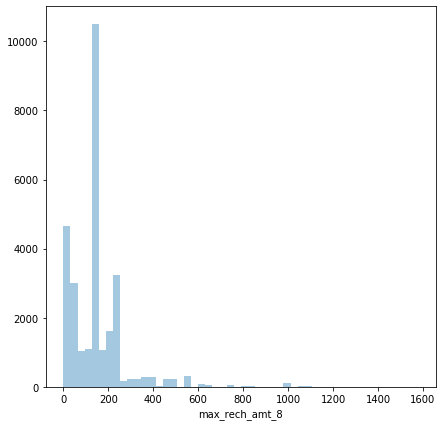

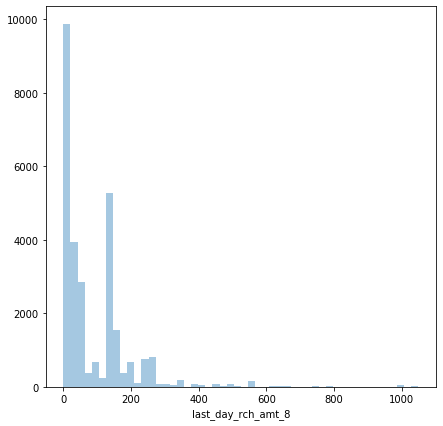

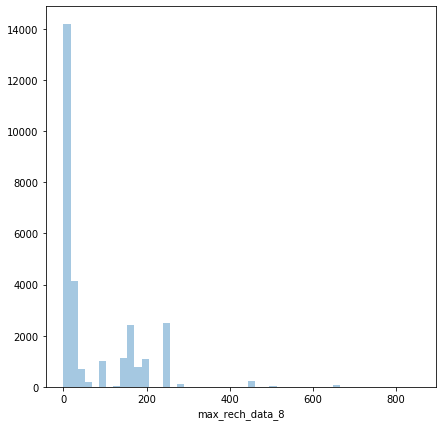

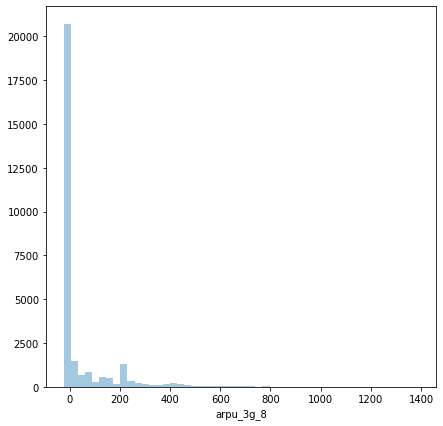

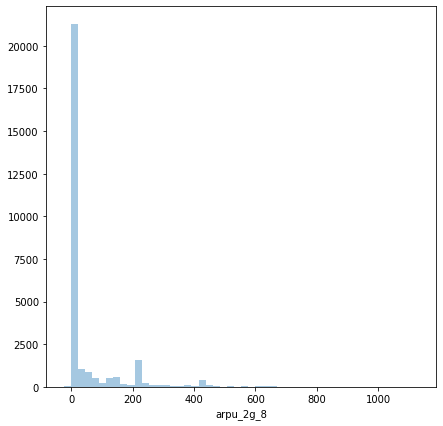

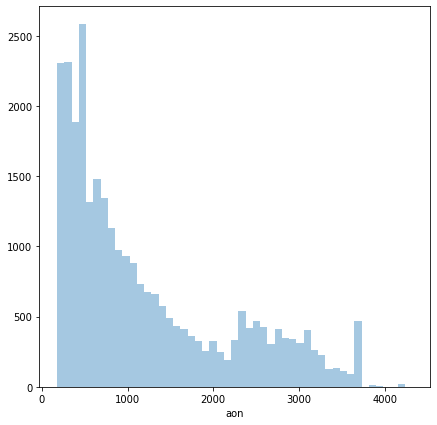

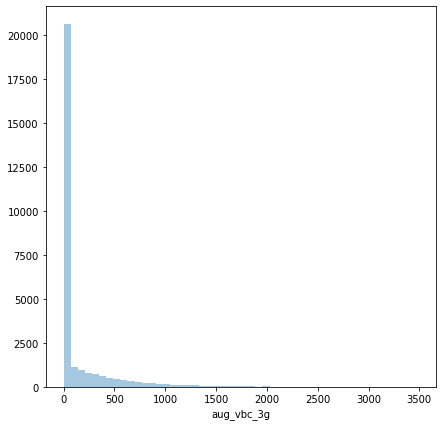

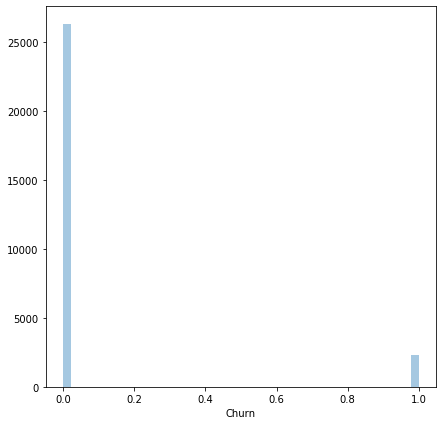

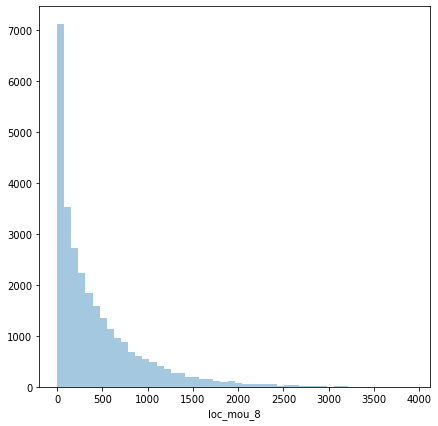

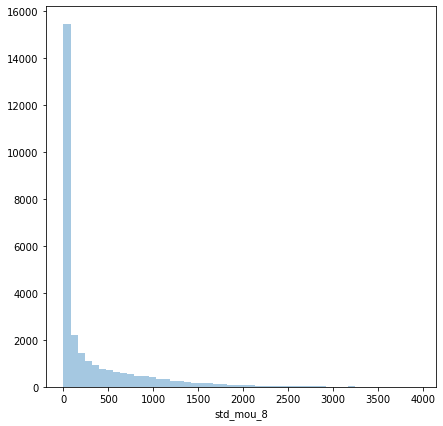

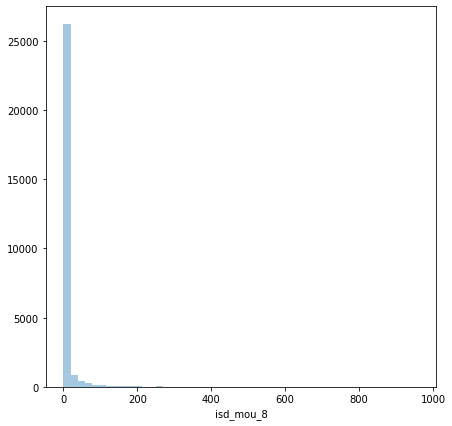

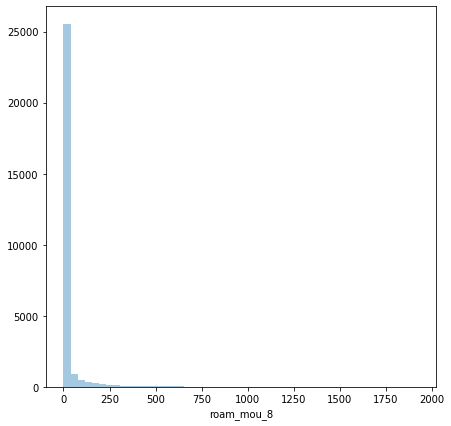

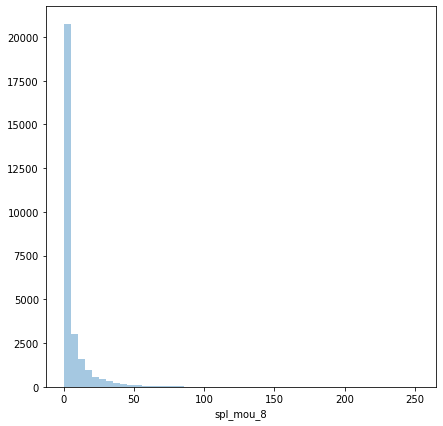

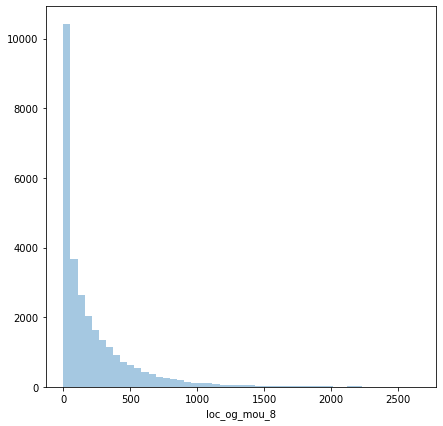

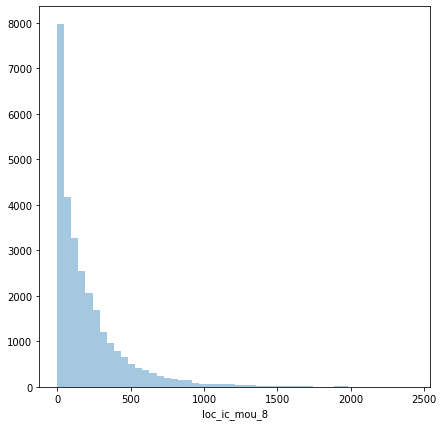

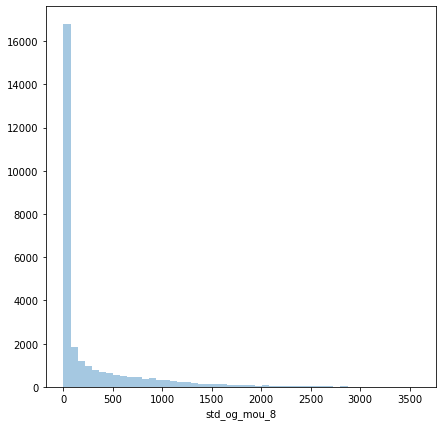

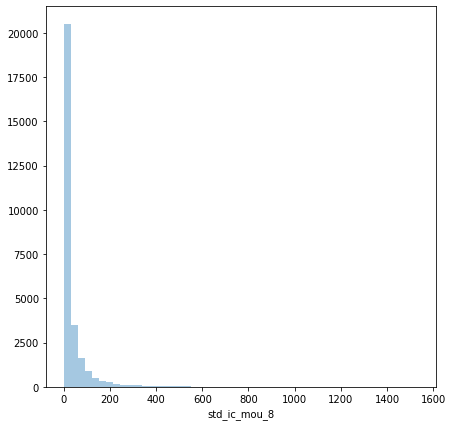

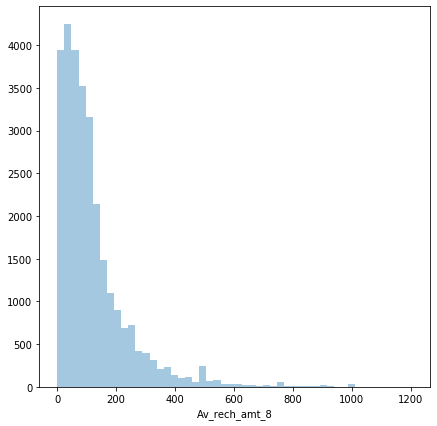

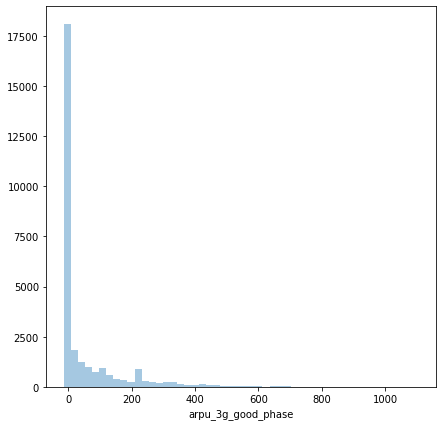

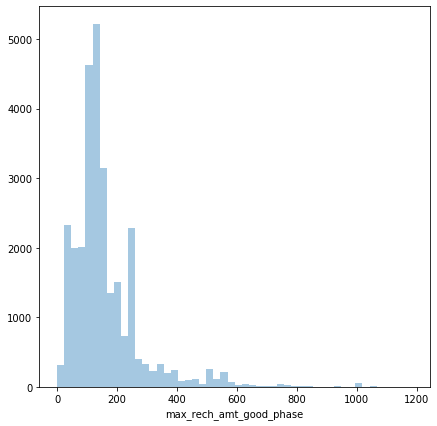

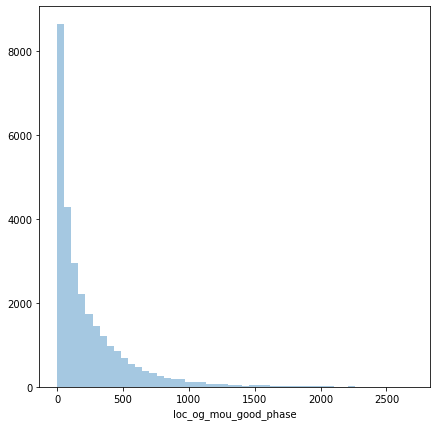

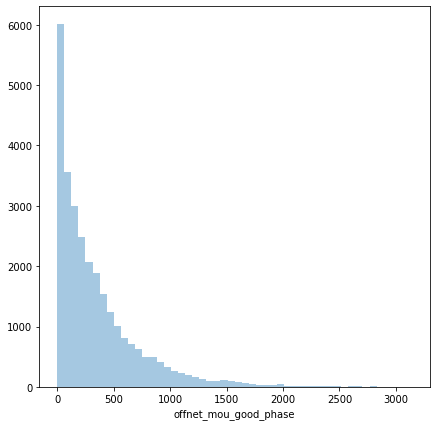

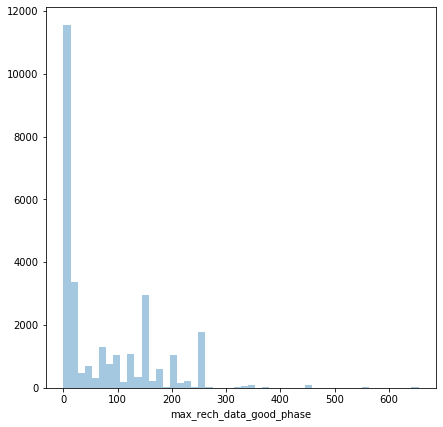

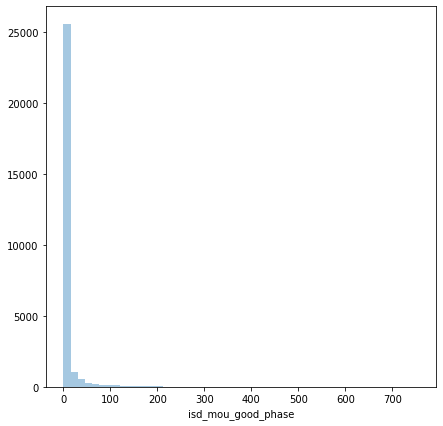

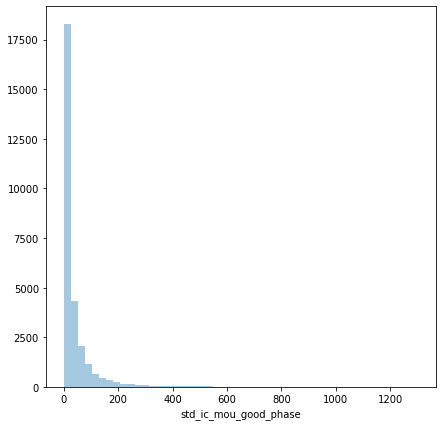

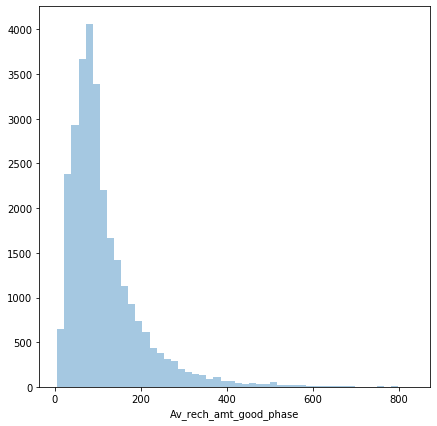

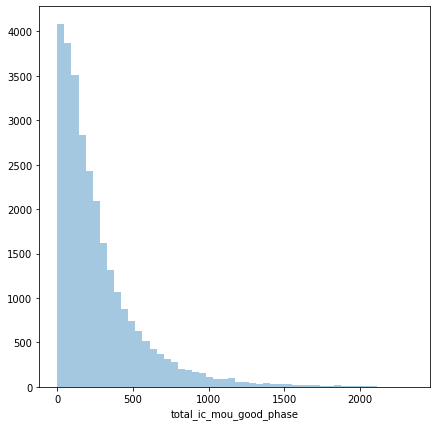

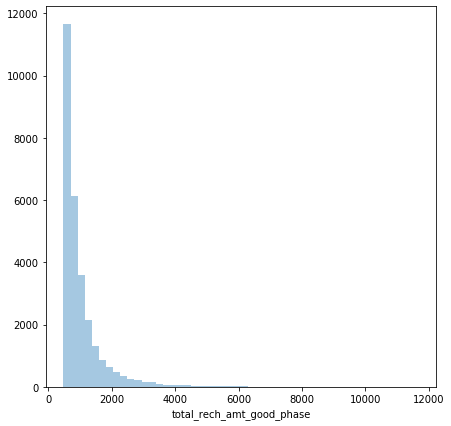

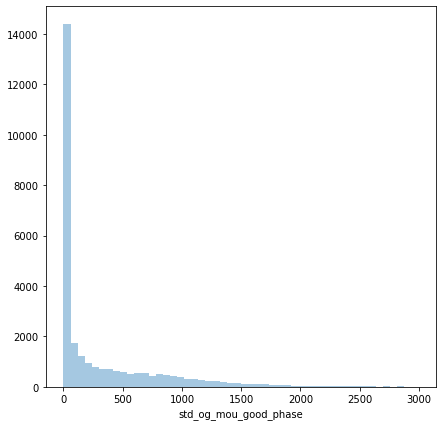

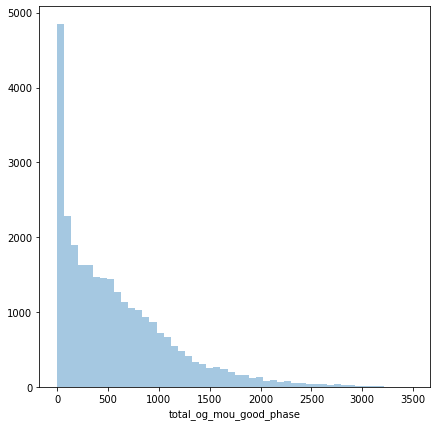

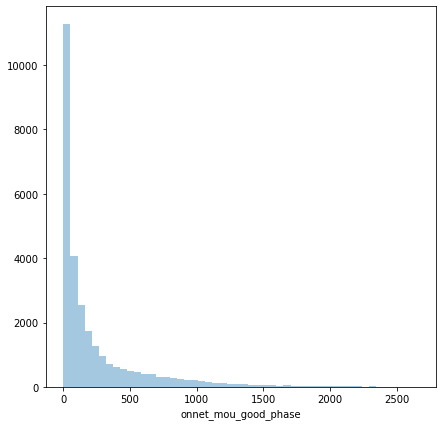

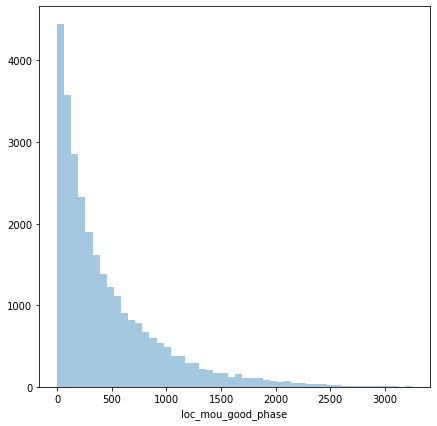

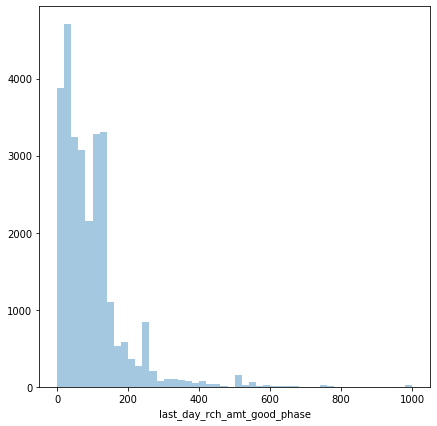

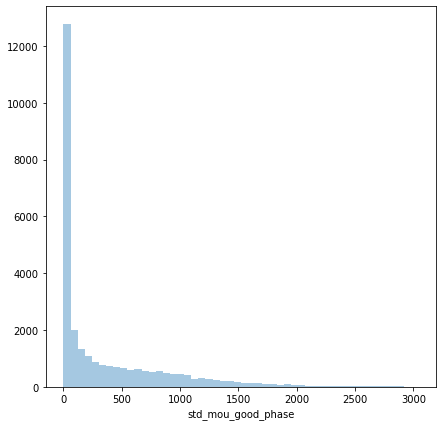

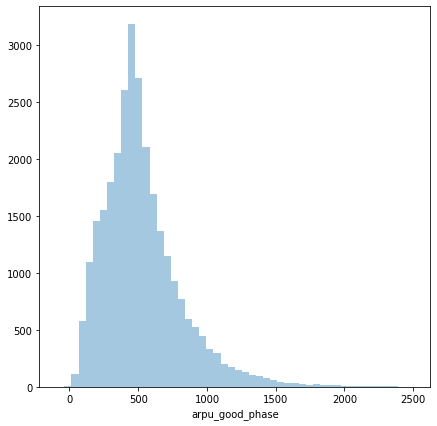

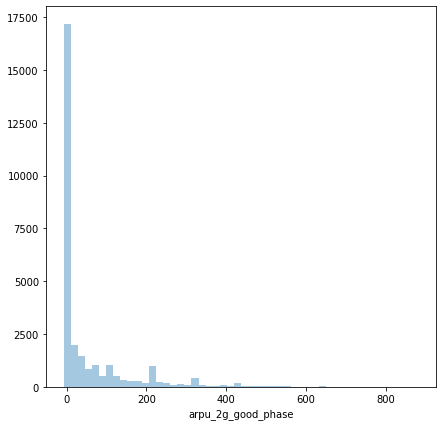

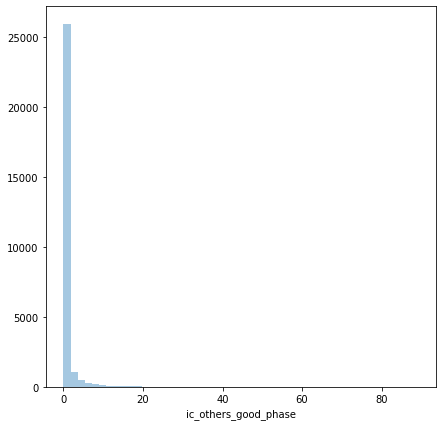

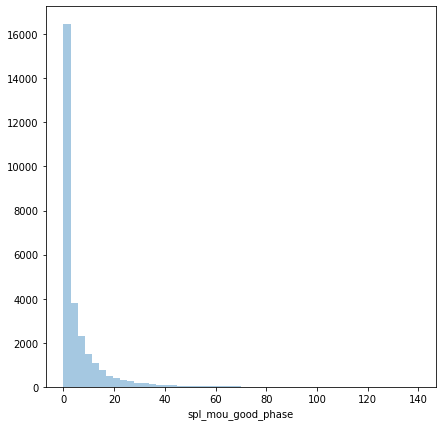

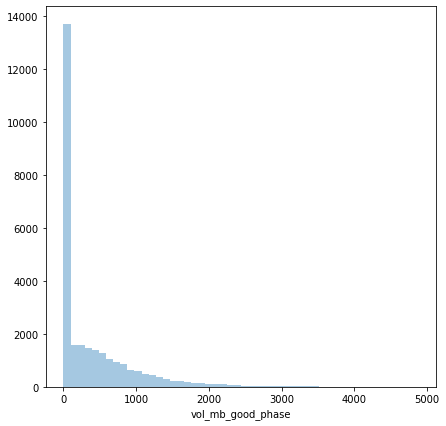

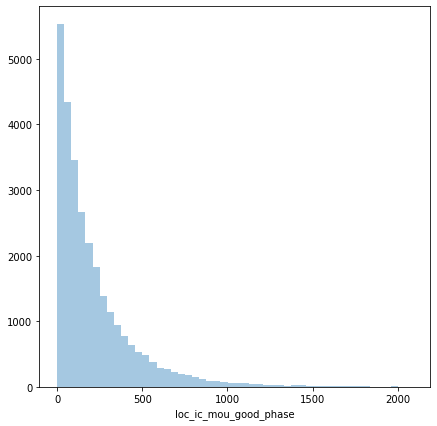

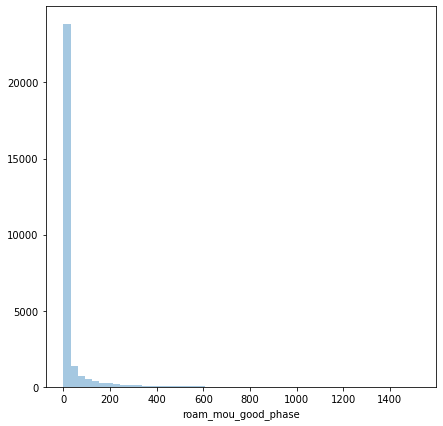

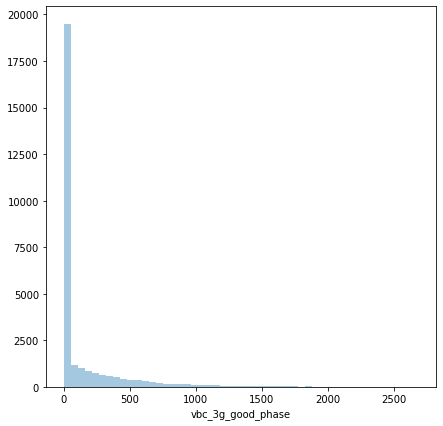

In [185]:
for i in churn.columns:
    if i not in cols:
        figure = plt.figure(figsize=(7,7))
        sns.distplot(churn[i],kde=False)
        plt.show()

Thus, the outliers have been successfully identified and treated, by observing the last percentile at which the values show a sharp spike

<a id='TTSplit'></a>

## Train - Test Split
After performing the EDA with the necessary data pre-processing, outlier treatment and bivariate analysis, let us split the data into train and test data to perform the further steps like scaling, SMOTE and PCA

In [186]:
X = churn.drop('Churn',axis=1)
y = churn[['Churn']]

In [187]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a id='SMOTE'></a>

## Treating Class Imbalance : SMOTE Analysis

In [188]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train['Churn'] == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train['Churn']  == 0))) 
  
# import SMOTE module from imblearn library 

from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 2) 
X_train_res, y_train_res = smote.fit_sample(X_train, y_train['Churn'].ravel()) 

  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 1598
Before OverSampling, counts of label '0': 18415 

After OverSampling, counts of label '1': 18415
After OverSampling, counts of label '0': 18415


In [189]:
# since the datasets formed after oversampling are not in the required format, we create dataframe
X_train = pd.DataFrame(X_train_res,columns=X_train.columns)
y_train = pd.DataFrame(y_train_res,columns=['Churn'])

<a id='Scaling'></a>

## Standardizing the data


In [190]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [191]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

Let us now observe the summary statistics and the correlation plot to check for multicollinearity and whether the standardization has been performed accurately

In [192]:
X_train.describe()

arpu_8   onnet_mou_8  offnet_mou_8  og_others_good_phase  \
count  3.683000e+04  3.683000e+04  3.683000e+04          3.683000e+04   
mean  -1.077912e-14  1.021146e-15 -3.764292e-15          4.459943e-15   
std    1.000014e+00  1.000014e+00  1.000014e+00          1.000014e+00   
min   -1.923055e+00 -4.806884e-01 -6.271765e-01         -4.011287e-01   
25%   -8.464669e-01 -4.791426e-01 -6.152394e-01         -4.011287e-01   
50%   -2.257852e-01 -3.966355e-01 -4.115941e-01         -4.011287e-01   
75%    5.067482e-01 -3.012868e-02  2.059031e-01         -1.071815e-01   
max    9.732196e+00  1.115499e+01  1.044088e+01          1.262517e+01   

       total_og_mou_8  total_ic_mou_8   ic_others_8  total_rech_amt_8  \
count    3.683000e+04    3.683000e+04  3.683000e+04      3.683000e+04   
mean     3.649408e-14   -3.338725e-14 -1.544727e-14      3.271815e-15   
std      1.000014e+00    1.000014e+00  1.000014e+00      1.000014e+00   
min     -6.733659e-01   -6.572573e-01 -1.538542e-01     -6.646113e-01   
25%     -6.733659e-01   -6.549518e-01 -1.538542e-01     -6.366065e-01   
50%     -4.585575e-01   -3.883084e-01 -1.538542e-01     -2.190837e-01   
75%      3.113426e-01    2.389908e-01 -1.538542e-01      1.947994e-01   
max      7.423664e+00    9.238929e+00  3.103955e+01      2.020729e+01   

       max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8     arpu_3g_8  \
count    3.683000e+04        3.683000e+04     3.683000e+04  3.683000e+04   
mean     2.710943e-14        1.313246e-14    -7.171961e-14 -5.752290e-14   
std      1.000014e+00        1.000014e+00     1.000014e+00  1.000014e+00   
min     -8.443198e-01       -5.801802e-01    -5.215727e-01 -5.531114e-01   
25%     -7.471730e-01       -5.801802e-01    -5.215727e-01 -3.234210e-01   
50%     -1.119825e-01       -4.157359e-01    -5.215727e-01 -3.234210e-01   
75%      2.915503e-01        3.871392e-01    -2.292458e-01 -3.234210e-01   
max      1.096275e+01        9.576673e+00     9.476009e+00  1.250388e+01   

          arpu_2g_8     fb_user_8           aon    aug_vbc_3g   rech_data_8  \
count  3.683000e+04  3.683000e+04  3.683000e+04  3.683000e+04  3.683000e+04   
mean  -2.753737e-14 -2.253392e-14  1.222683e-15  4.629493e-14  8.922168e-14   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -5.887648e-01 -6.958018e-01 -9.886429e-01 -3.414040e-01 -6.945866e-01   
25%   -3.351780e-01 -6.958018e-01 -7.245868e-01 -3.414040e-01 -6.945866e-01   
50%   -3.351780e-01 -6.958018e-01 -3.873723e-01 -3.414040e-01 -6.945866e-01   
75%   -3.298413e-01  1.498469e+00  3.693601e-01 -3.073723e-01  1.439705e+00   
max    1.141296e+01  1.498469e+00  3.744935e+00  1.200487e+01  1.439705e+00   

          loc_mou_8     std_mou_8     isd_mou_8    roam_mou_8     spl_mou_8  \
count  3.683000e+04  3.683000e+04  3.683000e+04  3.683000e+04  3.683000e+04   
mean  -1.199177e-14  1.559687e-14 -2.911617e-14  1.214765e-14  3.497026e-14   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -6.406998e-01 -5.053374e-01 -1.786101e-01 -2.894254e-01 -3.726446e-01   
25%   -6.375603e-01 -5.053374e-01 -1.786101e-01 -2.894254e-01 -3.726446e-01   
50%   -4.375818e-01 -4.762965e-01 -1.786101e-01 -2.894254e-01 -3.726446e-01   
75%    2.170575e-01  4.806458e-03 -1.786101e-01 -2.016248e-01 -6.146460e-02   
max    8.548291e+00  7.960343e+00  2.585617e+01  1.449092e+01  2.216348e+01   

       loc_og_mou_8  loc_ic_mou_8  std_og_mou_8  std_ic_mou_8  Av_rech_amt_8  \
count  3.683000e+04  3.683000e+04  3.683000e+04  3.683000e+04   3.683000e+04   
mean   3.064279e-14  2.079201e-14  1.471257e-14  6.076272e-15  -6.453603e-15   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   1.000014e+00   
min   -5.530141e-01 -6.065535e-01 -4.739818e-01 -3.443112e-01  -7.418245e-01   
25%   -5.530141e-01 -6.051679e-01 -4.739818e-01 -3.443112e-01  -6.728974e-01   
50%   -4.343942e-01 -4.038018e-01 -4.636006e-01 -3.118363e-01  -2.994959e-01   
75%    1.145900e-01  1.80634

All the values have been standardized with mean as 0 and standard deviation as 1

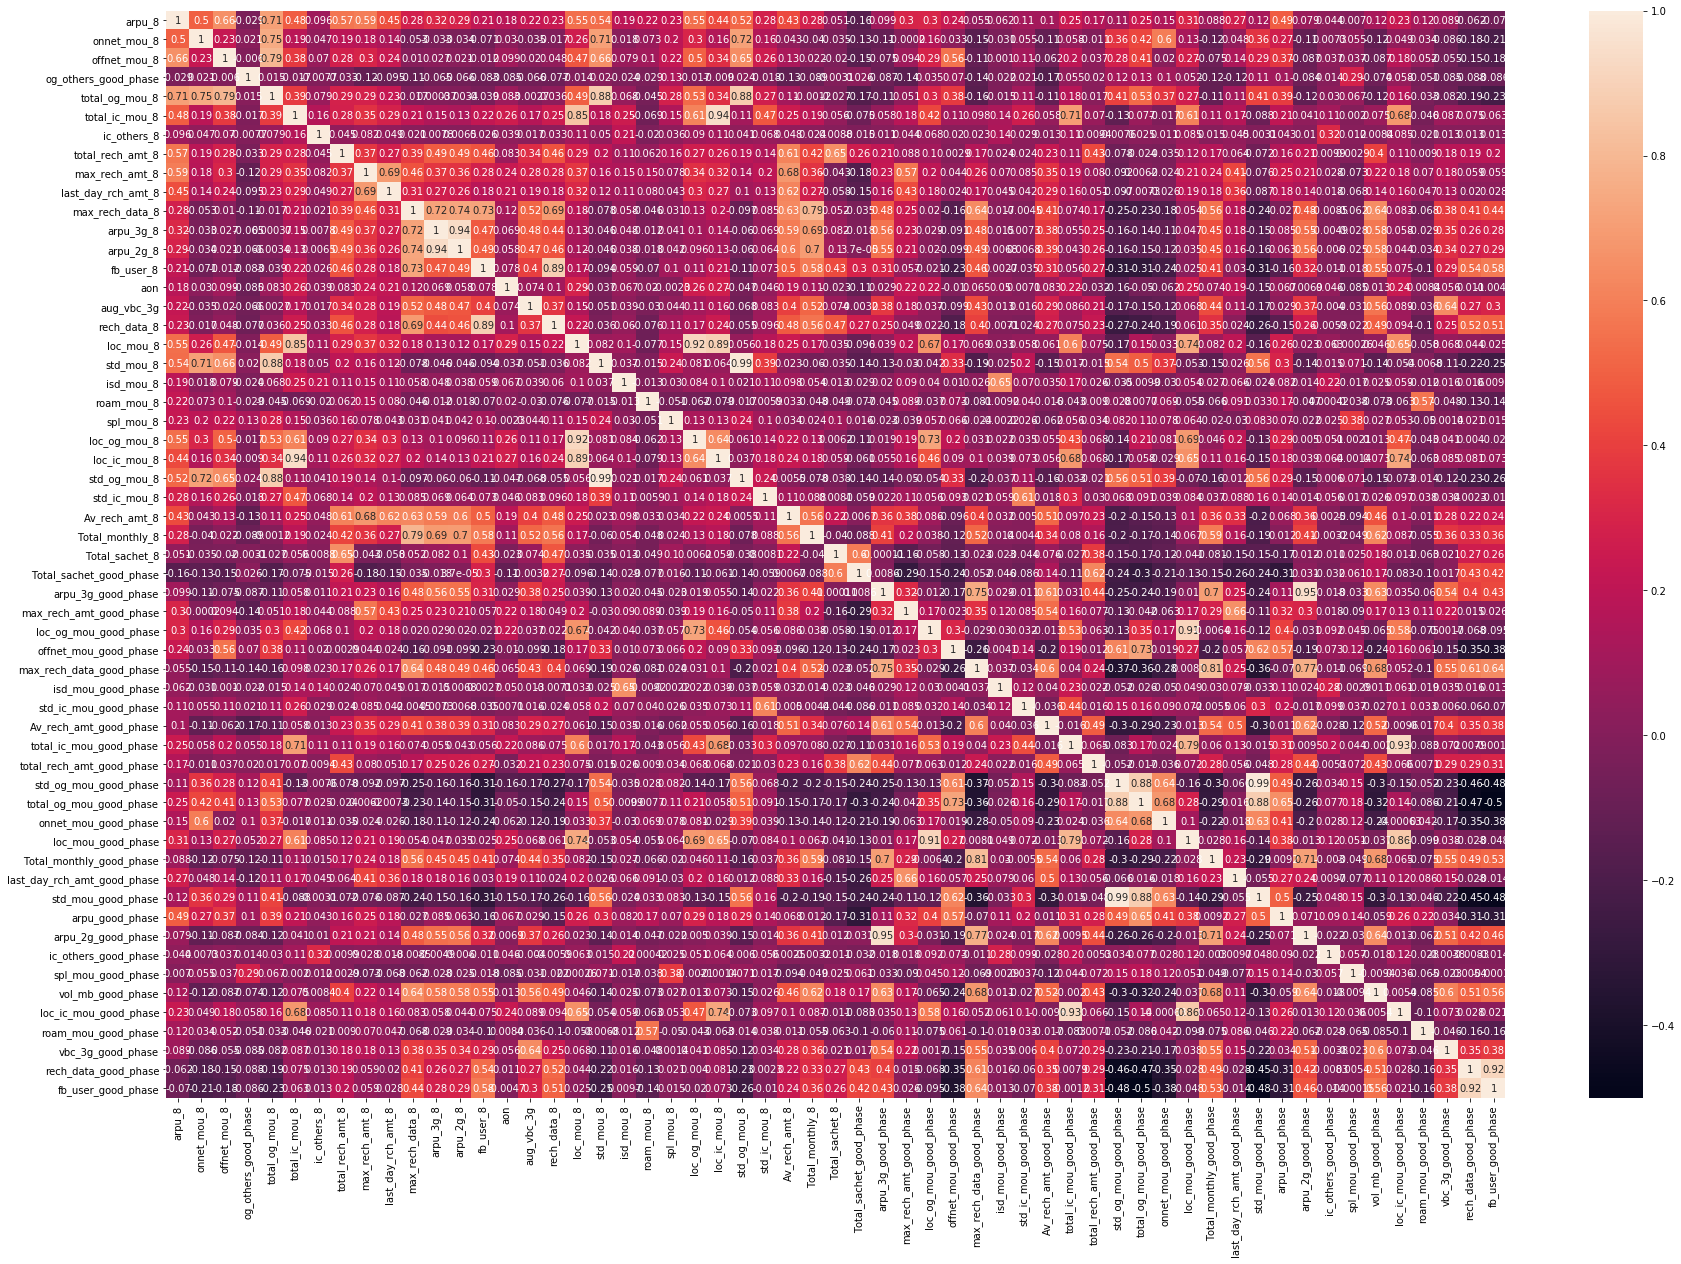

In [193]:
figure = plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

<a id='PCA'></a>

## Principal Component Analysis

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting our large data sets into smaller ones containing fewer variables, it will improve model performance and avoid multicollienarity. Let us perform PCA on the data set and analyse the explained variance to come up with the optimum number of components

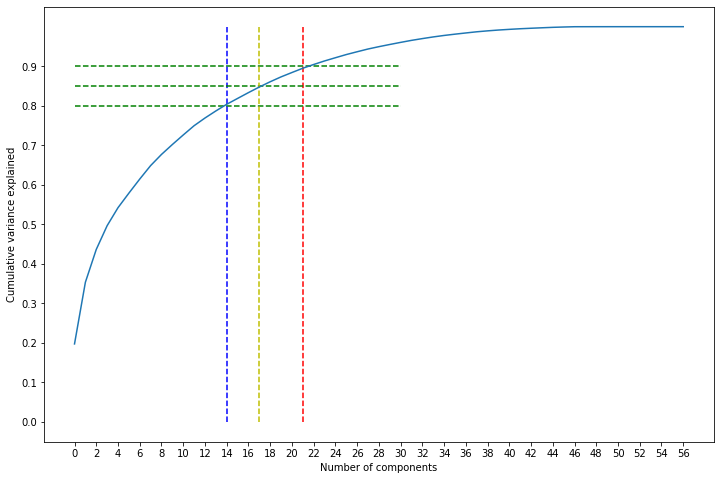

In [194]:
# declaring the PCA object
pca = PCA(random_state=42)

# fitting on the train set
pca.fit(X_train)

# obtaining the cumulative explained variance by all the components
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# plotting explained variance vs. number of components
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)

# explained variance at 21 components
plt.hlines(y=0.90, xmax=30, xmin=0, colors="g", linestyles="--")
plt.vlines(x=21, ymax=1, ymin=0, colors="r", linestyles="--")

# explained variance at 14 components
plt.hlines(y=0.8, xmax=30, xmin=0, colors="g", linestyles="--")
plt.vlines(x=14, ymax=1, ymin=0, colors="b", linestyles="--")

# explained variance at 17 components
plt.hlines(y=0.85, xmax=30, xmin=0, colors="g", linestyles="--")
plt.vlines(x=17, ymax=1, ymin=0, colors="y", linestyles="--")

plt.xlabel('Number of components')
plt.ylabel("Cumulative variance explained")
plt.xticks(np.arange(0, len(X_train.columns), 2))
plt.yticks(np.arange(0, 1, 0.1))
plt.show()

The number of components where the explained variance starts to slow down and additional components do not contribute further is at about 17 and the explained variance is 85%. Let us validate it further with scree plot which shows the eigen values vs. the number of components.

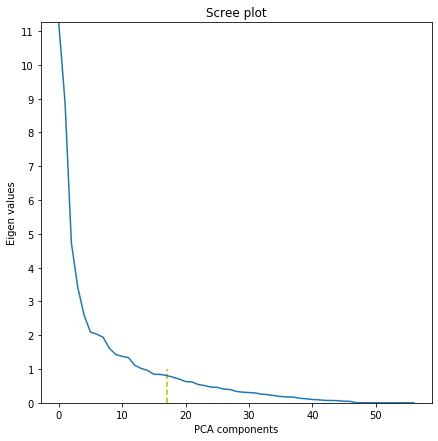

In [195]:
figure = plt.figure(figsize=(7,7))
plt.plot(pca.explained_variance_)
plt.yticks(np.arange(0, max(pca.explained_variance_), 1))
plt.ylim(0,max(pca.explained_variance_))
plt.vlines(x=17, ymax=1, ymin=0, colors="y", linestyles="--")
plt.ylabel("Eigen values")
plt.xlabel("PCA components")
plt.title("Scree plot")
plt.show()

Although the curve starts to become stable or the rate of decrease in the explained variance becomes less post 6 components, it can only explain about 65% of variance which is alot of information loss. We can go ahead with 17 components, since the rate of change in eigen value is negligible post this components

In [196]:
# initialising the pca object with 17 components
pca_final = IncrementalPCA(n_components=17)

# transforming the train set to obtain the values as a linear combination of the variables with 12 components (eigen vectors)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(36830, 17)

There 36.8k rows and 17 variables. Let us now observe the correlation matrix to validate if the PCA components are correlated at all

In [197]:
corrmat = np.corrcoef(X_train_pca.transpose())

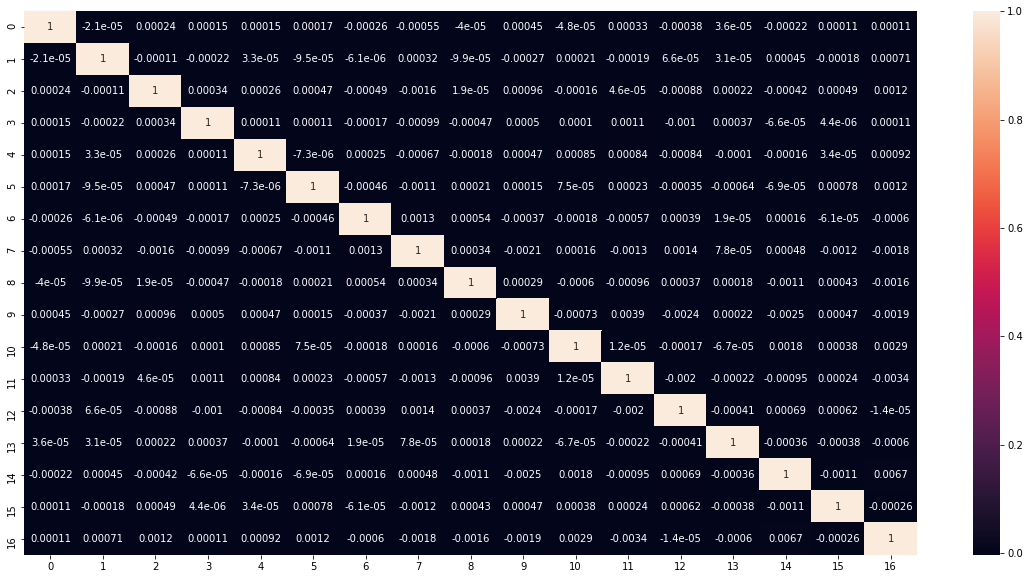

In [198]:
plt.figure(figsize=[20,10])
sns.heatmap(corrmat, annot=True)
plt.show()

We can see that the components have near to zero correlation and hence PCA is successfully creating components that are not related to each other

In [199]:
# transforming the test set with the pca model
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8578, 17)

<a id='Models'></a>

## Building Classification Models

For building the churn model, we'll be building all the classification models starting from the most simple one being logistic regression and then increase the complexity of the model by building decision trees, random forest and Ada Boost models. <br>

After creating each model, we'll be choosing the champion model using the _Sensitivity_ score and _AUROC_ metric. We're choosing _Sensitivity_ as the preferred metric since it's imperative for us to avoid False Negatives as much as possible <br>

Post choosing the champion model, the threshold probability to classify as _churn_/ _non churn_ will be done on the basis of precision-recall curve <br>

To build each classification model and choosing the optimum threshold the following steps are being taken: <br>
* Fit and train the classification model
* Predict the churn probabilities on the train set based on the model
* Predict the churn status based on various thresholds of classifying churn
* Plot _AUROC curve_ and obtain the AUROC score. This will help us understand if the model is performing well. A score of 100% means it has perfect sensitivity and perfect specificity
* Plot the _precision-recall trade-off curve_ and the _sensitivity-specificity-accuracy trade-off_ curve
* The above two plots will help us arrive at the optimum threshold for classification
* Build the classification report and confusion matrix based on this threshold
* Do this for all the classification models & compare based on the classification report and AUROC score. Choose the champion model which is the most generalisable based on the performance on training and test data & with the highest AUROC score and highest sensitivity

<a id='LR'></a>

### Logistic Regression
Let us start with logistic regression and observe the confusion matrix and sensitivity score to derive insights

In [200]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca,y_train)

LogisticRegression(random_state=42)

The model has been fit and built. Let us predict on the train set and check the performance using the accuracy metrics. <br>
Predicting the probabilties of the customer being churned and based on that we'll be choosing the optimum threshold

In [201]:
y_train_pred = pd.DataFrame(logreg.predict_proba(X_train_pca)[:,1],columns=['Churn_prob'])

In [202]:
y_train_pred

Churn_prob
0        0.407507
1        0.112313
2        0.248630
3        0.223897
4        0.365607
...           ...
36825    0.932601
36826    0.816766
36827    0.336798
36828    0.761091
36829    0.936258

[36830 rows x 1 columns]

Create a dataframe containing the churn status at various thresholds

In [203]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_prob.map(lambda x: 1 if x >= i else 0)
y_train_pred = pd.concat([y_train_pred,y_train],axis=1)
y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn
0    0.407507    1    1    1    1    1    0    0    0    0    0      0
1    0.112313    1    1    0    0    0    0    0    0    0    0      0
2    0.248630    1    1    1    0    0    0    0    0    0    0      0
3    0.223897    1    1    1    0    0    0    0    0    0    0      0
4    0.365607    1    1    1    1    0    0    0    0    0    0      0

#### AUROC Curve
Plot the AUROC curve and check the score to check the performance of model

In [204]:
def draw_roc( actual, probs, model ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('AUROC curve for ' + model)
    plt.legend(loc="lower right")
    plt.show()

    return None

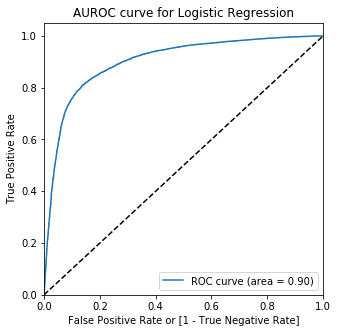

In [205]:
draw_roc(y_train_pred.Churn, y_train_pred.Churn_prob, 'Logistic Regression')

The AUROC score is 0.9 or 90% which means the model is performing really well with the given input and could be a potential champion model. Let us observe the trade-off plots to arrive at the optimum threshold for classification

#### Sensitivity-Specificity-Accuracy Trade-off

In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.679853  0.973880  0.385827
0.2   0.2  0.755444  0.948575  0.562313
0.3   0.3  0.798887  0.916916  0.680858
0.4   0.4  0.819495  0.875916  0.763074
0.5   0.5  0.832148  0.839207  0.825088
0.6   0.6  0.834075  0.793538  0.874613
0.7   0.7  0.823513  0.733370  0.913657
0.8   0.8  0.769807  0.591637  0.947977
0.9   0.9  0.652213  0.325876  0.978550


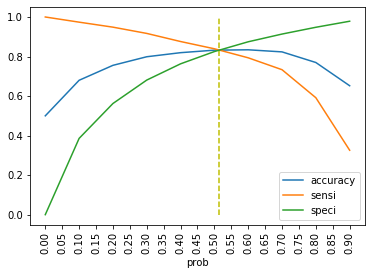

In [207]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05), rotation=90)
plt.vlines(x=0.515, ymax=1, ymin=0, colors="y", linestyles="--")
plt.show()

The optimum threshold where the trade-off seems to happen is at about 0.515. At this threshold all of the metrics are at about 80% , which is a good score for the model. Our aim is to keep sensitivity as high as possible to identify the potential churn customers, while keeping the specificity high as well. Let us also check the precision-recall trade-off curve and see what is the optimum threshold

#### Precision-Recall Trade-off

In [208]:
p, r, thresholds = precision_recall_curve(y_train_pred.Churn, y_train_pred.Churn_prob)

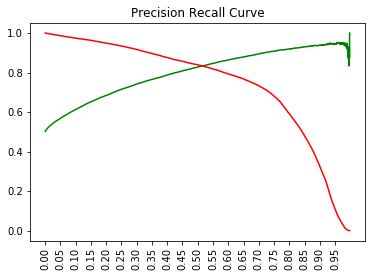

In [209]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,0.05), rotation=90)

plt.title("Precision Recall Curve")
plt.show()

In the above plot as well, the precision recall shows the optimum threshold at 0.515. Thus let us prepare the classification report and confusion matrix based on this threshold


In [210]:
y_train_pred['final_predicted'] = y_train_pred.Churn_prob.map( lambda x: 1 if x >= 0.515 else 0)

y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn  \
0    0.407507    1    1    1    1    1    0    0    0    0    0      0   
1    0.112313    1    1    0    0    0    0    0    0    0    0      0   
2    0.248630    1    1    1    0    0    0    0    0    0    0      0   
3    0.223897    1    1    1    0    0    0    0    0    0    0      0   
4    0.365607    1    1    1    1    0    0    0    0    0    0      0   

   final_predicted  
0                0  
1                0  
2                0  
3                0  
4                0

#### Confusion Matrix

In [211]:
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.final_predicted )
confusion

array([[15343,  3072],
       [ 3079, 15336]], dtype=int64)

#### Final accuracy report on the Train Data

In [212]:
print("The final metrics for the above model are: \n", classification_report(y_train_pred.Churn, y_train_pred.final_predicted ))

The final metrics for the above model are: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     18415
           1       0.83      0.83      0.83     18415

    accuracy                           0.83     36830
   macro avg       0.83      0.83      0.83     36830
weighted avg       0.83      0.83      0.83     36830



Thus, for the logistic regression model we have validated and chosen the optimum probability top get the maximum performance out of the model. The various relevant scores are:
* AUROC : 90%
* Sensitivity/ Recall : 83%
* Overall accuracy : 83%

<a id='DT'></a>

### Decision Tree
We'll use GridSearchCV to find multiple optimal hyperparameters together and then choose the best combination of hyper-parameters for fitting the Decision Tree model

In [213]:
# Decision Tree Classifier
# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring="roc_auc")

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [214]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.908843      0.048206         0.011193        0.004650   
1        0.872829      0.057759         0.009370        0.002061   
2        0.846650      0.072884         0.009670        0.002428   
3        0.851208      0.073655         0.007619        0.000960   
4        1.374534      0.038756         0.009388        0.002403   
5        1.408421      0.060282         0.008587        0.001005   
6        1.299443      0.068794         0.010369        0.002795   
7        1.274992      0.061090         0.008379        0.000490   
8        0.550443      0.016118         0.007764        0.000759   
9        0.554410      0.035752         0.008177        0.002392   
10       0.541252      0.009209         0.008025        0.000087   
11       0.534890      0.040784         0.007821        0.000705   
12       0.903037      0.052195         0.008792        0.000408   
13       0.873797      0.023237         0.008586        0.000802   
14       0.847217      0.058312         0.009195        0.002089   
15       0.831741      0.059668         0.008275        0.000595   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.880086           0.882474           0.885845   
1            0.880086           0.882474           0.885845   
2            0.879864           0.882831           0.886008   
3            0.879864           0.882831           0.886008   
4            0.911499           0.917710           0.918689   
5            0.911499           0.917710           0.

The hyper-parameter tuning was performed with the auroc score being the performance metric and based on this let us check the optimum model

In [215]:
# printing the optimal accuracy score and hyperparameters
print("best auroc score", grid_search.best_score_)
print("Coressponding to the model: ", grid_search.best_estimator_)

best auroc score 0.9170662676640454
Coressponding to the model:  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)


The best model has an accuracy of 91.71% with the hyper-parameters mentioned as 
above. Let us now fit the model with the model returned above and obtain all of the performance metrics to view how the Decision Tree Model performs

In [216]:
# model with optimal hyperparameters
DT = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)
DT.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

Predict the probabilties of the churn status in the training set

In [217]:
y_train_pred = pd.DataFrame(DT.predict_proba(X_train_pca)[:,1],columns=['Churn_prob'])

Create a dataframe containing the churn status at various thresholds

In [218]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_prob.map(lambda x: 1 if x >= i else 0)
y_train_pred = pd.concat([y_train_pred,y_train],axis=1)
y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn
0    0.235294    1    1    1    0    0    0    0    0    0    0      0
1    0.028169    1    0    0    0    0    0    0    0    0    0      0
2    0.020833    1    0    0    0    0    0    0    0    0    0      0
3    0.003195    1    0    0    0    0    0    0    0    0    0      0
4    0.154229    1    1    0    0    0    0    0    0    0    0      0

#### AUROC Curve
Plot the AUROC curve and check the score to check the performance of model

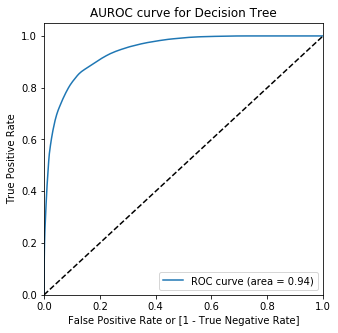

In [220]:
draw_roc(y_train_pred.Churn, y_train_pred.Churn_prob, 'Decision Tree')

The AUROC score is 0.94 or 94% which means the model is performing really well with the given input and could be a potential champion model. Let us observe the trade-off plots to arrive at the optimum threshold for classification

#### Sensitivity-Specificity-Accuracy Trade-off

In [221]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.766630  0.988053  0.545208
0.2   0.2  0.811865  0.968613  0.655118
0.3   0.3  0.842655  0.939180  0.746131
0.4   0.4  0.853923  0.911974  0.795873
0.5   0.5  0.864323  0.855607  0.873038
0.6   0.6  0.860413  0.820907  0.899919
0.7   0.7  0.845778  0.760521  0.931034
0.8   0.8  0.821151  0.684279  0.958023
0.9   0.9  0.763128  0.545153  0.981102


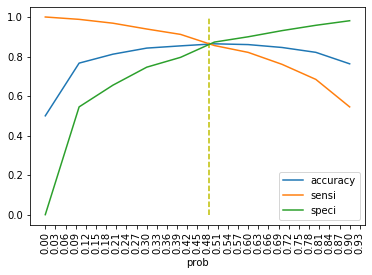

In [225]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.03), rotation=90)
plt.vlines(x=0.485, ymax=1, ymin=0, colors="y", linestyles="--")
plt.show()

The optimum threshold where the trade-off seems to happen is at about 0.485. At this threshold all of the metrics are at about 82% , which is a good score for the model. Our aim is to keep sensitivity as high as possible to identify the potential churn customers, while keeping the specificity high as well. Let us also check the precision-recall trade-off curve and see what is the optimum threshold

#### Precision-Recall Trade-off

In [226]:
p, r, thresholds = precision_recall_curve(y_train_pred.Churn, y_train_pred.Churn_prob)

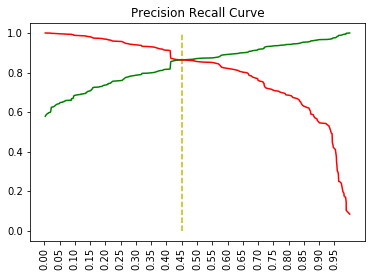

In [230]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,0.05), rotation=90)
plt.vlines(x=0.45, ymax=1, ymin=0, colors="y", linestyles="--")
plt.title("Precision Recall Curve")
plt.show()

In the above plot as well, the precision recall shows the optimum threshold at 0.45. Thus let us prepare the classification report and confusion matrix based on this threshold


In [231]:
y_train_pred['final_predicted'] = y_train_pred.Churn_prob.map( lambda x: 1 if x >= 0.485 else 0)

y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn  \
0    0.235294    1    1    1    0    0    0    0    0    0    0      0   
1    0.028169    1    0    0    0    0    0    0    0    0    0      0   
2    0.020833    1    0    0    0    0    0    0    0    0    0      0   
3    0.003195    1    0    0    0    0    0    0    0    0    0      0   
4    0.154229    1    1    0    0    0    0    0    0    0    0      0   

   final_predicted  
0                0  
1                0  
2                0  
3                0  
4                0

#### Confusion Matrix

In [232]:
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.final_predicted )
confusion

array([[15997,  2418],
       [ 2582, 15833]], dtype=int64)

#### Final accuracy report on the Train Data

In [233]:
print("The final metrics for the above model are: \n", classification_report(y_train_pred.Churn, y_train_pred.final_predicted ))

The final metrics for the above model are: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     18415
           1       0.87      0.86      0.86     18415

    accuracy                           0.86     36830
   macro avg       0.86      0.86      0.86     36830
weighted avg       0.86      0.86      0.86     36830



Thus, for the Decision Tree model we have validated and chosen the optimum probability top get the maximum performance out of the model on the train set. The various relevant scores are:
* AUROC : 94%
* Sensitivity/ Recall : 86%
* Overall accuracy : 86%

<a id='RF'></a>

### Random Forest

In [234]:
#  Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': [100,200],
    'min_samples_split': [50,100],
    'n_estimators': [50,100], 
    'max_features': [5,10]
}

# Create a based model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1, scoring="roc_auc")


In [235]:
# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  5.6min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': [100, 200],
                         'min_samples_split': [50, 100],
                         'n_estimators': [50, 100]},
             scoring='roc_auc', verbose=1)

In [236]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        9.880410      0.174567         0.114239        0.001769   
1       19.160851      0.066706         0.235101        0.021410   
2        9.551288      0.074496         0.131603        0.009226   
3       18.888042      0.209099         0.209545        0.000682   
4        8.855129      0.127672         0.109338        0.003795   
5       17.423357      0.112635         0.205521        0.002539   
6        8.838009      0.181168         0.130152        0.011832   
7       17.595010      0.554433         0.226573        0.024841   
8       18.636940      0.507335         0.113447        0.002230   
9       35.889804      0.787400         0.209690        0.003260   
10      18.261182      0.469911         0.125801        0.015235   
11      35.714945      0.340761         0.217115        0.007277   
12      16.245945      0.315471         0.107837        0.002275   
13      32.189200      0.243652         0.205454        0.008077   
14      16.390326      0.337925         0.105348        0.002378   
15      32.607932      0.422276         0.202963        0.002178   
16      10.220724      0.233232         0.121060        0.005164   
17      20.401272      0.478328         0.227421        0.008404   
18      10.709729      0.295003         0.125097        0.012152   
19      20.092779      0.085869         0.250551        0.009770   
20       9.171307      0.078256         0.124156        0.002153   
21      18.129106      0.220624         0.207196        0.005916   
22       9.240868      0.111722         0.110204        0.002054   
23      18.272330      0.257200         0.220544        0.016461   
24      19.155824      0.302216         0.129237        0.010230   
25      37.610923      0.558763         0.231132        0.013181   
26      19.122572      0.224732         0.119213        0.003820   
27      38.043564      0.416887         0.224899        0.002175   
28      16.950605      0.156247         0.109197        0.002047   
29      33.716743      0.427630         0.201766        0.010492   
30      16.927942      0.039827         0.115201        0.005488   
31      30.972215      0.278539         0.181498        0.010375   

   param_max_depth param_max_features param_min_samples_leaf  \
0                8                  5                    100   
1                8                  5                    100   
2                8                  5                    100   
3                8                  5                    100   
4                8                  5                    200   
5                8                  5                    200   
6                8                  5                    200   
7                8                  5                    200   
8                8                 10                    100   
9                8                 10                    100   
10               8                 10                    100   
11               8                 10                    100   
12               8                 10                    200   
13               8                 10                    200   
14               8                 10                    200   
15               8                 10                    200   
16              10                  5                    100   
17              10                  5                    100   
18              10                  5                    100   
19              10                  5                    100   
20              10                  5                    200   
21              10                  5                    200   
22              10                  5                    200   
23              10                  5                    200   
24              10                 10                    100   
25              10                 10                    100   
26              10             

The hyper-parameter tuning was performed with the auroc score being the metric for comparison. Let us now see what's the optimum model and the auroc score associated with it

In [237]:
# printing the optimal accuracy score and hyperparameters
print('We can get auroc of',round((grid_search.best_score_)*100,2),'% using ',grid_search.best_params_)

We can get auroc of 92.9 % using  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 100}


The best model has an accuracy of 92.51% with the hyper-parameters mentioned as above. Let us now fit the model with the model returned above and obtain all of the performance metrics to view how the Random Forest Model performs

In [238]:
# optimum model
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, random_state=42)


In [247]:
# model with optimal hyperparameters
RF = RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, random_state=42, oob_score=True)
RF.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, oob_score=True, random_state=42)

The Out of Bag error of this model is:


In [248]:
print(str((round((1-RF.oob_score_)*100,2)))+"%")

14.14%


Predict the probabilties of the churn status in the training set

In [249]:
y_train_pred = pd.DataFrame(RF.predict_proba(X_train_pca)[:,1],columns=['Churn_prob'])

Create a dataframe containing the churn status at various thresholds

In [250]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_prob.map(lambda x: 1 if x >= i else 0)
y_train_pred = pd.concat([y_train_pred,y_train],axis=1)
y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn
0    0.289803    1    1    1    0    0    0    0    0    0    0      0
1    0.255854    1    1    1    0    0    0    0    0    0    0      0
2    0.285443    1    1    1    0    0    0    0    0    0    0      0
3    0.061732    1    0    0    0    0    0    0    0    0    0      0
4    0.149155    1    1    0    0    0    0    0    0    0    0      0

#### AUROC Curve
Plot the AUROC curve and check the score to check the performance of model

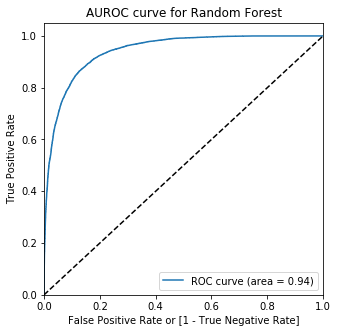

In [251]:
draw_roc(y_train_pred.Churn, y_train_pred.Churn_prob,'Random Forest')

The AUROC score is 0.94 or 94% which means the model is performing really well with the given input and could be a potential champion model. Let us observe the trade-off plots to arrive at the optimum threshold for classification

#### Sensitivity-Specificity-Accuracy Trade-off

In [252]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.674477  0.998371  0.350584
0.2   0.2  0.790198  0.981700  0.598697
0.3   0.3  0.843361  0.951290  0.735433
0.4   0.4  0.867092  0.904589  0.829595
0.5   0.5  0.867554  0.851588  0.883519
0.6   0.6  0.854657  0.793484  0.915829
0.7   0.7  0.832854  0.722455  0.943253
0.8   0.8  0.794678  0.622970  0.966386
0.9   0.9  0.704046  0.419929  0.988162


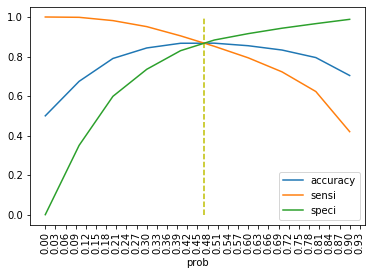

In [254]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.03), rotation=90)
plt.vlines(x=0.47, ymax=1, ymin=0, colors="y", linestyles="--")
plt.show()

The optimum threshold where the trade-off seems to happen is at about 0.47. At this threshold all of the metrics are at about 82% , which is a good score for the model. Our aim is to keep sensitivity as high as possible to identify the potential churn customers, while keeping the specificity high as well. Let us also check the precision-recall trade-off curve and see what is the optimum threshold

#### Precision-Recall Trade-off

In [255]:
p, r, thresholds = precision_recall_curve(y_train_pred.Churn, y_train_pred.Churn_prob)

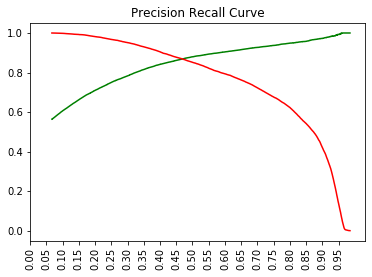

In [256]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,0.05), rotation=90)

plt.title("Precision Recall Curve")
plt.show()

In the above plot as well, the precision recall shows the optimum threshold at 0.455. Thus let us prepare the classification report and confusion matrix based on this threshold


In [258]:
y_train_pred['final_predicted'] = y_train_pred.Churn_prob.map( lambda x: 1 if x >= 0.47 else 0)

y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn  \
0    0.289803    1    1    1    0    0    0    0    0    0    0      0   
1    0.255854    1    1    1    0    0    0    0    0    0    0      0   
2    0.285443    1    1    1    0    0    0    0    0    0    0      0   
3    0.061732    1    0    0    0    0    0    0    0    0    0      0   
4    0.149155    1    1    0    0    0    0    0    0    0    0      0   

   final_predicted  
0                0  
1                0  
2                0  
3                0  
4                0

#### Confusion Matrix

In [259]:
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.final_predicted )
confusion

array([[15996,  2419],
       [ 2432, 15983]], dtype=int64)

#### Final accuracy report on the Train Data

In [260]:
print("The final metrics for the above model are: \n", classification_report(y_train_pred.Churn, y_train_pred.final_predicted ))

The final metrics for the above model are: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     18415
           1       0.87      0.87      0.87     18415

    accuracy                           0.87     36830
   macro avg       0.87      0.87      0.87     36830
weighted avg       0.87      0.87      0.87     36830



Thus, for the Random Forest model we have validated and chosen the optimum probability top get the maximum performance out of the model on the train set. The various relevant scores are:
* AUROC : 94%
* Sensitivity/ Recall : 87%
* Overall accuracy : 87%


<a id='AB'></a>

### Ada-boost

In [261]:
# parameters for grid search
parameters={'n_estimators':[100,200,400], 'learning_rate': [0.01,0.1,0.2,0.5]}

# run grid search
# adaboost with the decision tree as base estimator

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42),
                           param_grid=parameters,
                           scoring="roc_auc",verbose=1,
                           cv = 4, n_jobs = -1)

grid_search.fit(X_train_pca,y_train)  

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.2min finished


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200, 400]},
             scoring='roc_auc', verbose=1)

In [262]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       19.612374      0.585321         0.344811        0.008481   
1       41.971505      1.763661         1.119281        0.131948   
2       81.849352      1.714666         1.812188        0.221718   
3       21.472827      0.669315         0.367350        0.020204   
4       39.076658      0.769525         0.804481        0.116682   
5       77.634697      1.162787         1.649820        0.189346   
6       19.520562      0.505834         0.347172        0.002517   
7       40.056593      0.961733         0.716339        0.022682   
8       78.324925      0.796382         1.368630        0.048138   
9       20.288903      0.540763         0.418693        0.031904   
10      39.357301      0.420173         0.716468        0.019333   
11      67.211578      0.258166         1.033788        0.096077   

   param_learning_rate param_n_estimators  \
0                 0.01                100   
1                 0.01                200   
2                 0.01                400   
3                  0.1                100   
4                  0.1                200   
5                  0.1                400   
6                  0.2                100   
7                  0.2                200   
8                  0.2                400   
9                  0.5                100   
10                 0.5                200   
11                 0.5                400   

                                          params  split0_test_score  \
0   {'learning_rate': 0.01, 'n_estimators': 100}           0.831774   
1   {'learning_rate': 0.01, 'n_estimators': 200}           0.855543   
2   {'learning_rate': 0.01, 'n_estimators': 400}           0.872579   
3    {'learning_rate': 0.1, 'n_estimators': 100}           0.891780   
4    {'learning_rate': 0.1, 'n_estimators': 200}           0.899818   
5    {'learning_rate': 0.1, 'n_estimators': 400}           0.904240   
6    {'learning_rate': 0.2, 'n_estimators': 100}           0.899950   
7    {'learning_rate': 0.2, 'n_estimators': 200}           0.904295   
8    {'learning_rate': 0.2, 'n_estimators': 400}           0.906889   
9    {'learning_rate': 0.5, 'n_estimators': 100}           0.903199   
10   {'learning_rate': 0.5, 'n_estimators': 200}           0.905572   
11   {'learning_rate': 0.5, 'n_estimators': 400}           0.906694   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.844565           0.846520           0.829001         0.837965   
1            0.864933           0.866934           0.854871         0.860570   
2            0.881979           0.882289           0.872664         0.877378   
3            0.899754           0.902069           0.895400         0.897251   
4            0.907987           0.911594           0.904181         0.905895   
5            0.913158           0.917586           0.909979         0.911241   
6            0.907560           0.911180           0.904218         0.905727   
7            0.913027           0.917258           0.910268         0.911212   
8            0.916599           0.920952           0.914261         0.914675   
9            0.912170           0.916783           0.910041         0.910548   
10           0.916467           0.920661           0.914699         0.914350   
11           0.918952           0.921836           0.916514         0.915999   

    std_test_score  rank_test_score  
0         0.007672               12  
1         0.005415               11  
2         0.004757               10  
3         0.003964                9  
4         0.004379                7  
5         0.004862                4  
6         0.004146                8  
7         0.004706                5  
8         0.005096                2  
9         0.004893                6  
10        0.005511                3  
11        0.005693                1

The hyper-parameter tuning was performed with the auroc score being the metric for comparison. Let us now see what's the optimum model and the auroc score associated with it

In [263]:
# printing the optimal accuracy score and hyperparameters
print('We can get auroc score of',round((grid_search.best_score_)*100,2),'% using ',grid_search.best_params_)

We can get auroc score of 91.6 % using  {'learning_rate': 0.5, 'n_estimators': 400}


The best model has an accuracy of 91.6% with the hyper-parameters mentioned as above. Let us now fit the model with the model returned above and obtain all of the performance metrics to view how the Ada Boost Classifier performs

In [264]:
# optimum model
print(grid_search.best_estimator_)

AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state=42)


In [265]:
# model with optimal hyperparameters
AB= AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state=42)

AB.fit(X_train_pca, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state=42)

Predict the probabilties of the churn status in the training set

In [266]:
y_train_pred = pd.DataFrame(AB.predict_proba(X_train_pca)[:,1],columns=['Churn_prob'])

Create a dataframe containing the churn status at various thresholds

In [267]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_prob.map(lambda x: 1 if x >= i else 0)
y_train_pred = pd.concat([y_train_pred,y_train],axis=1)
y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn
0    0.499717    1    1    1    1    1    0    0    0    0    0      0
1    0.497618    1    1    1    1    1    0    0    0    0    0      0
2    0.499279    1    1    1    1    1    0    0    0    0    0      0
3    0.496726    1    1    1    1    1    0    0    0    0    0      0
4    0.499322    1    1    1    1    1    0    0    0    0    0      0

#### AUROC Curve
Plot the AUROC curve and check the score to check the performance of model

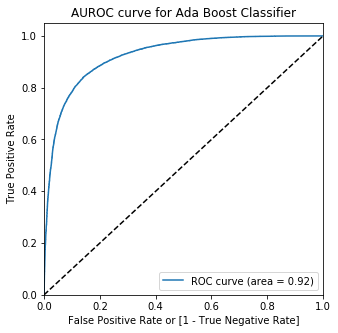

In [268]:
draw_roc(y_train_pred.Churn, y_train_pred.Churn_prob, 'Ada Boost Classifier')

The AUROC score is 0.92 or 92% which means the model is performing really well with the given input and could be a potential champion model. Let us observe the trade-off plots to arrive at the optimum threshold for classification

#### Sensitivity-Specificity-Accuracy Trade-off

In [269]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy    sensi     speci
0.0   0.0  0.500000  1.00000  0.000000
0.1   0.1  0.500000  1.00000  0.000000
0.2   0.2  0.500000  1.00000  0.000000
0.3   0.3  0.500000  1.00000  0.000000
0.4   0.4  0.500000  1.00000  0.000000
0.5   0.5  0.849145  0.85224  0.846049
0.6   0.6  0.500000  0.00000  1.000000
0.7   0.7  0.500000  0.00000  1.000000
0.8   0.8  0.500000  0.00000  1.000000
0.9   0.9  0.500000  0.00000  1.000000


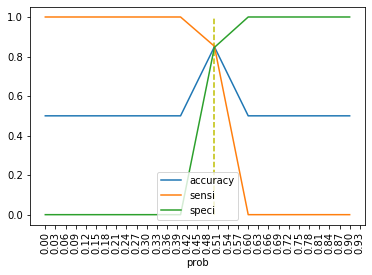

In [273]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.03), rotation=90)
plt.vlines(x=0.5, ymax=1, ymin=0, colors="y", linestyles="--")
plt.show()

The optimum threshold where the trade-off seems to happen is at about 0.5. At this threshold all of the metrics are at about 82% , which is a good score for the model. Our aim is to keep sensitivity as high as possible to identify the potential churn customers, while keeping the specificity high as well. Let us also check the precision-recall trade-off curve and see what is the optimum threshold

#### Precision-Recall Trade-off

In [274]:
p, r, thresholds = precision_recall_curve(y_train_pred.Churn, y_train_pred.Churn_prob)

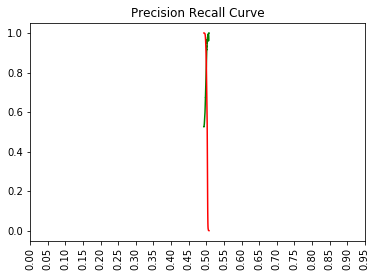

In [275]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,0.05), rotation=90)

plt.title("Precision Recall Curve")
plt.show()

In the above plot as well, the precision recall shows the optimum threshold at 0.5. Thus let us prepare the classification report and confusion matrix based on this threshold


In [276]:
y_train_pred['final_predicted'] = y_train_pred.Churn_prob.map( lambda x: 1 if x >= 0.5 else 0)

y_train_pred.head()

Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Churn  \
0    0.499717    1    1    1    1    1    0    0    0    0    0      0   
1    0.497618    1    1    1    1    1    0    0    0    0    0      0   
2    0.499279    1    1    1    1    1    0    0    0    0    0      0   
3    0.496726    1    1    1    1    1    0    0    0    0    0      0   
4    0.499322    1    1    1    1    1    0    0    0    0    0      0   

   final_predicted  
0                0  
1                0  
2                0  
3                0  
4                0

#### Confusion Matrix

In [277]:
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.final_predicted )
confusion

array([[15580,  2835],
       [ 2721, 15694]], dtype=int64)

#### Final accuracy report on the Train Data

In [278]:
print("The final metrics for the above model are: \n", classification_report(y_train_pred.Churn, y_train_pred.final_predicted ))

The final metrics for the above model are: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     18415
           1       0.85      0.85      0.85     18415

    accuracy                           0.85     36830
   macro avg       0.85      0.85      0.85     36830
weighted avg       0.85      0.85      0.85     36830



Thus, for the Ada Boost Ensemble model we have validated and chosen the optimum probability top get the maximum performance out of the model on the train set. The various relevant scores are:
* AUROC : 92%
* Sensitivity/ Recall : 85%
* Overall accuracy : 85%
<a id='Test'></a>

## Performance of the models on test data

Here we will compare the performance of the various models on the train and test data to check for over-fitting and the generalisability of the model to unseen data. Based on that and the highest scores, we'll decide upon the champion model

In [279]:
# define a function that predicts the churn status on the test data and prints out the performance for both train and test

def train_test_performance(model, model_name, threshold):
    # train predictions
    y_train_pred = pd.DataFrame(model.predict_proba(X_train_pca)[:,1],columns=['Churn_prob'])
    y_train_pred['Churn']= y_train_pred.Churn_prob.map(lambda x: 1 if x >= threshold else 0)

    # test predictions
    y_test_pred = pd.DataFrame(model.predict_proba(X_test_pca)[:,1],columns=['Churn_prob'])
    y_test_pred['Churn']= y_test_pred.Churn_prob.map(lambda x: 1 if x >= threshold else 0)

    # performance on train set
    print(model_name+" results:\n")
    print("AUROC score on train set: "+ str(round(metrics.roc_auc_score( y_train, y_train_pred.Churn_prob ),2)*100) + "%")
    print("AUROC score on test set: " + str(round(metrics.roc_auc_score( y_test, y_test_pred.Churn_prob ),2)*100) + "%")

    print("\nSensitivity on train set: "+ str(round(metrics.recall_score( y_train, y_train_pred.Churn ),2)*100)+ "%")
    print("Sensitivity score on test set: "+ str(round(metrics.recall_score( y_test, y_test_pred.Churn ),2)*100)+ "%")


<a id='LRtest'></a>

### Logistic Regression

In [287]:
train_test_performance(logreg,"Logistic Regression",0.515)

Logistic Regression results:

AUROC score on train set: 90.0%
AUROC score on test set: 87.0%

Sensitivity on train set: 83.0%
Sensitivity score on test set: 76.0%


The model is performing comparable for both the train and test data and hence there's no overfitting observed. The accuracy scores are in the acceptable range as well. Let us check the same for all of the other models and choose the champion model


<a id='DTTest'></a>

### Decision Tree

In [281]:
train_test_performance(DT,"Decision Tree",0.485)

Decision Tree results:

AUROC score on train set: 94.0%
AUROC score on test set: 84.0%

Sensitivity on train set: 86.0%
Sensitivity score on test set: 73.0%


The Decision Tree model is performing poorly on the test data as expected, since a decision tree is highly prone to overfitting. This cannot be a champion model as it is not generalisable

<a id='RFTest'></a>

### Random Forest

In [282]:
train_test_performance(RF,"Random Forest",0.47)

Random Forest results:

AUROC score on train set: 94.0%
AUROC score on test set: 88.0%

Sensitivity on train set: 87.0%
Sensitivity score on test set: 76.0%


The Random Forest model performs comparable in terms of AUROC score, but when generalised to the test data, the sensitivity dips and hence the model won't be reliable when extended to future data

<a id='ABTest'></a>
### Ada Boost

In [283]:
train_test_performance(AB,"Ada Boost",0.5)

Ada Boost results:

AUROC score on train set: 92.0%
AUROC score on test set: 86.0%

Sensitivity on train set: 85.0%
Sensitivity score on test set: 75.0%


Ada Boost Models performs well both on train and test data with the AUROC score but with Sensitivity the score dips for test data. However, it's a rather complex model when compared with Logistic Regression and yet Logistic regression performs better

<a id='FR'></a>

## Final Results

Based on the above results observed for each of the different classification models, _Logistic Regression_ can be considered as the champion model since it is the simplest model that has comparable accuracies when competing against complex models. It performs well both on training and test data with about 76% _Sensitivity_ and 88% _AUROC_ score on the test data and hence is quite generalisable and reliable. <br>

With the sensitivity at 76% based on a trade-off between _Sensitivity, Specificity and Accuracy_ where all three are equal, the model will accurately be able to predict customers who would churn in the future 76% of the times. However, the threshold for the probability to churn to churn could be lowered in the future to raise the rate of sensitivity and, as a result, minimise the costs accrued if they are immense.


<a id='SIP'></a>

## Significant Important Predictors

For the purposes of interpreting the variables that cause a customer to churn and identifying them to take decisions early on to lessen the churn, we will be using Random Forest and then Step Wise Logistic Regression to remove multi-collinear predictors & decide on the important variables that could help us detect early signs of a customer's propensity to churn
<a id='FIRF'></a>

### Feature Importance using Random Forest
#### Permutation Feature Importance

Obtains feature importance by checking the changes in predictive power of various features on randomly reshuffling their values across the data. The _permutation_importances_ library from sklearn inspection module does this task <br>

First train the baseline model, with the original data

In [288]:
rf = RandomForestClassifier(n_estimators = 200,
                            n_jobs = -1,
                            oob_score = True,
                            bootstrap = True,
                            random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

Call the permutation importance function which takes in the baseline model, the training data and the accuracy metric of our choice

In [289]:
from sklearn.inspection import permutation_importance

def auroc(rf, X_train, y_train):
    return roc_auc_score(y_train, rf.predict(X_train))

perm_imp_ = permutation_importance(rf, X_train, y_train, auroc,random_state=42)

Storing the top features from the above exercise in a variable and then we'll obtain the top 25 to analyse further using step-wise logistic regression

In [290]:
imp_var=pd.DataFrame(perm_imp_.importances_mean,index=X_train.columns,columns=['Value'])
imp_features=imp_var.sort_values(by='Value',ascending=False).head(25)
imp_features

Value
roam_mou_8                   0.047744
total_ic_mou_8               0.016182
loc_ic_mou_8                 0.006277
rech_data_8                  0.006223
last_day_rch_amt_8           0.005648
total_rech_amt_8             0.001765
aug_vbc_3g                   0.001700
spl_mou_good_phase           0.001450
ic_others_good_phase         0.001130
isd_mou_good_phase           0.000880
last_day_rch_amt_good_phase  0.000766
og_others_good_phase         0.000739
loc_mou_8                    0.000728
arpu_8                       0.000619
arpu_2g_good_phase           0.000586
total_rech_amt_good_phase    0.000570
aon                          0.000478
roam_mou_good_phase          0.000462
max_rech_data_8              0.000353
std_ic_mou_good_phase        0.000304
Av_rech_amt_good_phase       0.000261
total_ic_mou_good_phase      0.000255
max_rech_amt_8               0.000250
loc_og_mou_8                 0.000244
max_rech_amt_good_phase      0.000228

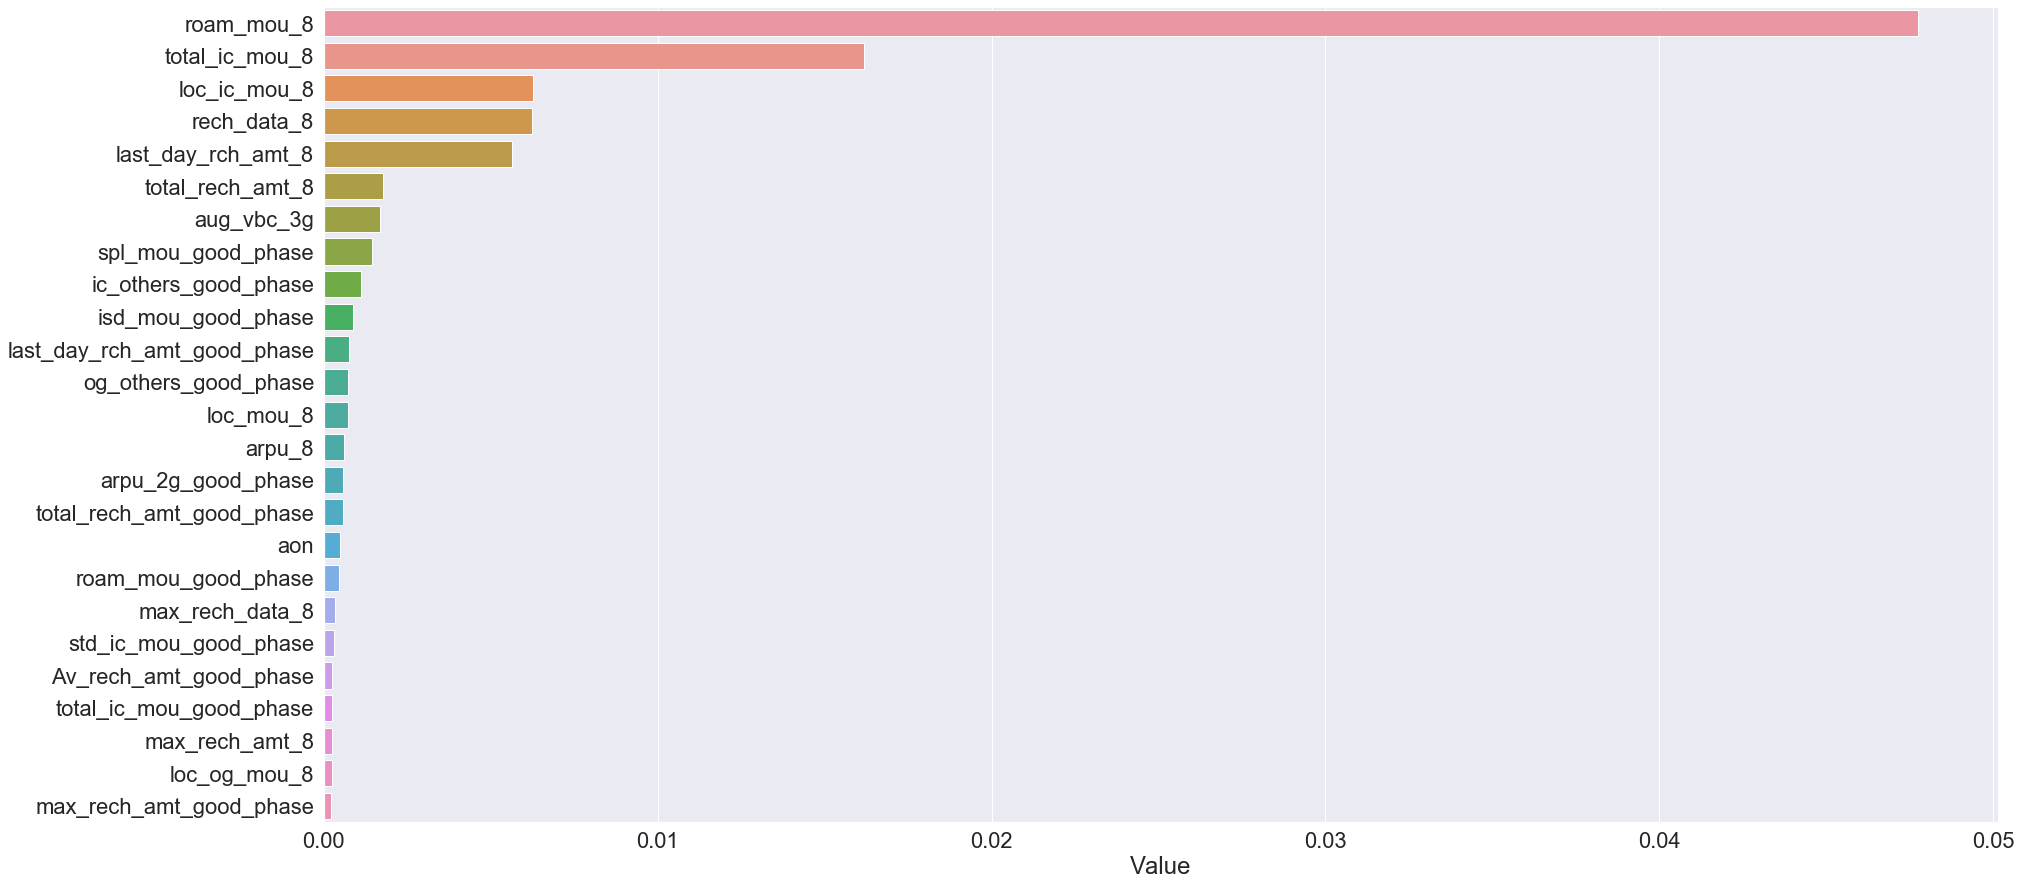

In [291]:
fig=plt.figure(figsize=(30,15))
sns.set(font_scale = 2)
sns.barplot(imp_features.Value,imp_features.index)
plt.show()

* Minutes of usage for roaming calls in the month prior to target month
* Minutes of usage for all the incoming calls in the month prior to target month
* Recharge amount on the last day in the month prior to target month
* Minutes of usage of local incoming calls in the month prior to target month
* Roaming minutes of usage during good phase 
* Whether a data user in the last month <br>
are important predictors for determing whether a customer churns or not
<a id='FILR'></a>

### Assessing the top features with GLM StatsModels

Using these top 25 variables, we'll build the logistic model again to check the p-values and VIF again, and start reducing the features manually

In [292]:
col=list(imp_features.index)
col

['roam_mou_8',
 'total_ic_mou_8',
 'loc_ic_mou_8',
 'rech_data_8',
 'last_day_rch_amt_8',
 'total_rech_amt_8',
 'aug_vbc_3g',
 'spl_mou_good_phase',
 'ic_others_good_phase',
 'isd_mou_good_phase',
 'last_day_rch_amt_good_phase',
 'og_others_good_phase',
 'loc_mou_8',
 'arpu_8',
 'arpu_2g_good_phase',
 'total_rech_amt_good_phase',
 'aon',
 'roam_mou_good_phase',
 'max_rech_data_8',
 'std_ic_mou_good_phase',
 'Av_rech_amt_good_phase',
 'total_ic_mou_good_phase',
 'max_rech_amt_8',
 'loc_og_mou_8',
 'max_rech_amt_good_phase']

In [293]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial(),random_state=42)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                36830
Model:                            GLM   Df Residuals:                    36804
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14081.
Date:                Mon, 02 Nov 2020   Deviance:                       28163.
Time:                        17:46:08   Pearson chi2:                 1.20e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3860      0.018    -21.240      0.000      -0.422      -0.350
roam_mou_8                      0.1301      0.020      6.615      0.000       0.092       0.169
total_ic_mou_8                 -1.4600      0.099    -14.802      0.000      -1.653      -1.267
loc_ic_mou_8                    1.3705      0.776      1.766      0.077      -0.151       2.891
rech_data_8                    -1.0443      0.025    -41.988      0.000      -1.093      -0.996
last_day_rch_amt_8             -0.3410      0.023    -15.107      0.000      -0.385      -0.297
total_rech_amt_8               -0.6226      0.047    -13.281      0.000      -0.714      -0.531
aug_vbc_3g                     -0.2640      0.025    -10.770      0.000      -0.312      -0.216
spl_mou_good_phase             -0.0350      0.017     -2.108      0.035      -0.067      -0.002
ic_others_good_phase            0.0248      0.018      1.341      0.180      -0.011       0.061
isd_mou_good_phase              0.1053      0.021      4.932      0.000       0.063       0.147
last_day_rch_amt_good_phase    -0.0826      0.022     -3.697      0.000      -0.126      -0.039
og_others_good_phase           -0.0641      0.016     -4.109      0.000      -0.095      -0.034
loc_mou_8                      -3.4955      1.497     -2.335      0.020      -6.429      -0.562
arpu_8                         -0.1946      0.033     -5.977      0.000      -0.258      -0.131
arpu_2g_good_phase              0.2554      0.024     10.449      0.000       0.207       0.303
total_rech_amt_good_phase       0.3132      0.023     13.471      0.000       0.268       0.359
aon                            -0.2736      0.017    -15.984      0.000      -0.307      -0.240
roam_mou_good_phase             0.1561      0.022      7.179      0.000       0.113       0.199
max_rech_data_8                 0.2045      0.029      7.084      0.000       0.148       0.261
std_ic_mou_good_phase          -0.1063      0.028     -3.855      0.000      -0.160      -0.052
Av_rech_amt_good_phase         -0.1407      0.028     -5.094      0.000      -0.195      -0.087
total_ic_mou_good_phase         0.7417      0.040     18.679      0.000       0.664       0.819
max_rech_amt_8                  0.1390      0.028      4.952      0.000       0.084       0.194
loc_og_mou_8                    1.6509      0.884      1.868      0.062      -0.081       3.383
max_rech_amt_good_phase         0.1891      0.026      7.321      0.000       0.138       0.240
===============================================================================================
"""

Almost all the variables have low p-values, i.e. all the variables are significant to the prediction of churn. However, about three variables have high p-values & there will be multi-collinearity involved. Thus let us check the VIF values to remove variables that have high multi-collinearity <br>

Let us however remove ic_others_good_phase and check for the accuracy and VIF of all the variables <br>

First we'll create a User Defined Function that takes in the variable to be dropped and to rebuild the model to perform the step-wise regression.

In [294]:
def step_wise_lr(var):
    col.remove(var)
      # training the model post removal of the variable
    X_train_sm = sm.add_constant(X_train[col])
    logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(),random_state=42)
    global res
    res = logm3.fit()
    print(res.summary())
    
    # Printing the Variance Infaltion factor for each of the variables
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

  # checking accuracy
    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    print("AUROC score: "+ str(round(metrics.roc_auc_score( y_train, y_train_pred )*100,2))+"%")


In [295]:
step_wise_lr('ic_others_good_phase')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                36830
Model:                            GLM   Df Residuals:                    36805
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14082.
Date:                Mon, 02 Nov 2020   Deviance:                       28165.
Time:                        17:47:42   Pearson chi2:                 1.19e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

_loc_ic_mou_8_ has a high p-value post removal of the recharge data variables. All the variables have quite high VIF hence heavy collinearity is being observed for these variables. Let us remove the variable with high p-value & observe the results

In [296]:
step_wise_lr('loc_ic_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                36830
Model:                            GLM   Df Residuals:                    36806
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14084.
Date:                Mon, 02 Nov 2020   Deviance:                       28168.
Time:                        17:48:08   Pearson chi2:                 1.17e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The accuracy hasn't decreased and there is one variable with still high p-values. Let us keep removing them step-wise and watch how the accuracy, VIF and p-values change <br>

Let us remove Minutes of usage for local outgoing calls since it has both high p-value and the highest VIF

In [297]:
step_wise_lr('loc_og_mou_8')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                36830
Model:                            GLM   Df Residuals:                    36807
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14084.
Date:                Mon, 02 Nov 2020   Deviance:                       28169.
Time:                        17:49:01   Pearson chi2:                 1.29e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The variables now have low p-values which means they're all significant to the prediction of churn. Also, all of the variables have low VIF that is they aren't heavily multi-colinear.

The current model contains variables that are all quite significant in the prediction of churn and are not highly correlated to one another thus being interpretable and satisfying the assumption of linear models. <br>

Let us now take a look at the coefficients significant predictors and how are they affecting the _log odds of churn_ 

In [298]:
coef = pd.DataFrame(res.params.sort_values(ascending=False),columns=['Coefficient']).reset_index()

In [299]:
coef = coef[~(coef['index']=='const')]

Summary of the important predictors:

In [300]:
coef

index  Coefficient
0       total_ic_mou_good_phase     0.741421
1     total_rech_amt_good_phase     0.314959
2            arpu_2g_good_phase     0.255598
3               max_rech_data_8     0.205026
4       max_rech_amt_good_phase     0.189214
5           roam_mou_good_phase     0.155115
6                max_rech_amt_8     0.139304
7                    roam_mou_8     0.130662
8            isd_mou_good_phase     0.114623
9            spl_mou_good_phase    -0.040423
10         og_others_good_phase    -0.063668
11  last_day_rch_amt_good_phase    -0.081950
12        std_ic_mou_good_phase    -0.098708
13       Av_rech_amt_good_phase    -0.141318
14                       arpu_8    -0.195741
15                   aug_vbc_3g    -0.265826
16                          aon    -0.273513
17           last_day_rch_amt_8    -0.340573
19             total_rech_amt_8    -0.625187
20                    loc_mou_8    -0.717443
21                  rech_data_8    -1.045417
22               total_ic_mou_8    -1.504206

From the above we can observe that the average revenue from 2g usage per user affects the log odds of churn postively. In other words, a higher revenue due to 2g usage could be a potential flag for customer churn. <br>

Similarly, Minutes of Usage in roaming calls when found to be high would mean that the customer incurrs heavy charges and hence might switch to a different network for better offers on roaming calls. <br>

A few variables that negatively affect the customers' odds of churn are minutes of usage for total incoming calls in the month prior to predicting the customer churn. It suggests that when this variable is high, it affects the churn odd negatively and also the highest overall. Similarly, if the customer is a data user in the month prior to target month,it decreases the odds ratio of churn, because if the customer is recharging data in the month prior to churn prediction, it is highly likely that they won't churn <br>

Let us take a look at these results visually to analyse further

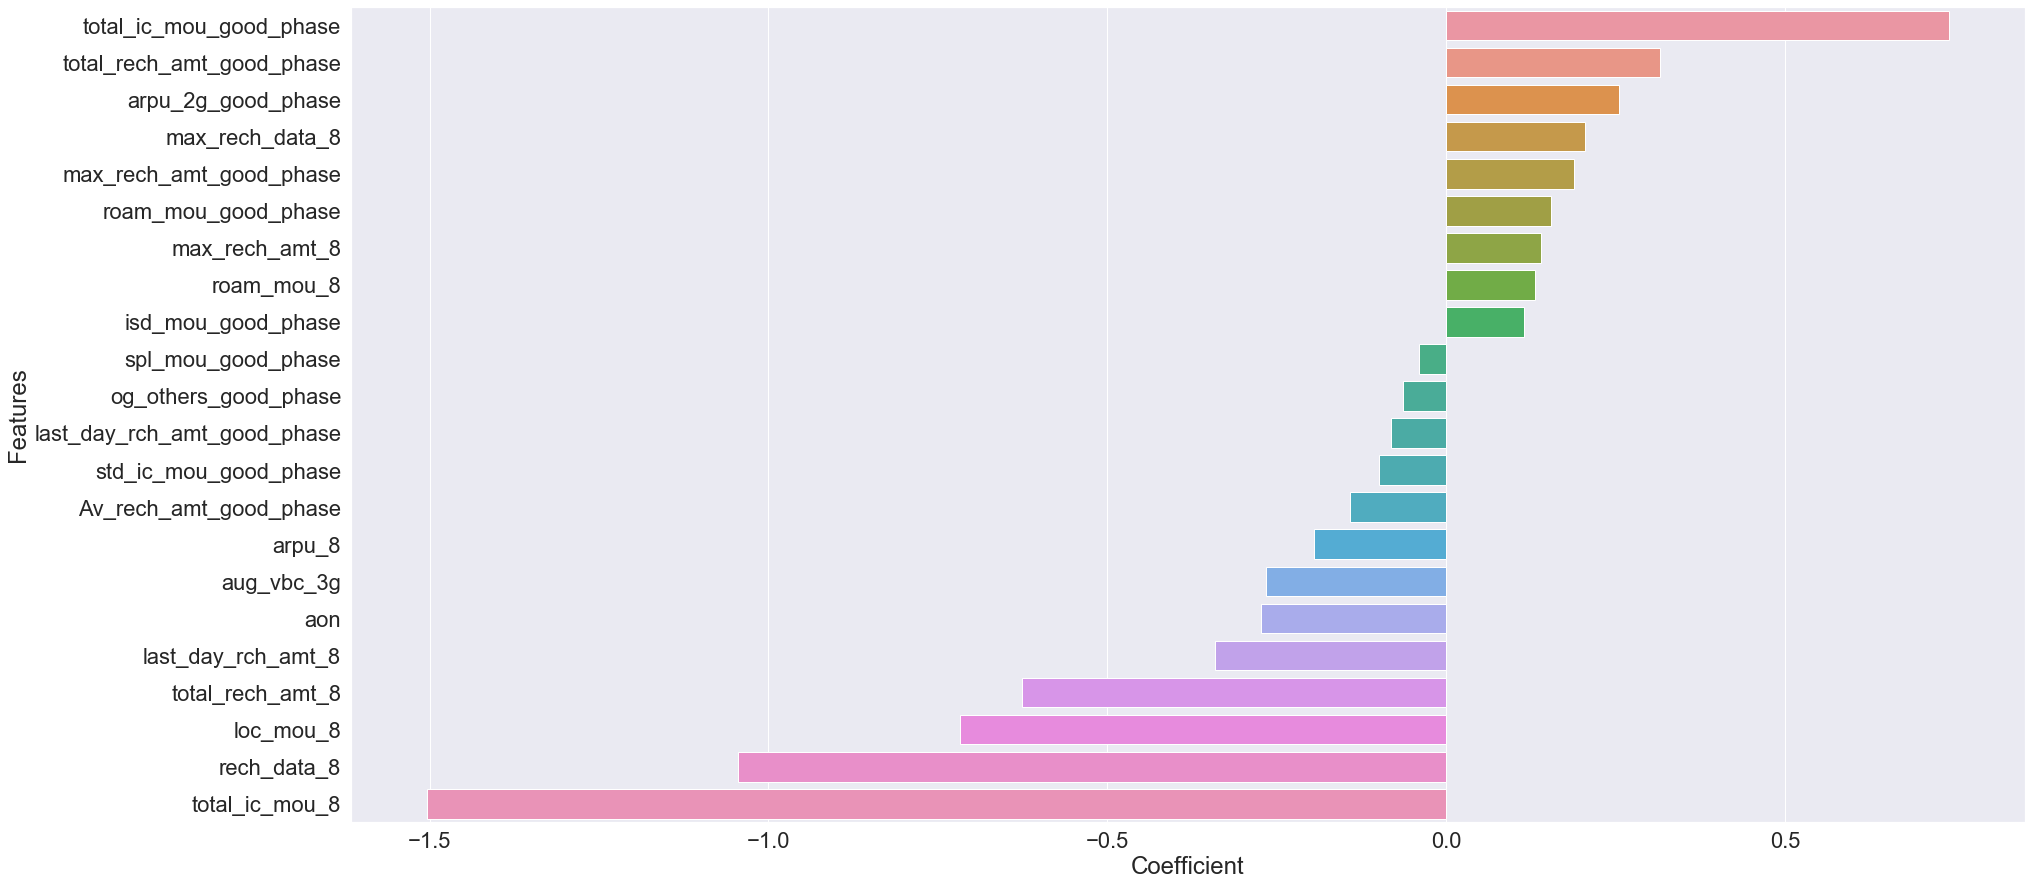

In [301]:
fig=plt.figure(figsize=(30,15))
sns.set(font_scale = 2)
#res.params.sort_values(ascending=False).plot.bar()
sns.barplot(coef['Coefficient'],coef['index'])
plt.ylabel('Features')
plt.xlabel('Coefficient')
plt.show()

<a id='final'></a>

### Final Insights and recommendations

Variables that were found to increase the log odds of churn are:
* Average Revenue for 2g data user
* Minutes of usage for roaming calls during good phase
* Total amount of recharges made during good phase
* Maximum recharge amount (if found to be high might churn)
* Maximum recharge amount for data during good phase

A check on these variables, and monitoring customers where these variables are high would reduce the churn probability. Perhaps, a customer who attends many roaming calls in a month is frustrated due to the higher tarriffs and is switching to a different network. Special offers could be rolled out for these customers who have high volume of roaming calls <br>

Variables that were found to decrease the log odds of churn are:
* Total Incoming Minutes of usage
* Data User in the month prior to target month
* Total amount of recharges made in the month prior to target month
* Recharge amount made last
* Local minutes of usage in the month prior to target month

A check on these variables, and monitoring customers where these variables are low would reduce the churn probability. When the incoming minutes of usage are low it might mean that there is less usage, also average revenue if less then the customer is almost on the verge of churning. Similarly, the recharge amount made on the last day of the month tells a lot about whether the customer is satisfied with the network. If not, he/she would probably recharge a low amount hence would churn soon. A special check can be performed for these customers and adequate decisions if taken can reduce the churn <br>
